In [26]:
library(igraph)
library(ggplot2)
library(gganimate)
library(tidyverse)
library(gifski)
library(reshape)
library(gridExtra)
library(grid)
library(RColorBrewer)
library(purrr)

source("functions.R")

# Deffaunt's bounded confidence model

Objectives:

- Simulate dynamic models of Sociophysics

- Analyze the influence of dynamical parameters and network topological traits on behavior of model

- Reproduce main results of the paper: what should be simulated?

- _Extra_: apply on real-world networks

## 1. Complete Mixing: analysis and results

### Model

Consider a population of $N$ agents $i$ with continuous opinions $x_i \in [0, 1]$.

At each time step, let two randomly chosen agents meet: they re-adjust their opinions if the difference in their opinions is below a certain threshold. 

Given agents $i$ and $j$, if $|x_i-x_j|<d$ they re-adjust their opionions according to:

$$
\begin{cases}
x_i = x_i + \mu (x_j - x_i) \\
x_j = x_j + \mu (x_i - x_j)
\end{cases}
$$

- $d$ is the threshold parameter.

- $\mu$ is the convergence parameter, and is taken to be between 0 and 0.5. 


### Time series and updating opinions

This first result shows that uniform convergence is not guaranteed, even for high values of $d$ and $\mu$. 

It is sufficient that the distribution of opionions (or the random pair sampling) is such that some extreme groups are never touched by re-adjustment, to create multiple convergent opinions.

In general, for different values of $\mu$, there is no qualitative change in the final results. 

However, as $d$ changes, the number of final "peaks", or final convergent opinions, varies inversely.

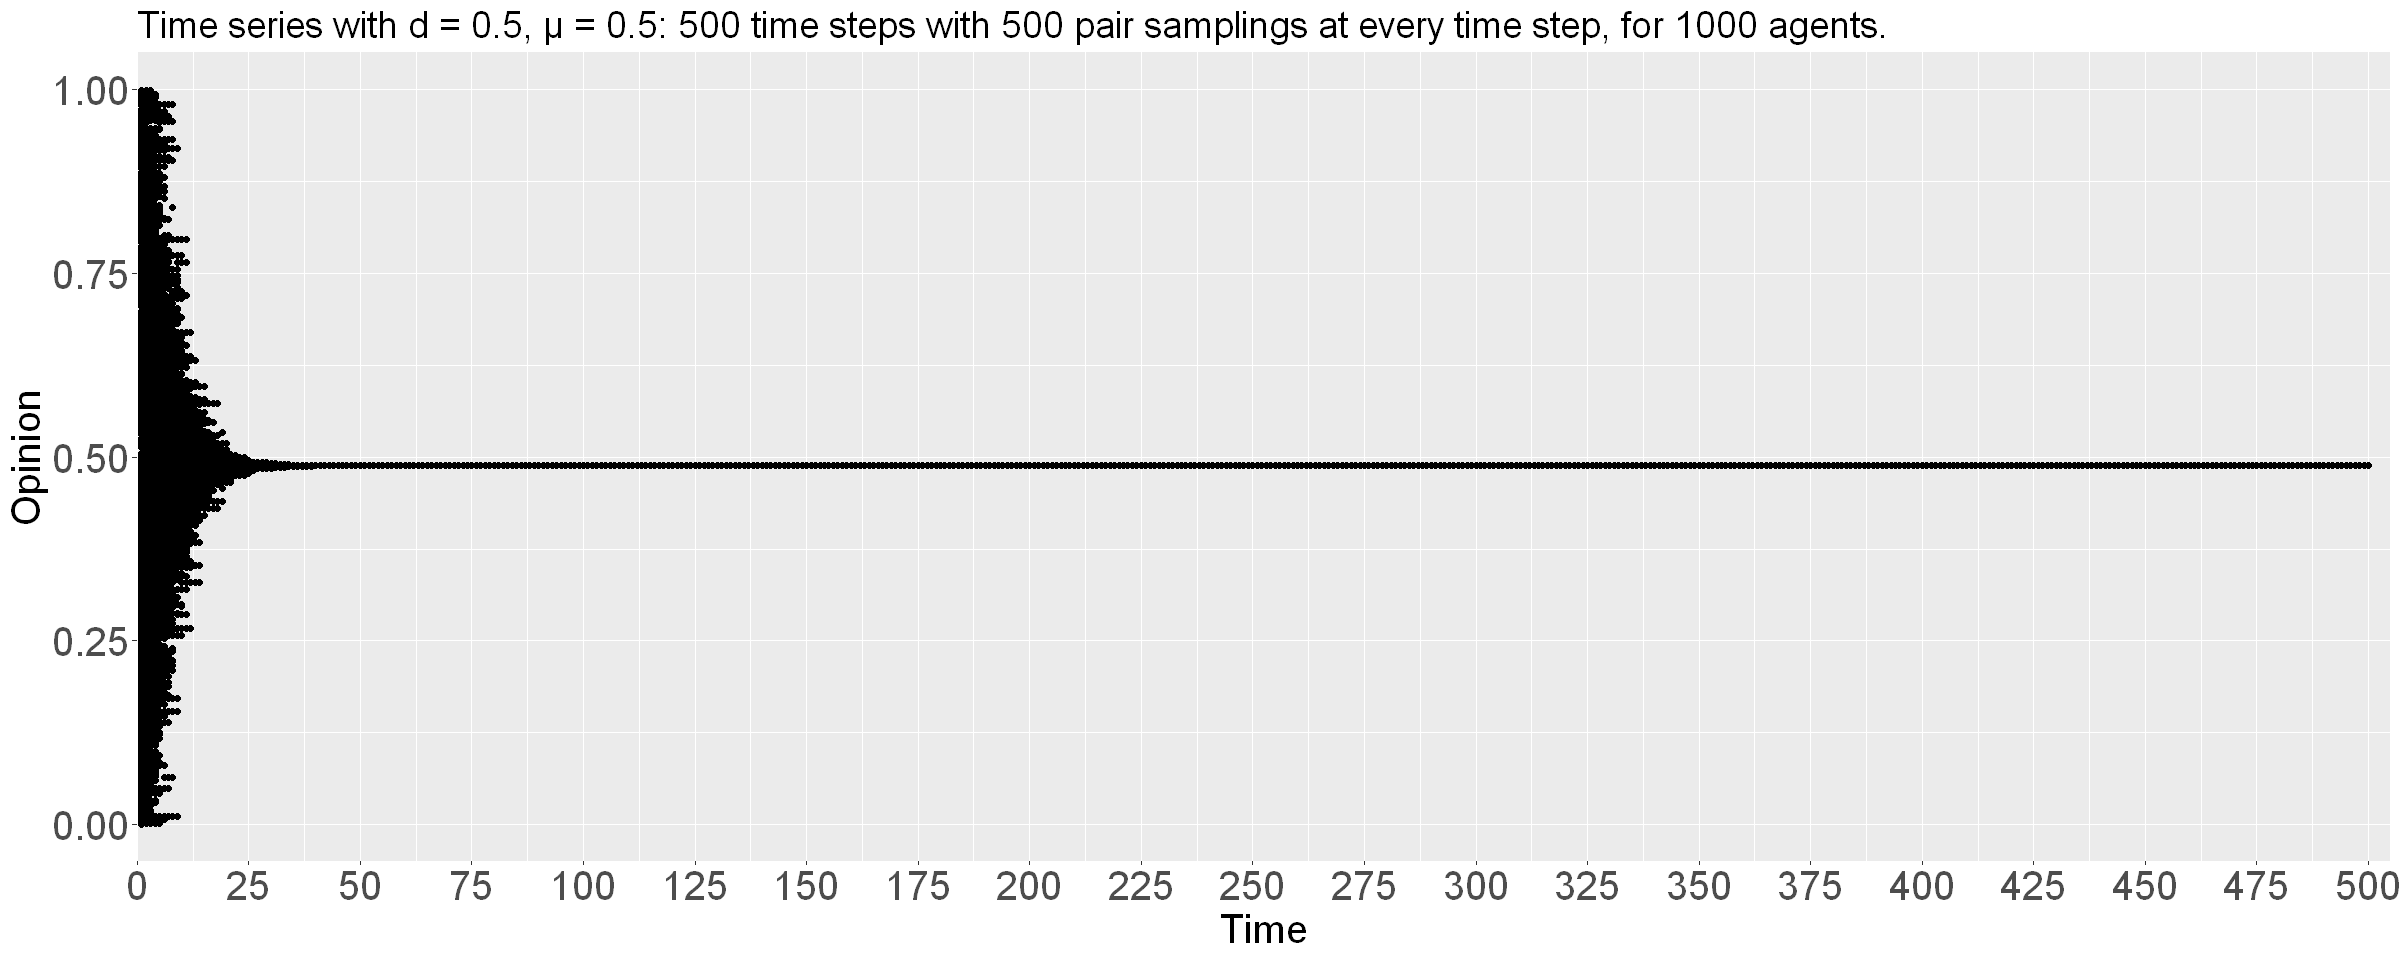

In [2]:
npair = 500 # pair samplings per time step 

N = 1000 # number of agents
T = 500 # number of times I repeat npair pair samplings
d = 0.5 # threshold parameter
mu = 0.5  # convergence parameter

options(repr.plot.width=20, repr.plot.height=8)
set.seed(42)

df_opinions = updating_opinions(N, T, npair, d, mu)
plot_time_series(df_opinions)

- try different values for $d$: larger values for $d$ should give uniformity with higher probability 

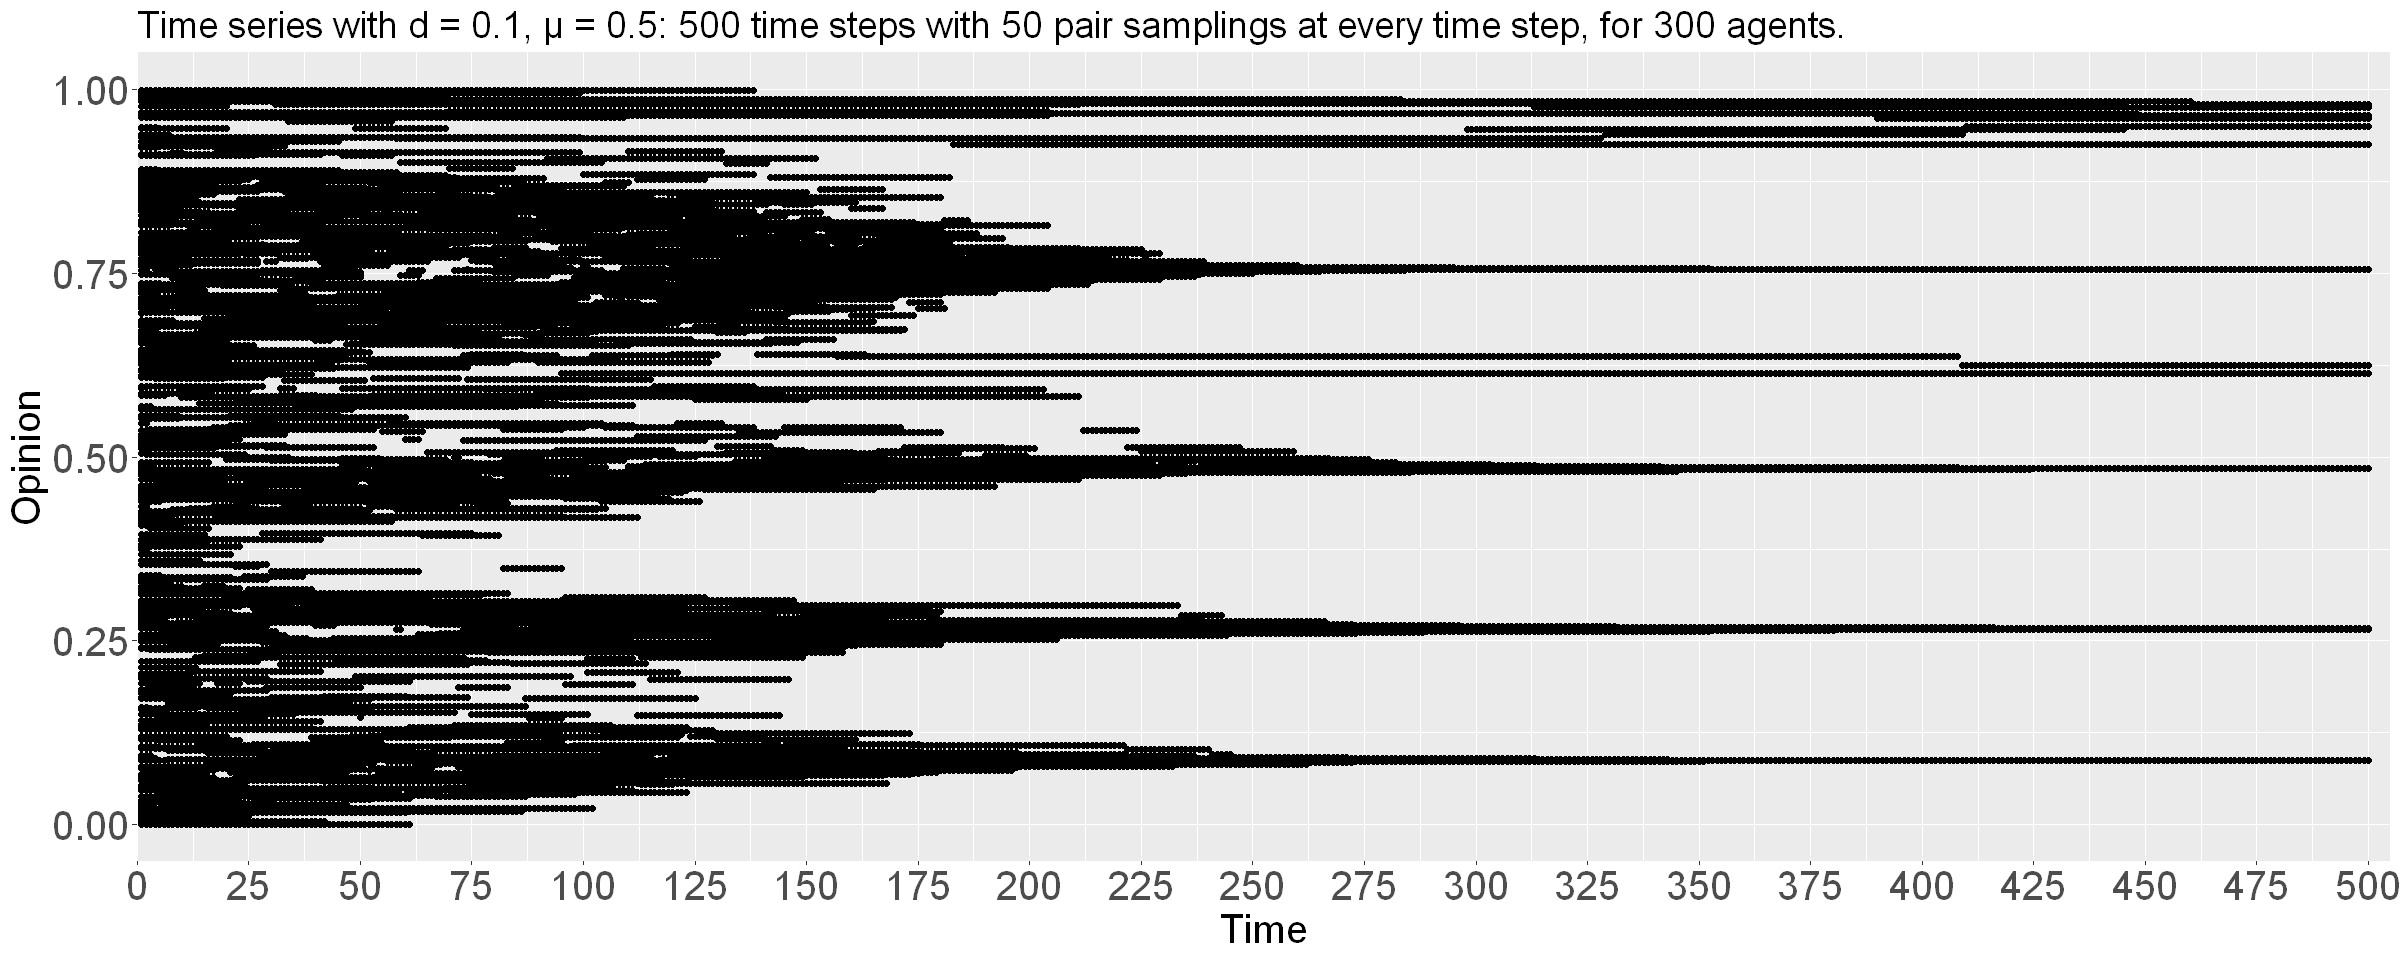

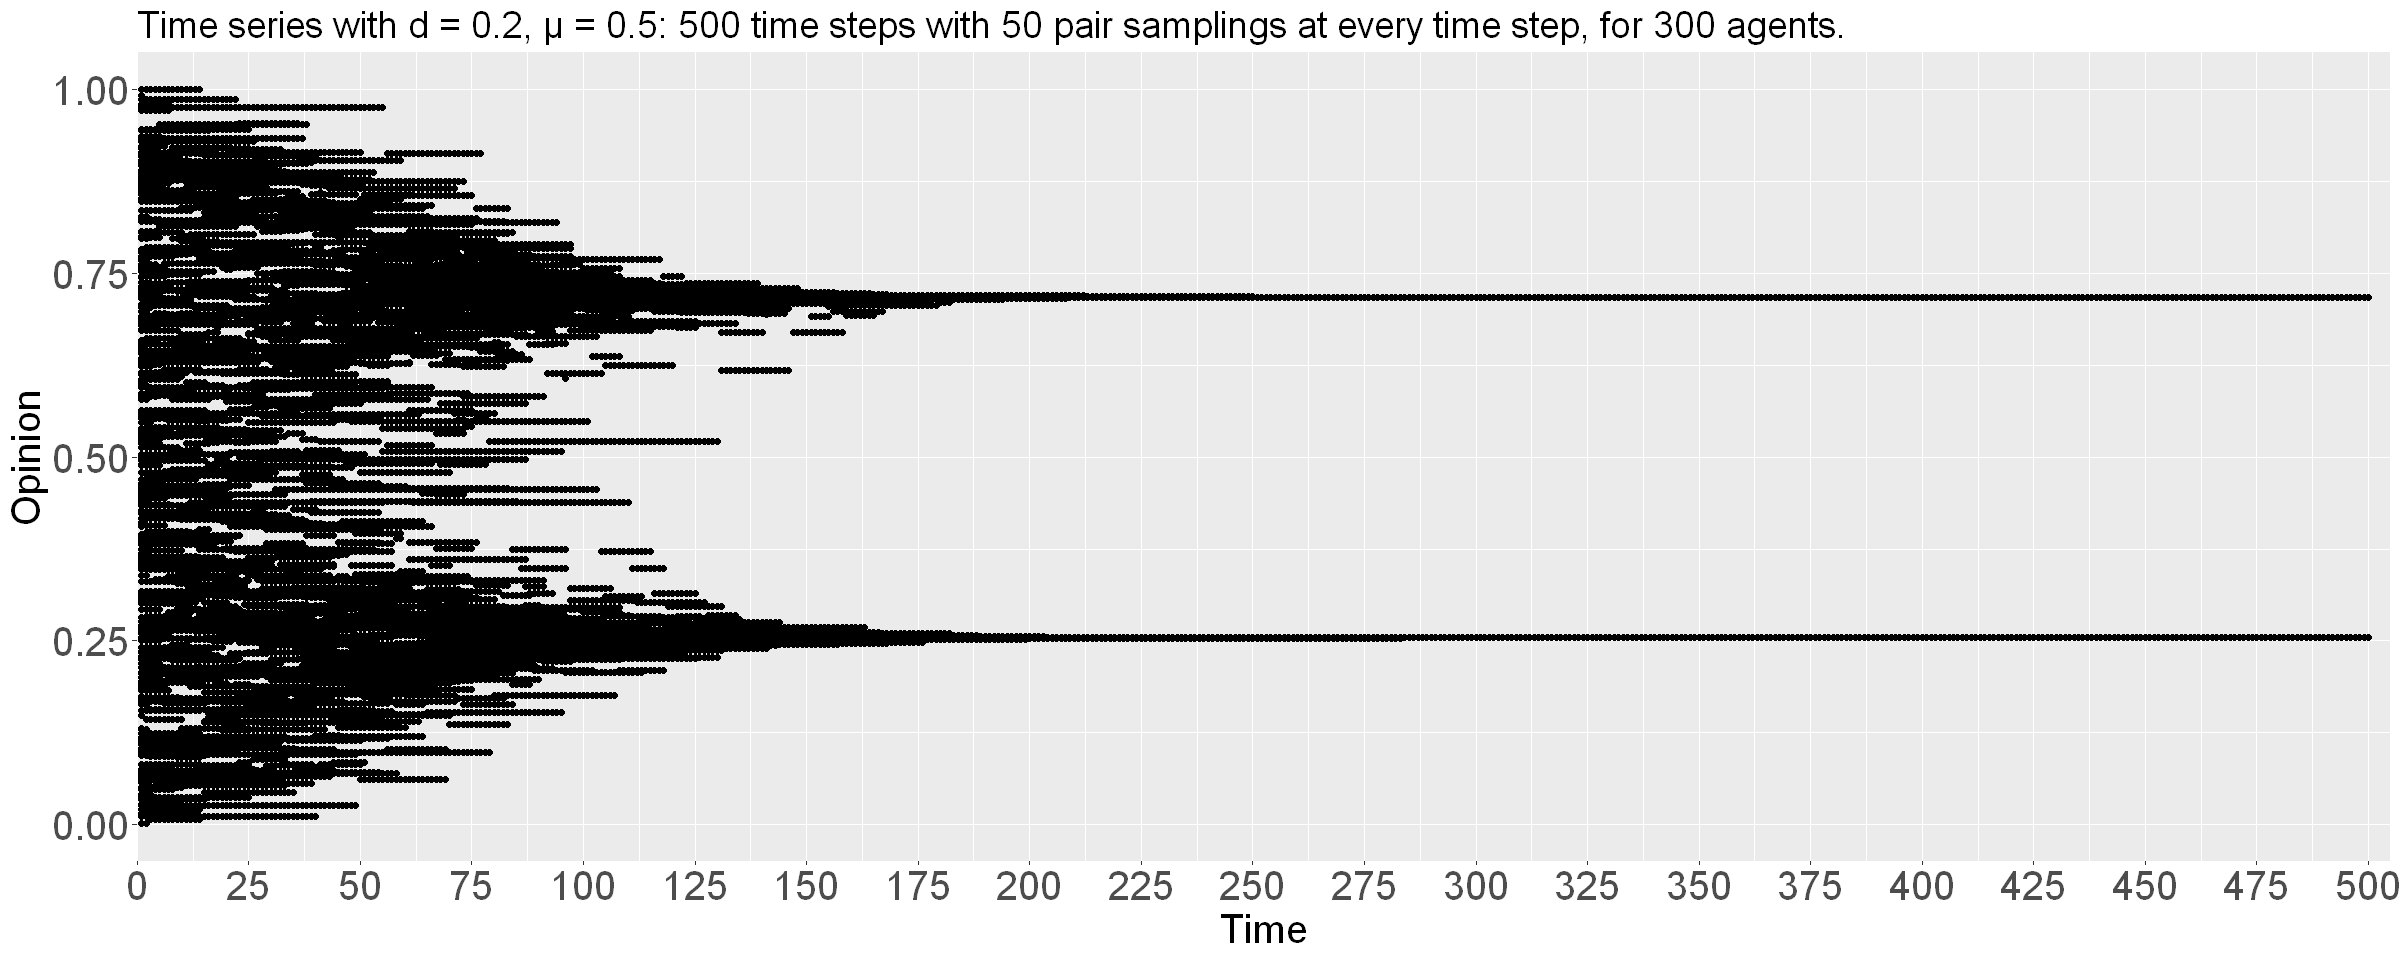

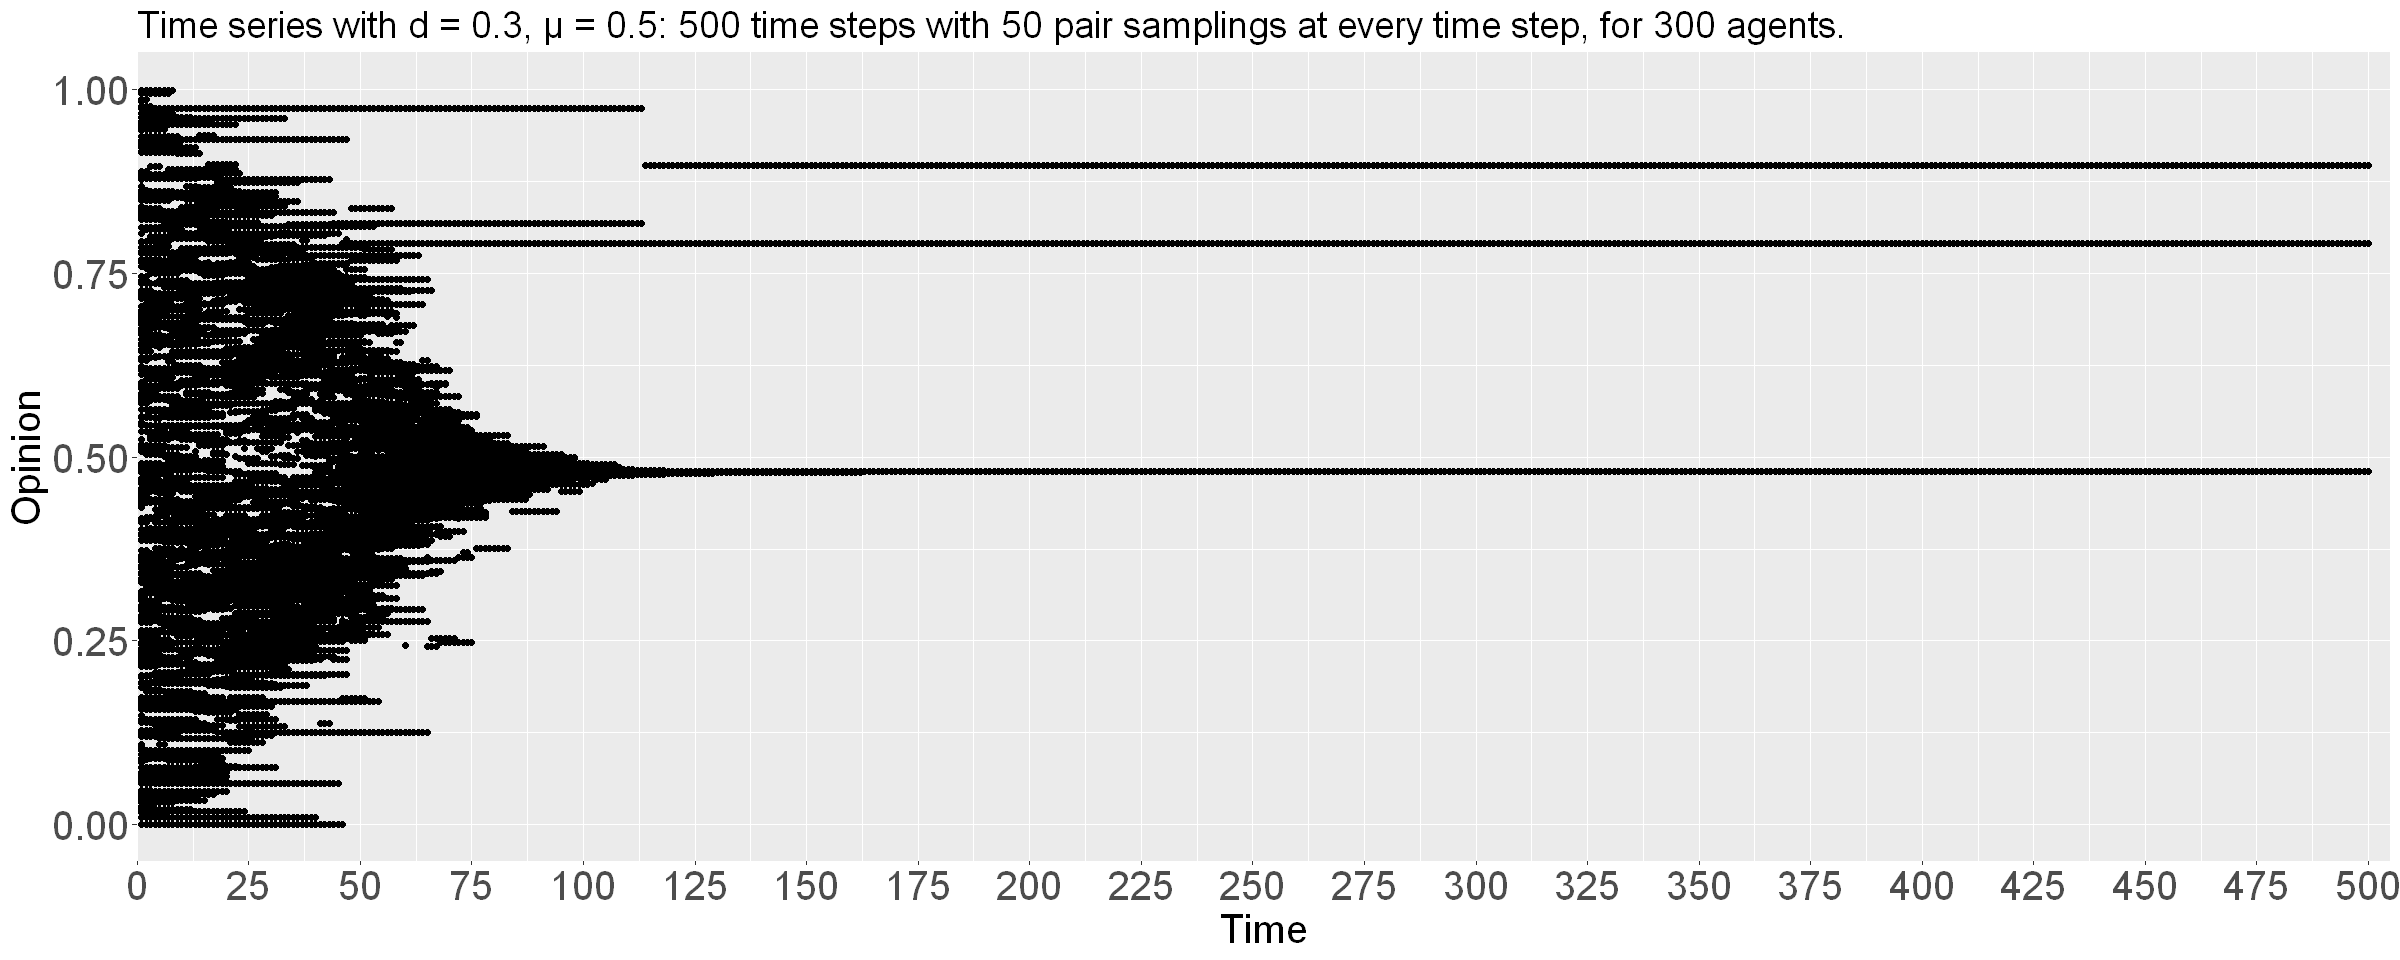

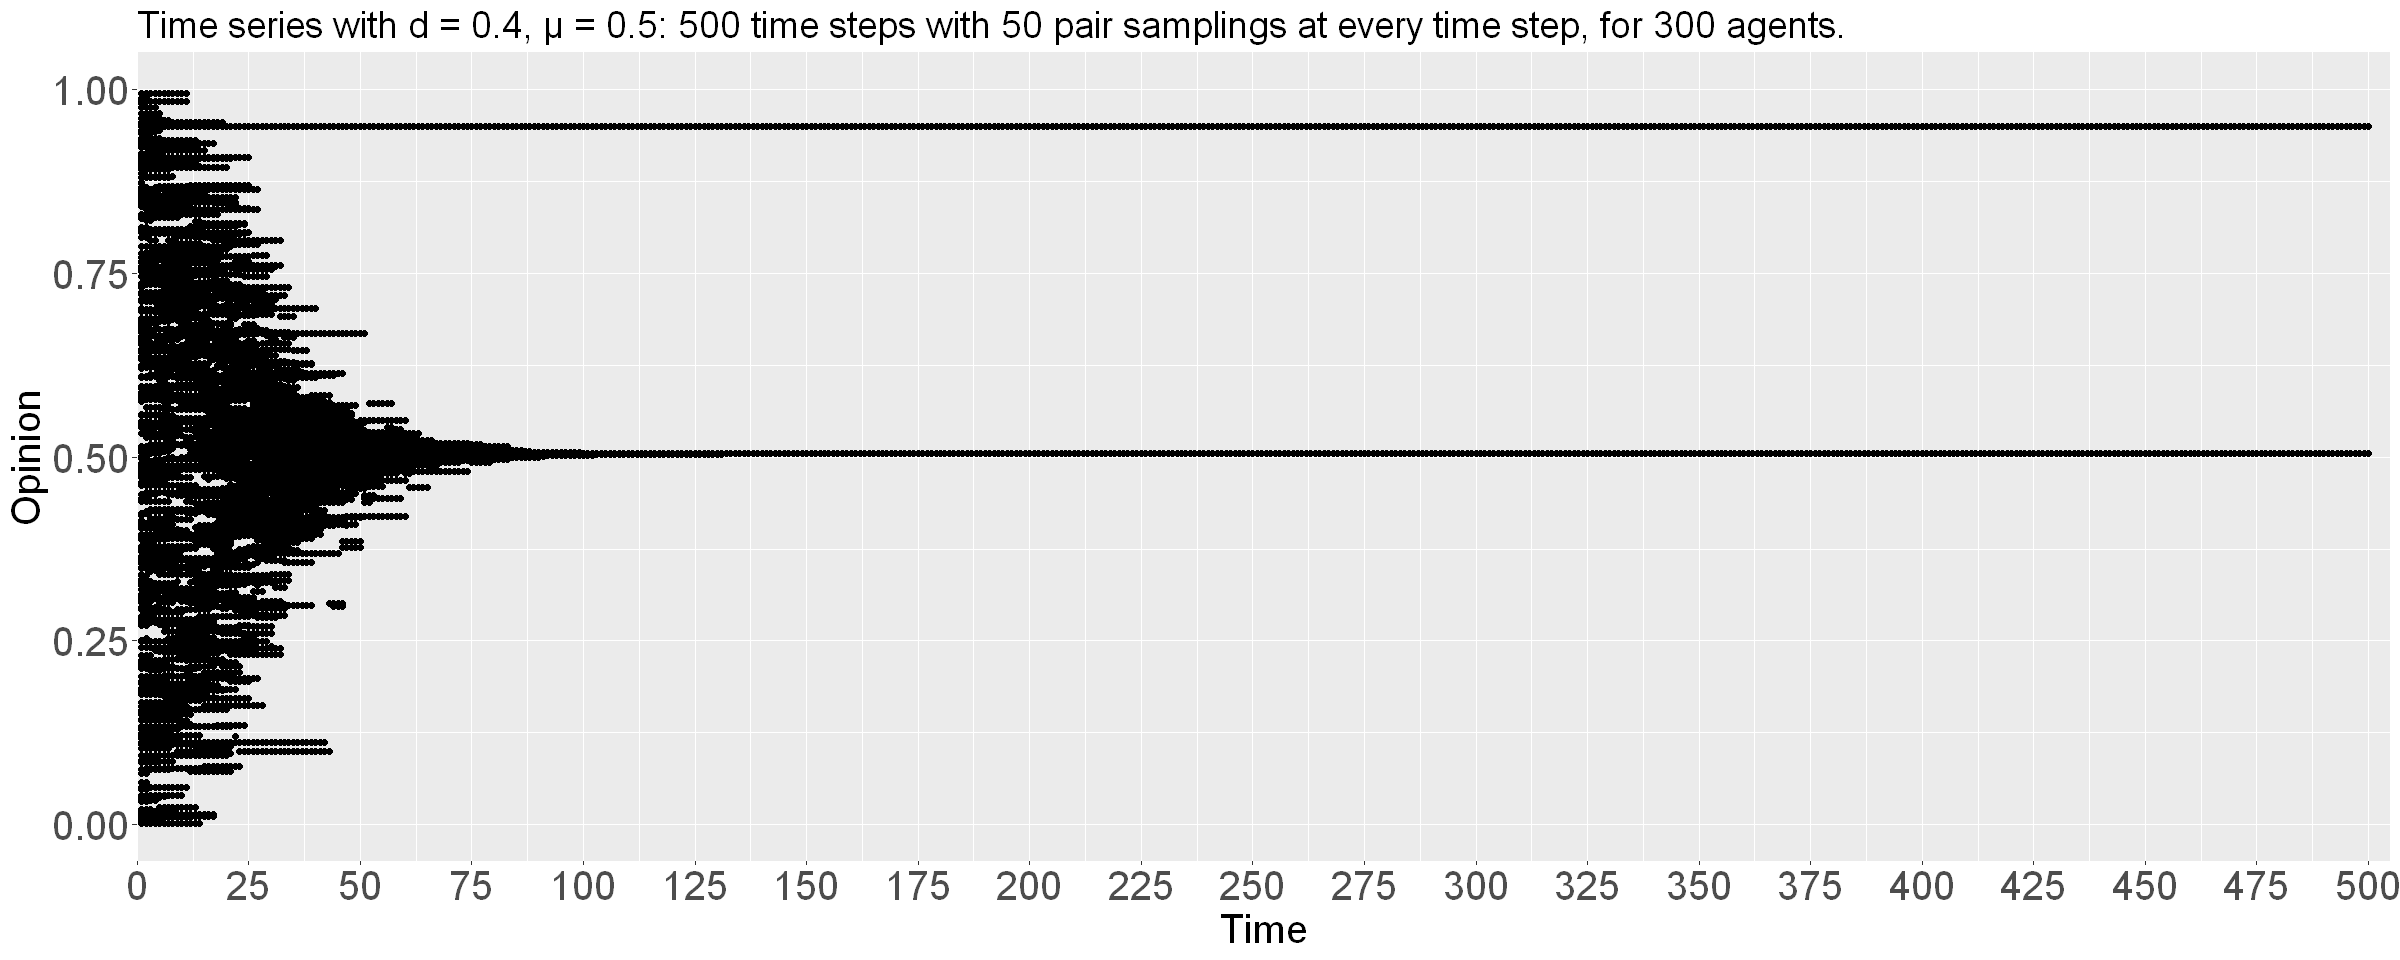

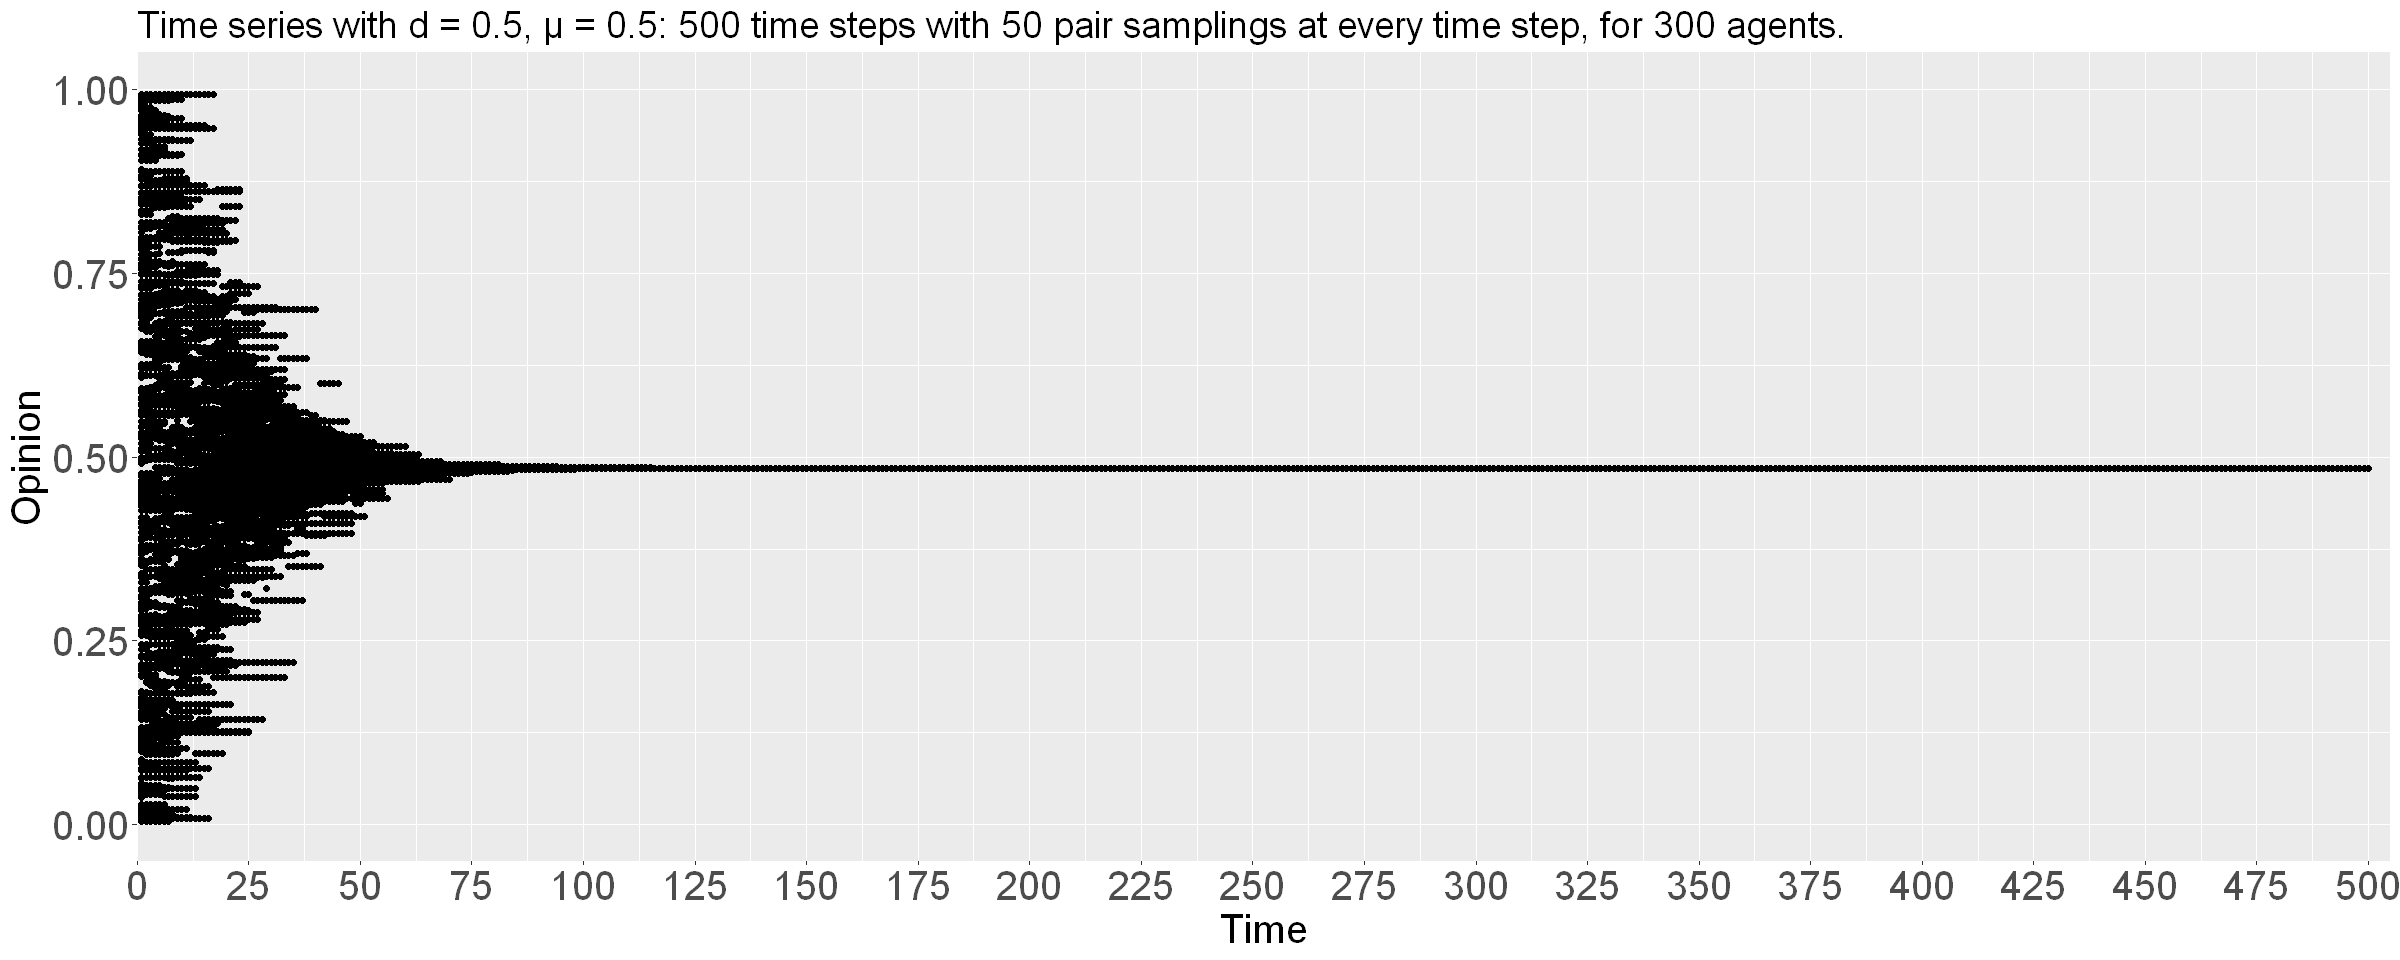

In [3]:
npair = 50

N = 300
T = 500
d_values = c(0.1, 0.2, 0.3, 0.4, 0.5)
mu = 0.5

for (d in d_values){
    df_opinions = updating_opinions(N, T, npair, d, mu)
    print(plot_time_series(df_opinions))
}

- try different values for $\mu$: qualitative results (number of final opinions, peaks) should be unchanged 

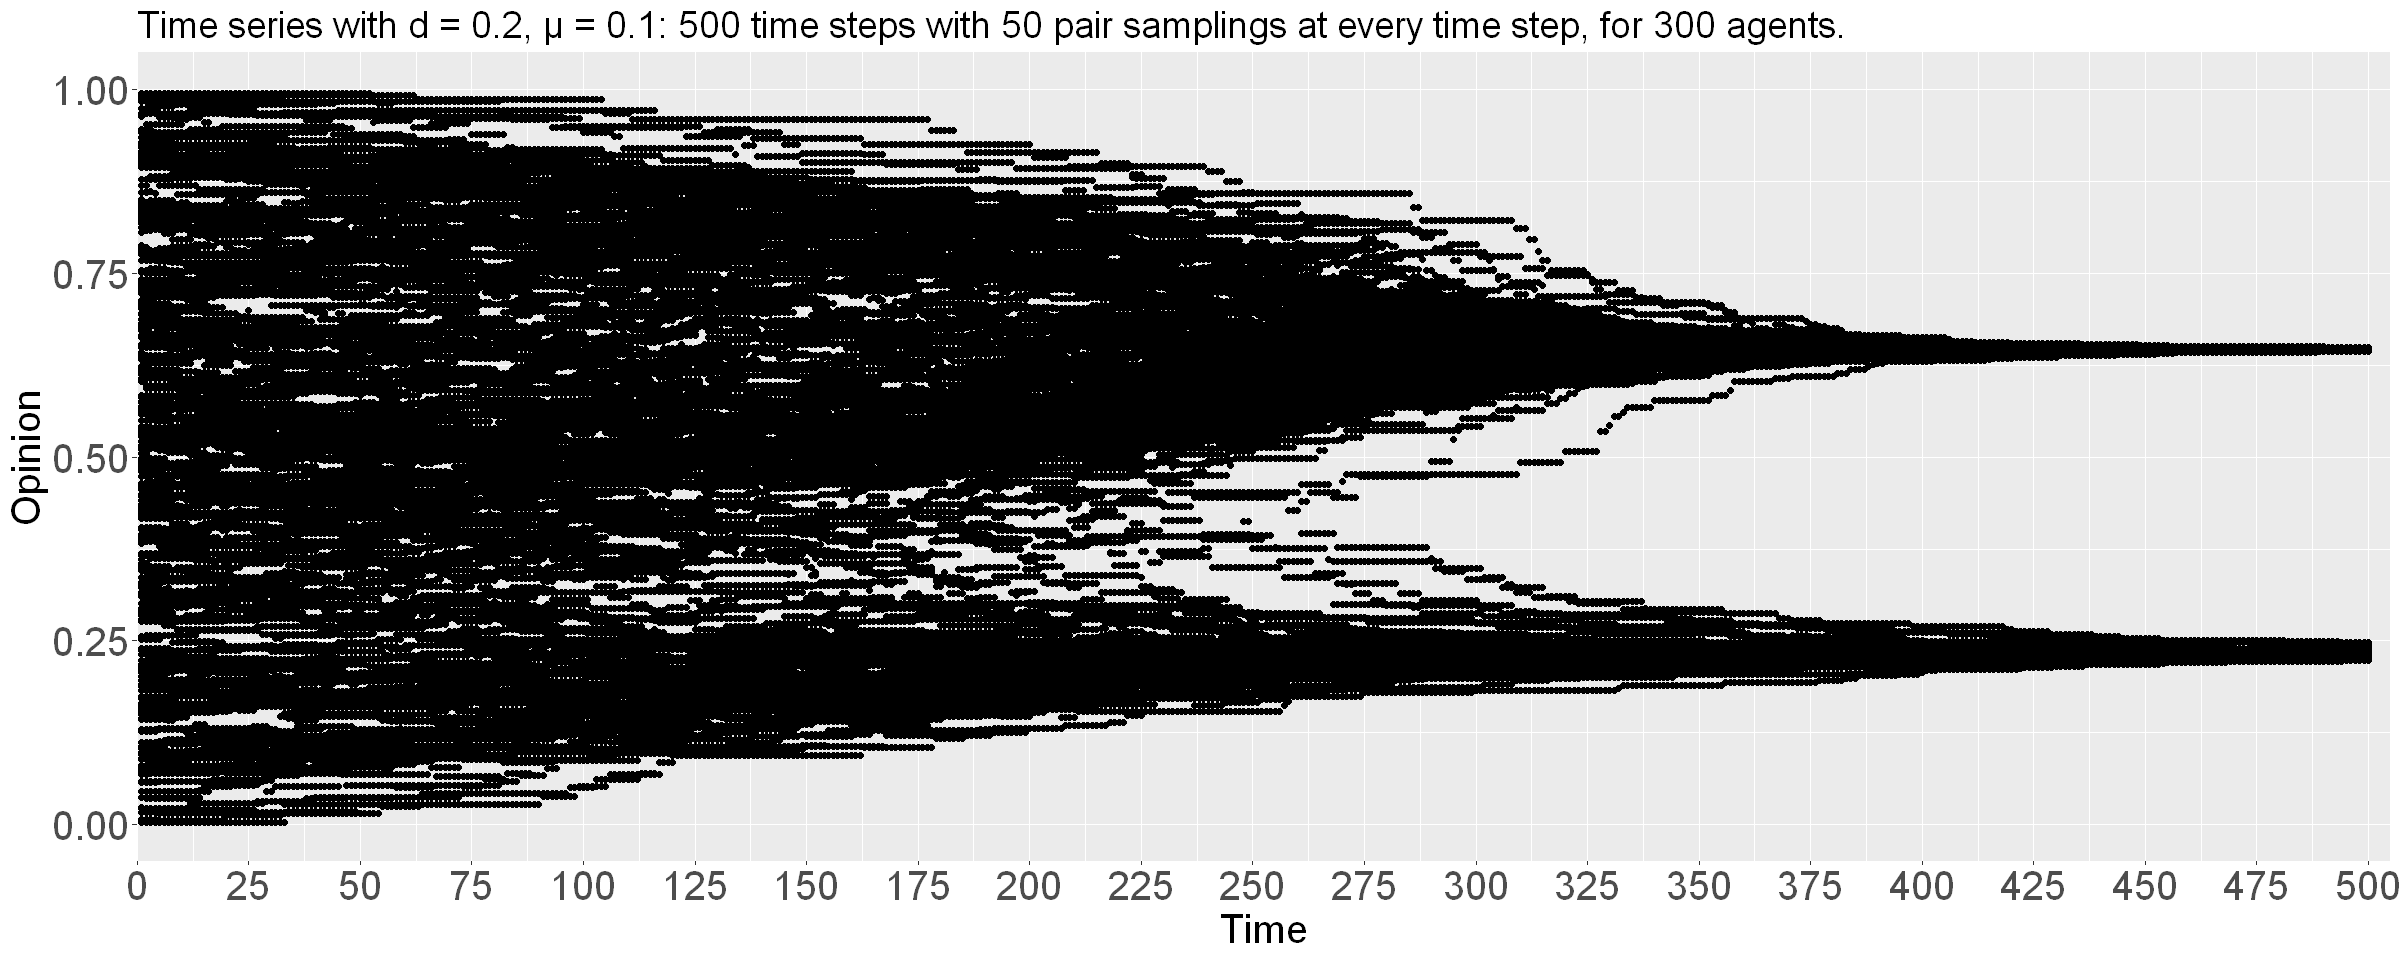

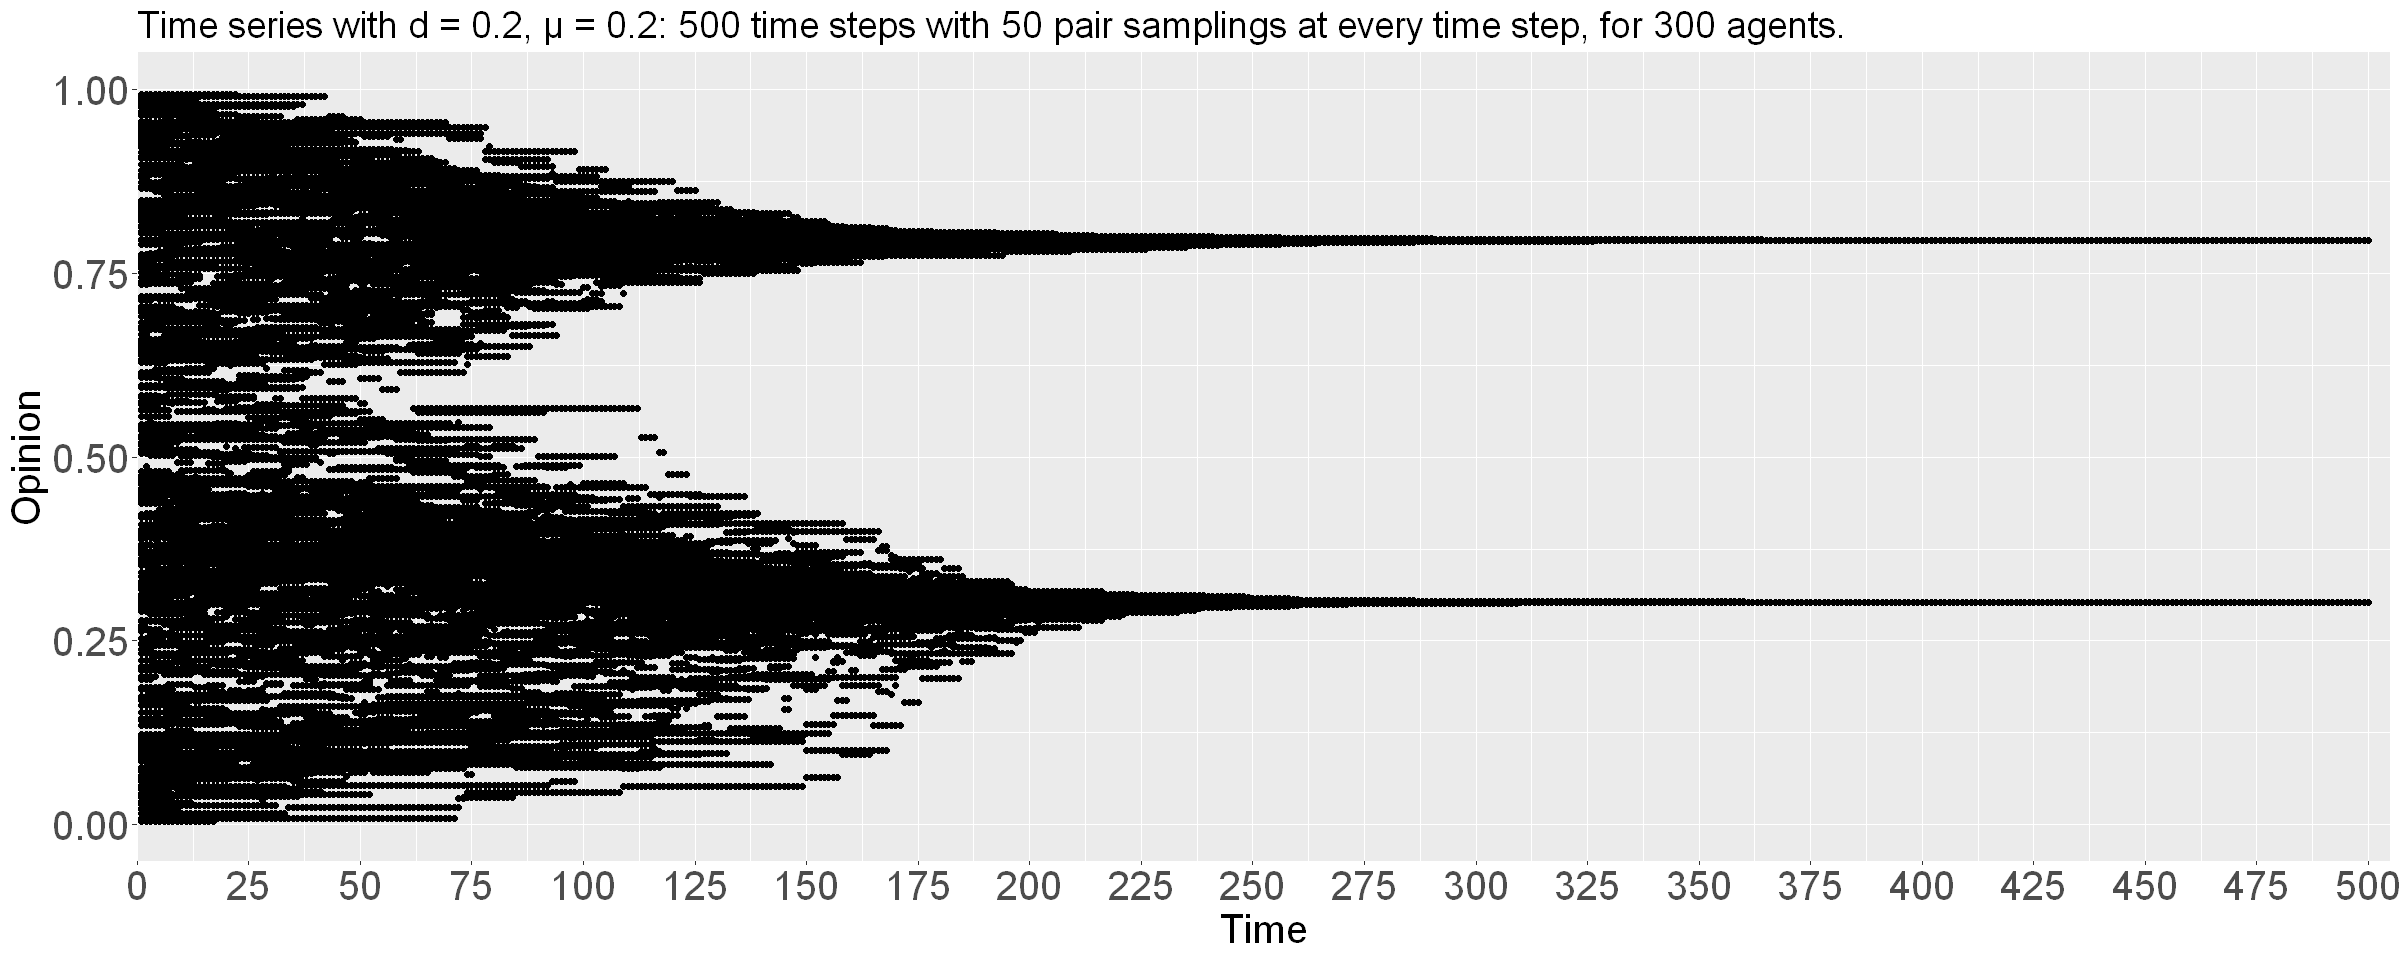

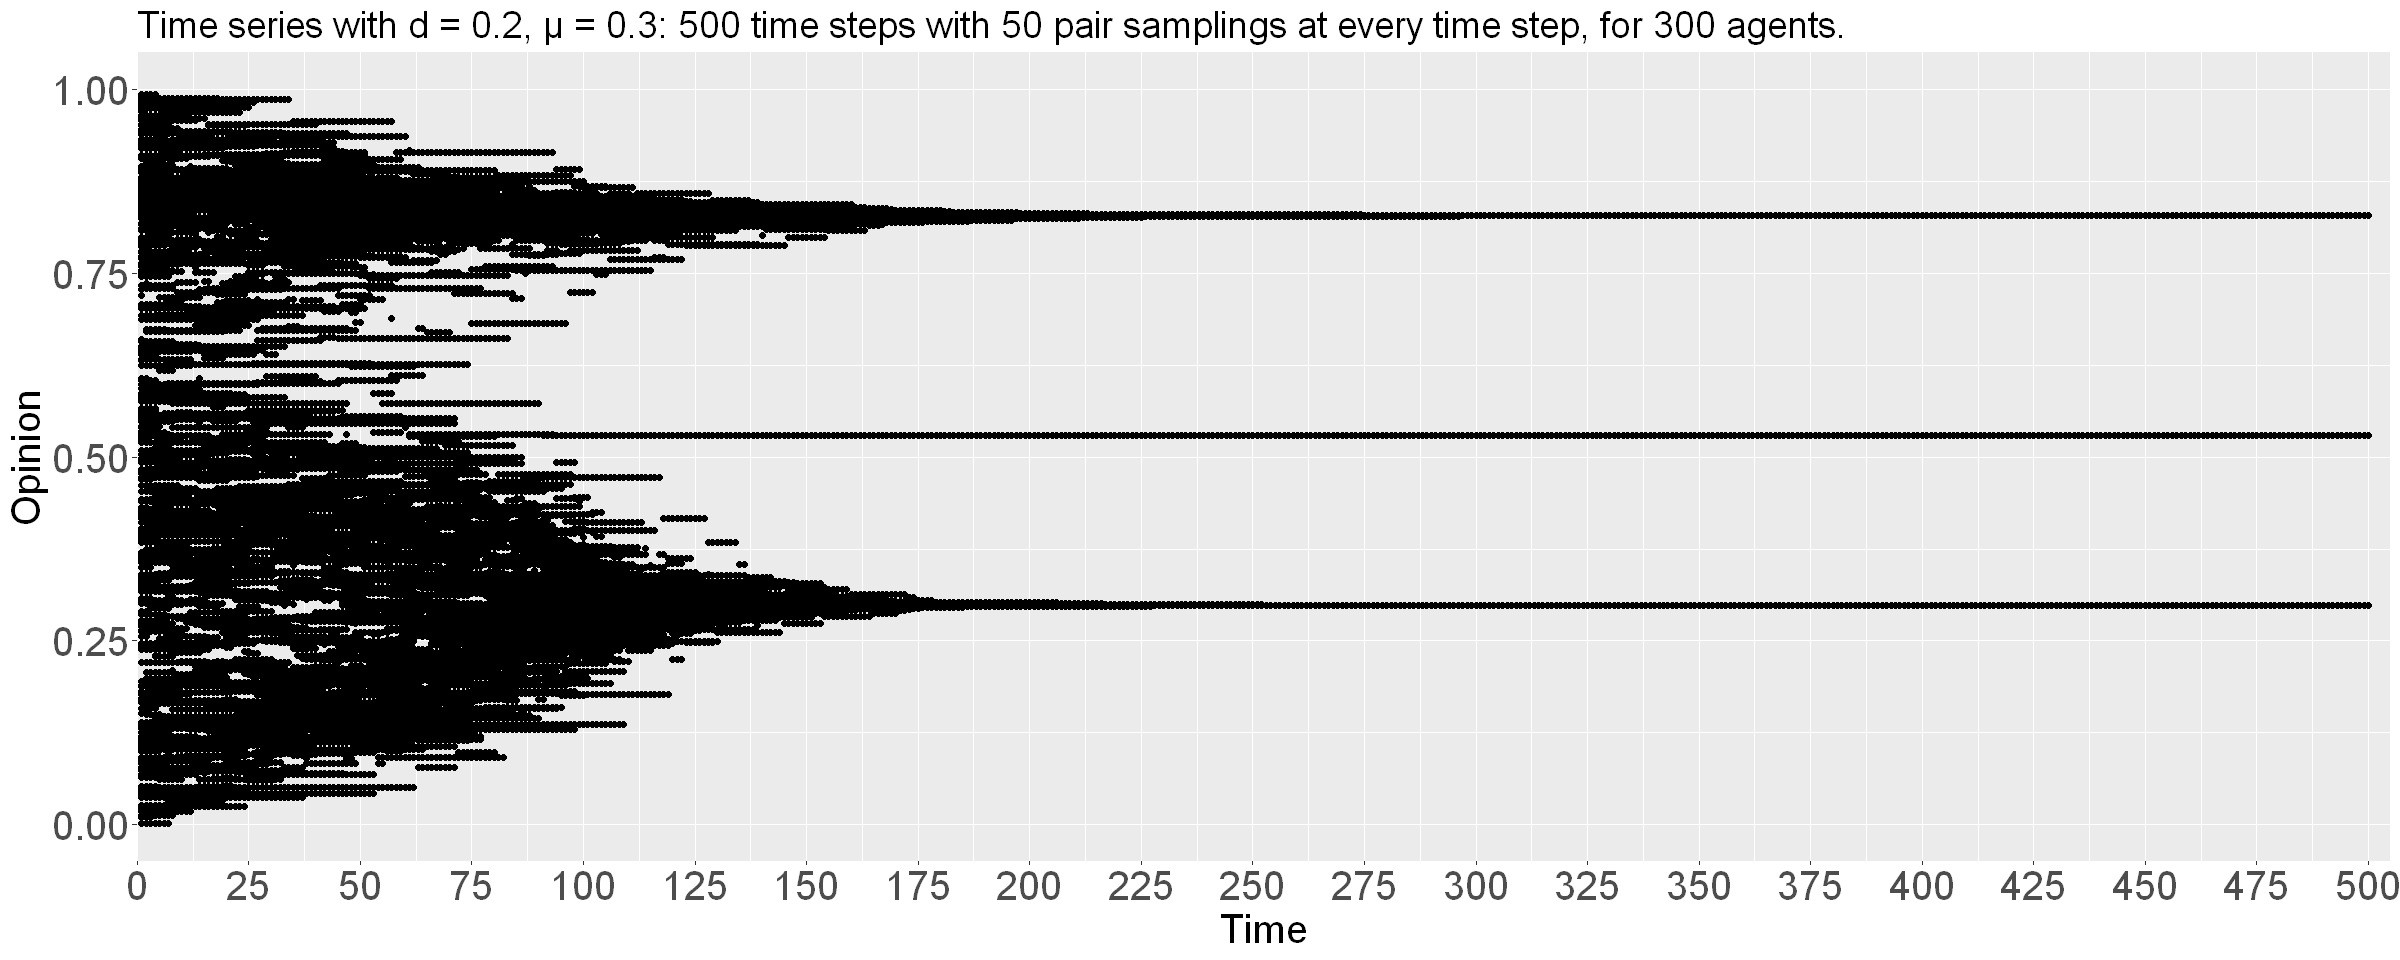

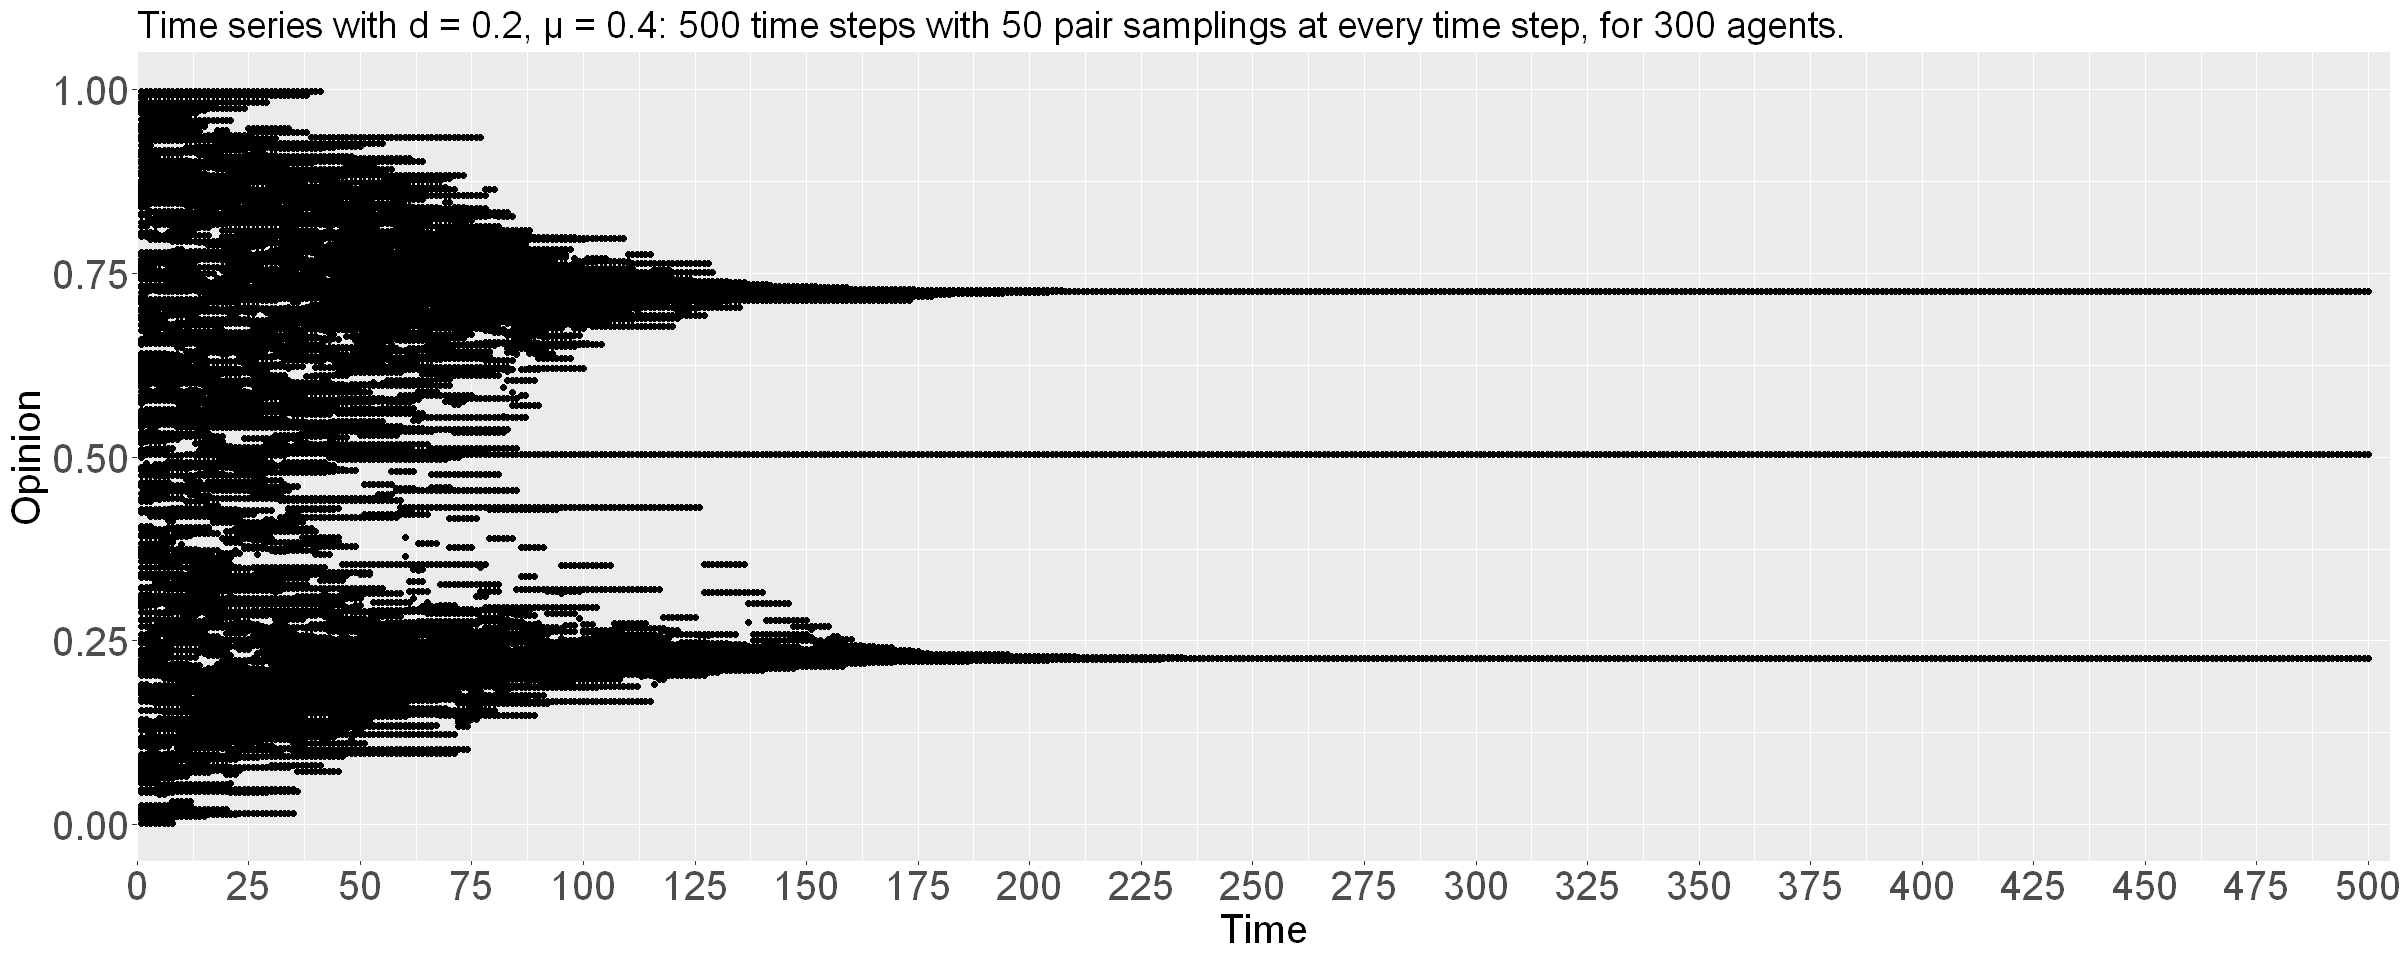

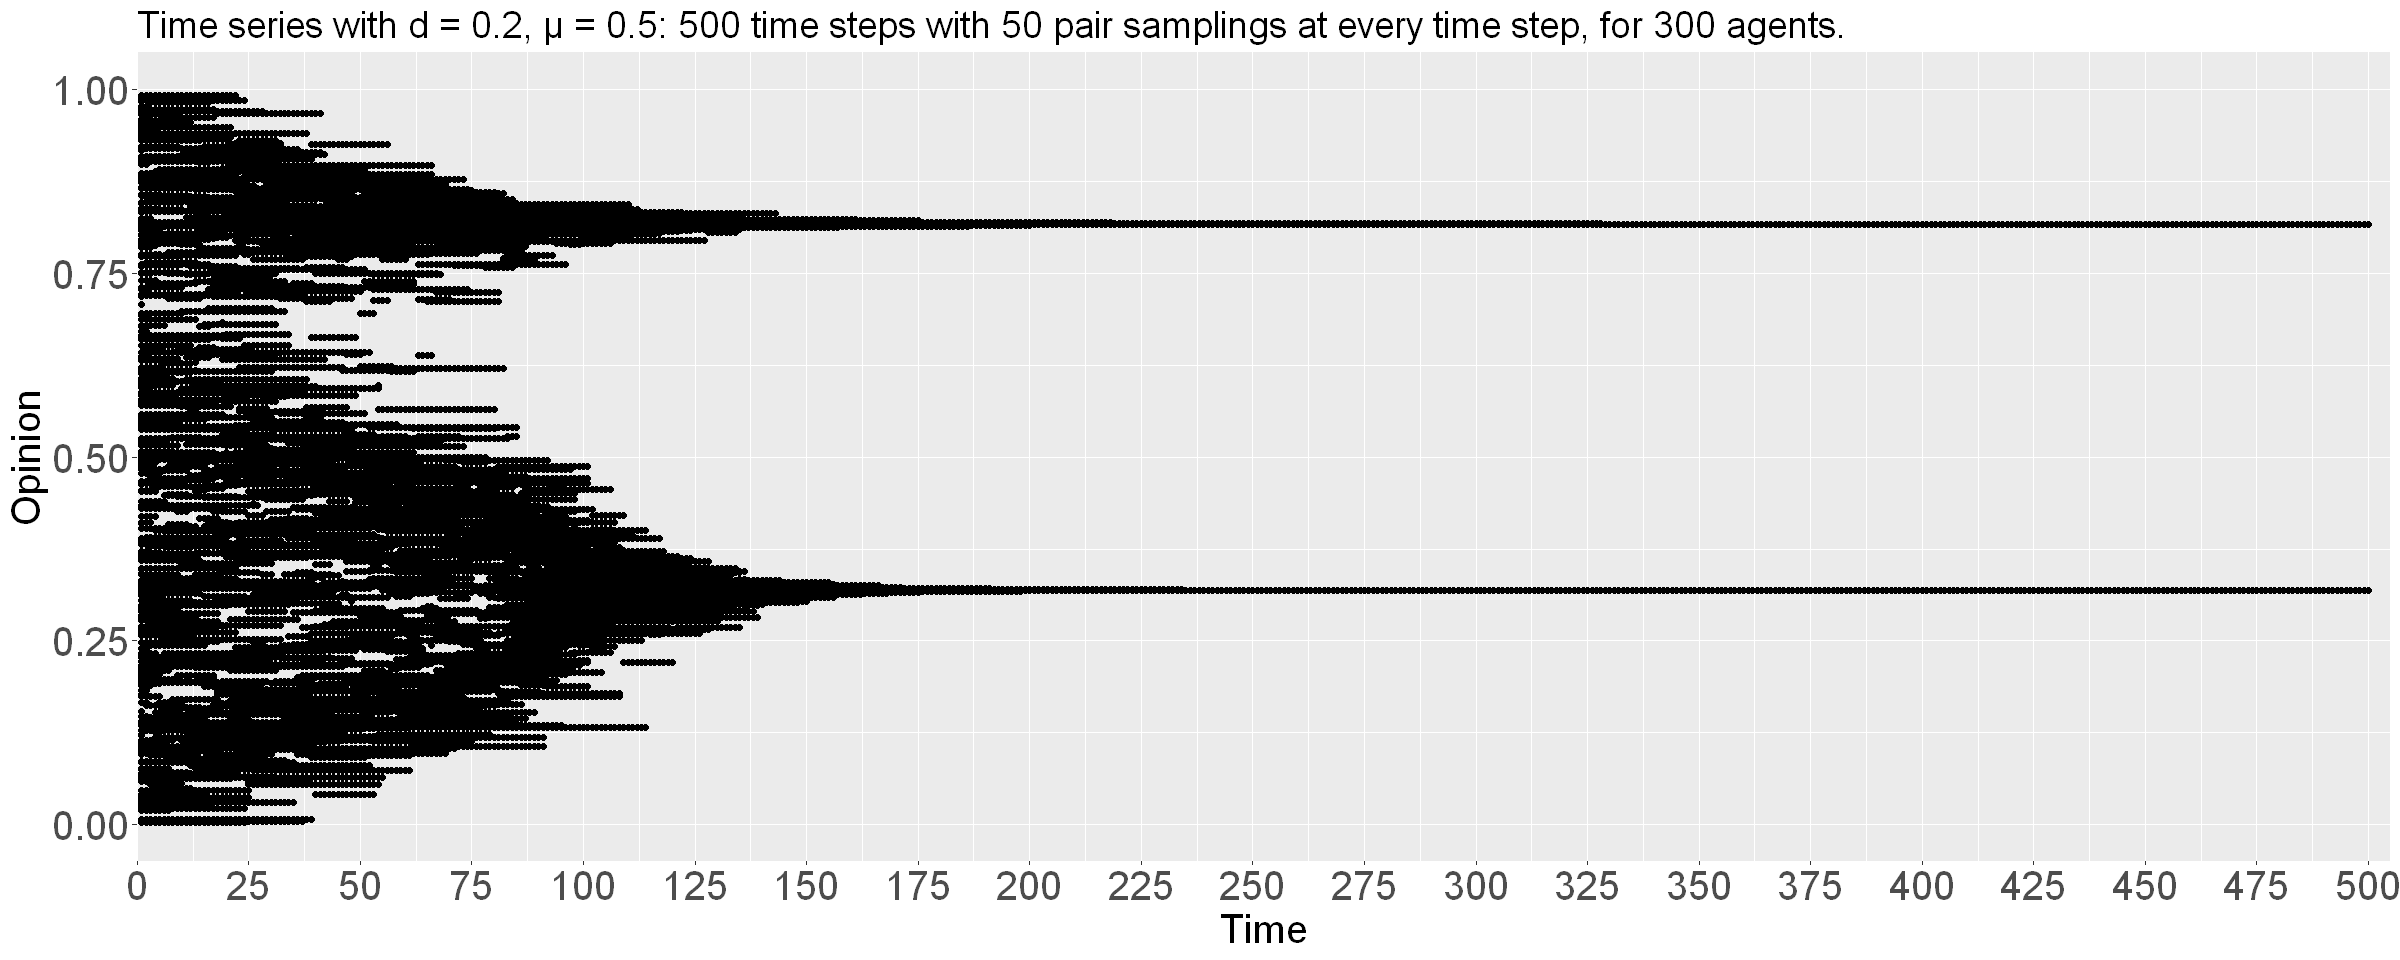

In [4]:
npair = 50

N = 300
T = 500
d = 0.2
mu_values = c(0.1, 0.2, 0.3, 0.4, 0.5)

for (mu in mu_values){

    df_opinions = updating_opinions(N, T, npair, d, mu)
    print(plot_time_series(df_opinions))
}

- repeat several times with same parameters

In [5]:
# npair = 50

# N = 300 
# T = 500 
# d = 0.7
# mu = 0.5  

# reps = 5

# for (i in 1:reps){
#     df_opinions = updating_opinions(N, T, npair, d, mu)
#     print(plot_time_series(df_opinions))
# }

- try different distributions for initial opinions: multimodal spectra of opinions. This will be omitted, since there is no reason to believe that the final results will be any different from what has been obtained until now.

### Final opinions as a function of initial opinions

We can now try to plot final opinions as a function of initial opinions. 

For higher values of $\mu$, there is a larger overlap between final opinions, while this overlap greatly disappears for smaller values of $\mu$.

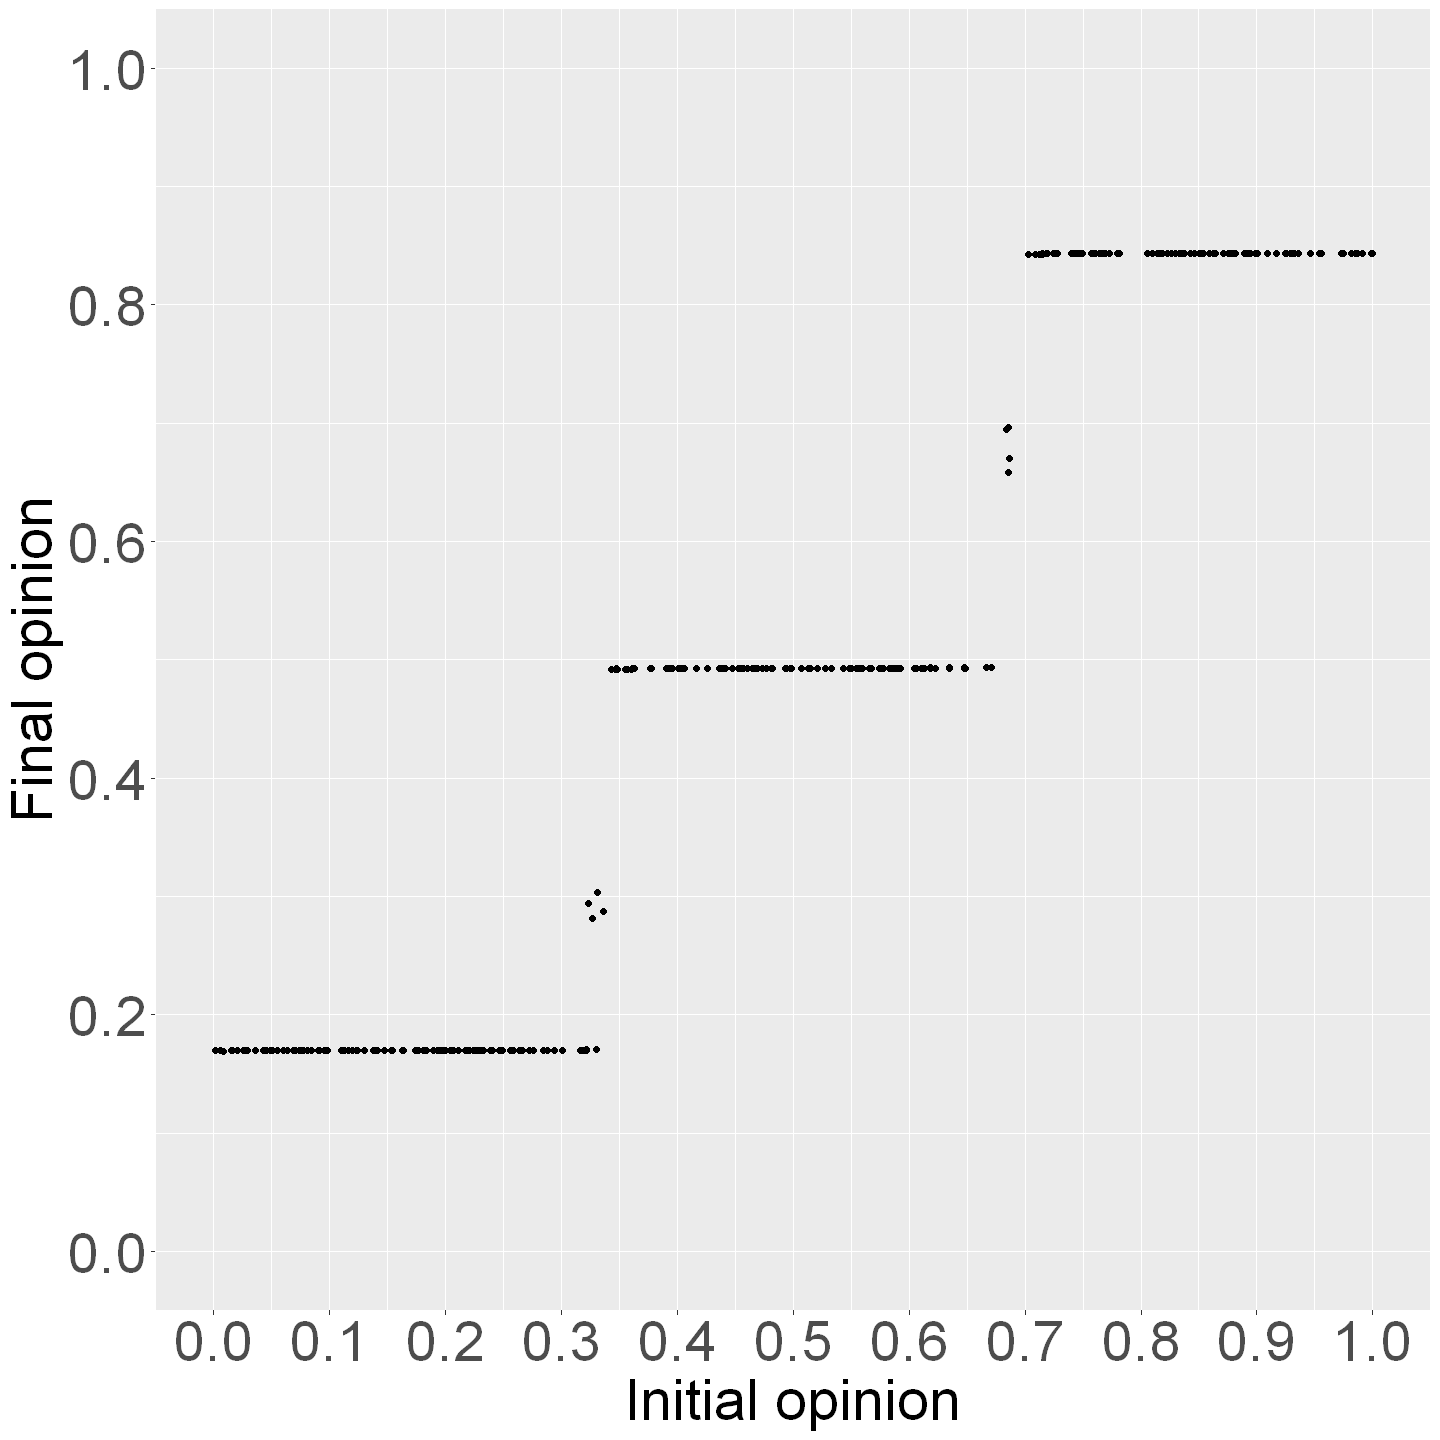

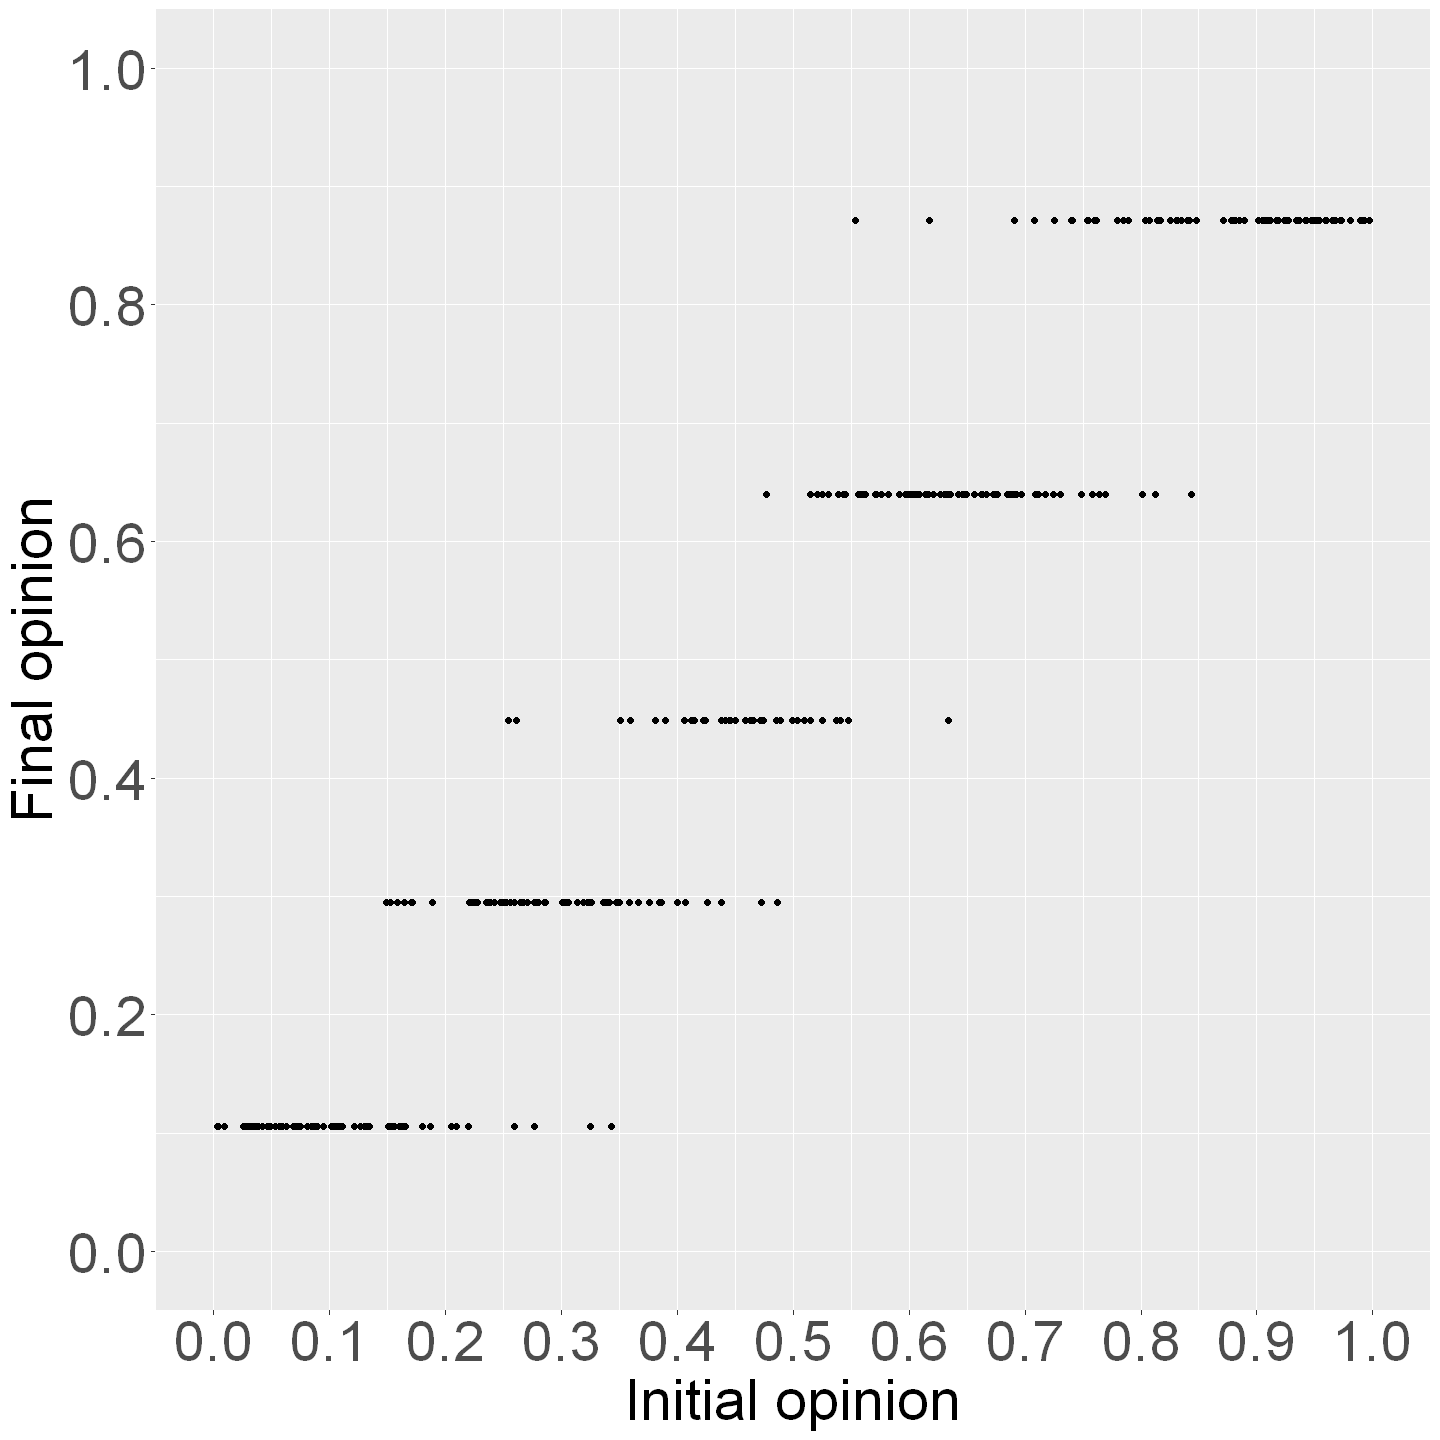

In [6]:
npair = 500000

N = 300
T = 2 # just initial and final
d = 0.1
mu_values = c(0.01, 0.5)

options(repr.plot.width=12, repr.plot.height=12)

for (mu in mu_values){
    df_opinions = updating_opinions(N, T, npair, d, mu)
    print(plot_final_vs_initial_opinions(df_opinions))
}

### Maximum number of peaks as a function of $d$

Finally, we want to plot the number of peaks of the final distribution as a function of $d$.

We will compute statistics of the number of peaks of opinions as a function of $d$ for 200 samples ($\mu = 0.5$,  $N = 300$, 50000 pair samplings).


In [15]:
reps = 100 # 200

npair = 10000 # 50000

N = 100
T = 2 
d_values = seq(0.03, 0.5, by=0.03)
mu = 0.5
max_peaks = 12

df_peaks = number_of_peaks(N, T, npair, d_values, mu, reps, max_peaks)
df_peaks

,d,1 peak,2 peak,3 peak,4 peak,5 peak,6 peak,7 peak,8 peak,9 peak,10 peak,11 peak,12 peak
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03,0,0,0,0,0,0,0,0,1,11,88,0
2,0.06,0,0,0,0,0,0,18,26,43,13,0,0
3,0.09,0,0,0,2,22,49,24,3,0,0,0,0
4,0.12,0,0,6,42,47,5,0,0,0,0,0,0
5,0.15,0,2,45,48,5,0,0,0,0,0,0,0
6,0.18,0,16,66,18,0,0,0,0,0,0,0,0
7,0.21,0,42,56,2,0,0,0,0,0,0,0,0
8,0.24,0,76,24,0,0,0,0,0,0,0,0,0
9,0.27,5,78,17,0,0,0,0,0,0,0,0,0


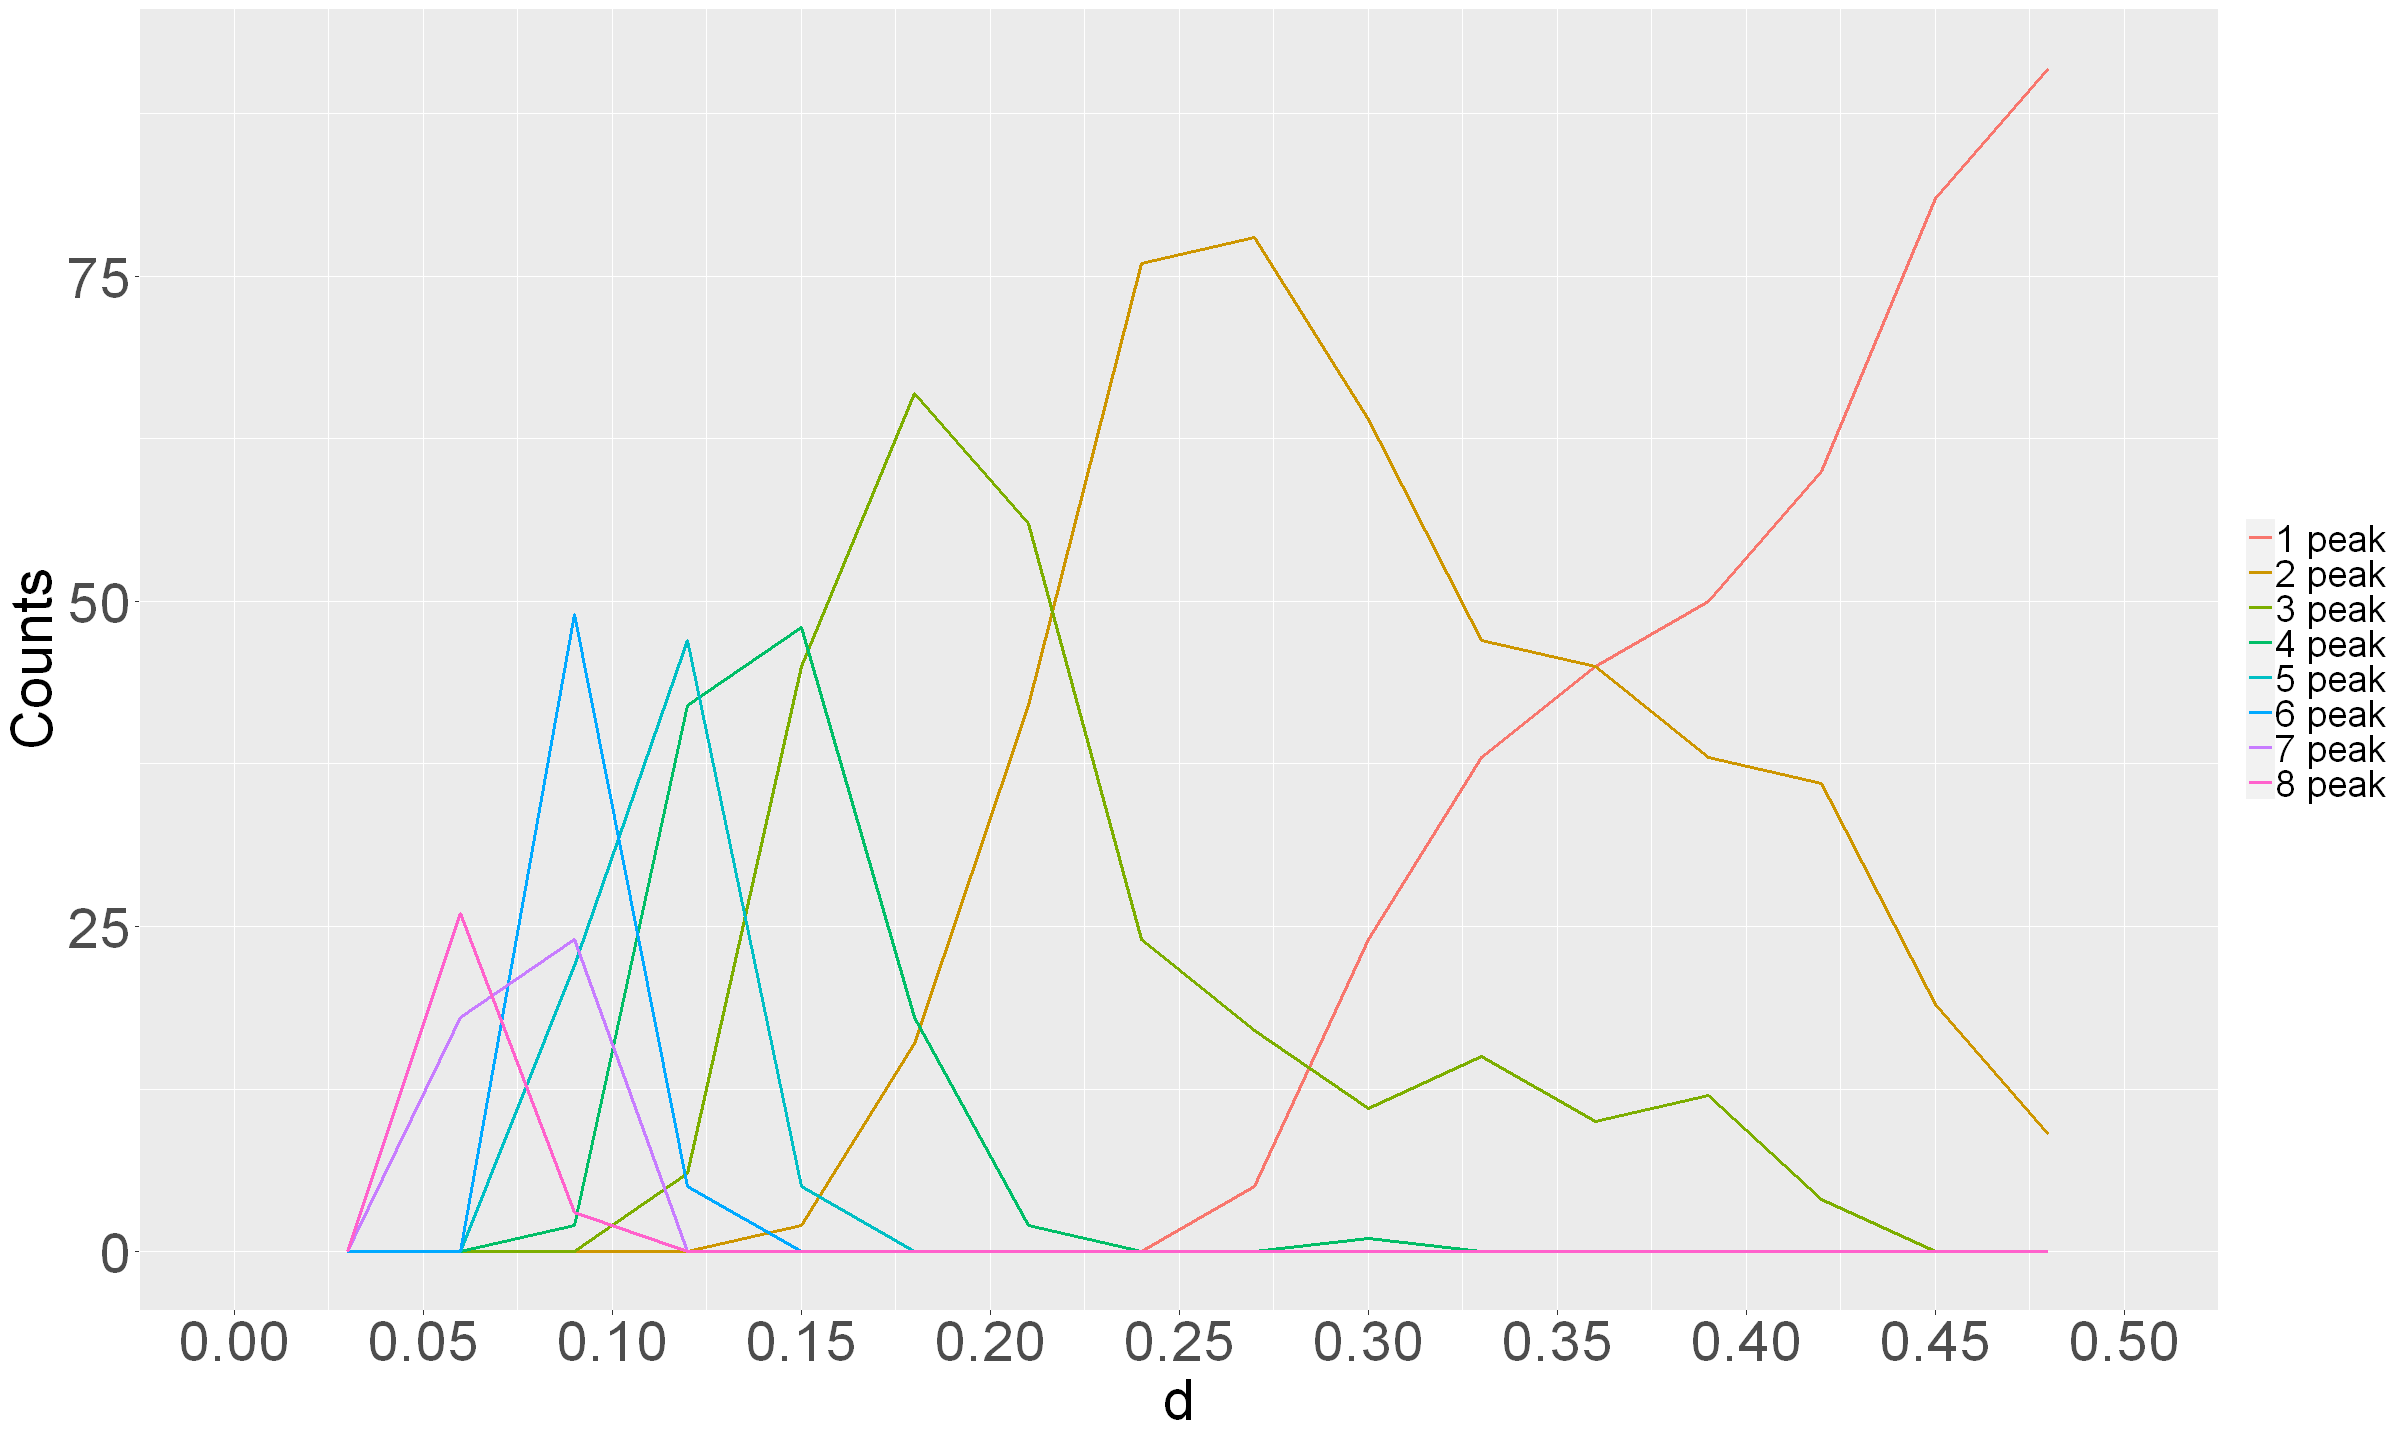

In [24]:
options(repr.plot.width=20, repr.plot.height=12)

df_peaks_cut = df_peaks %>% select(-c(10, 11, 12, 13))
plot_number_of_peaks_d(df_peaks_cut)

## 2. Social Networks: analysis and results

### Square lattice: extreme simplification

#### Results for $d > 0.3$

For $d > 0.3$ we observe so-called "extremists". 

The majority of agents has reached a uniform consensus around $x = 0.5$, while a few isolated agents have extreme opinions, close to 0 or 1.

We can try with different seeds: in some cases, total convergence is obtained, but unless $d$ is very big ($d \gtrsim 0.5$) there usually are extremists.

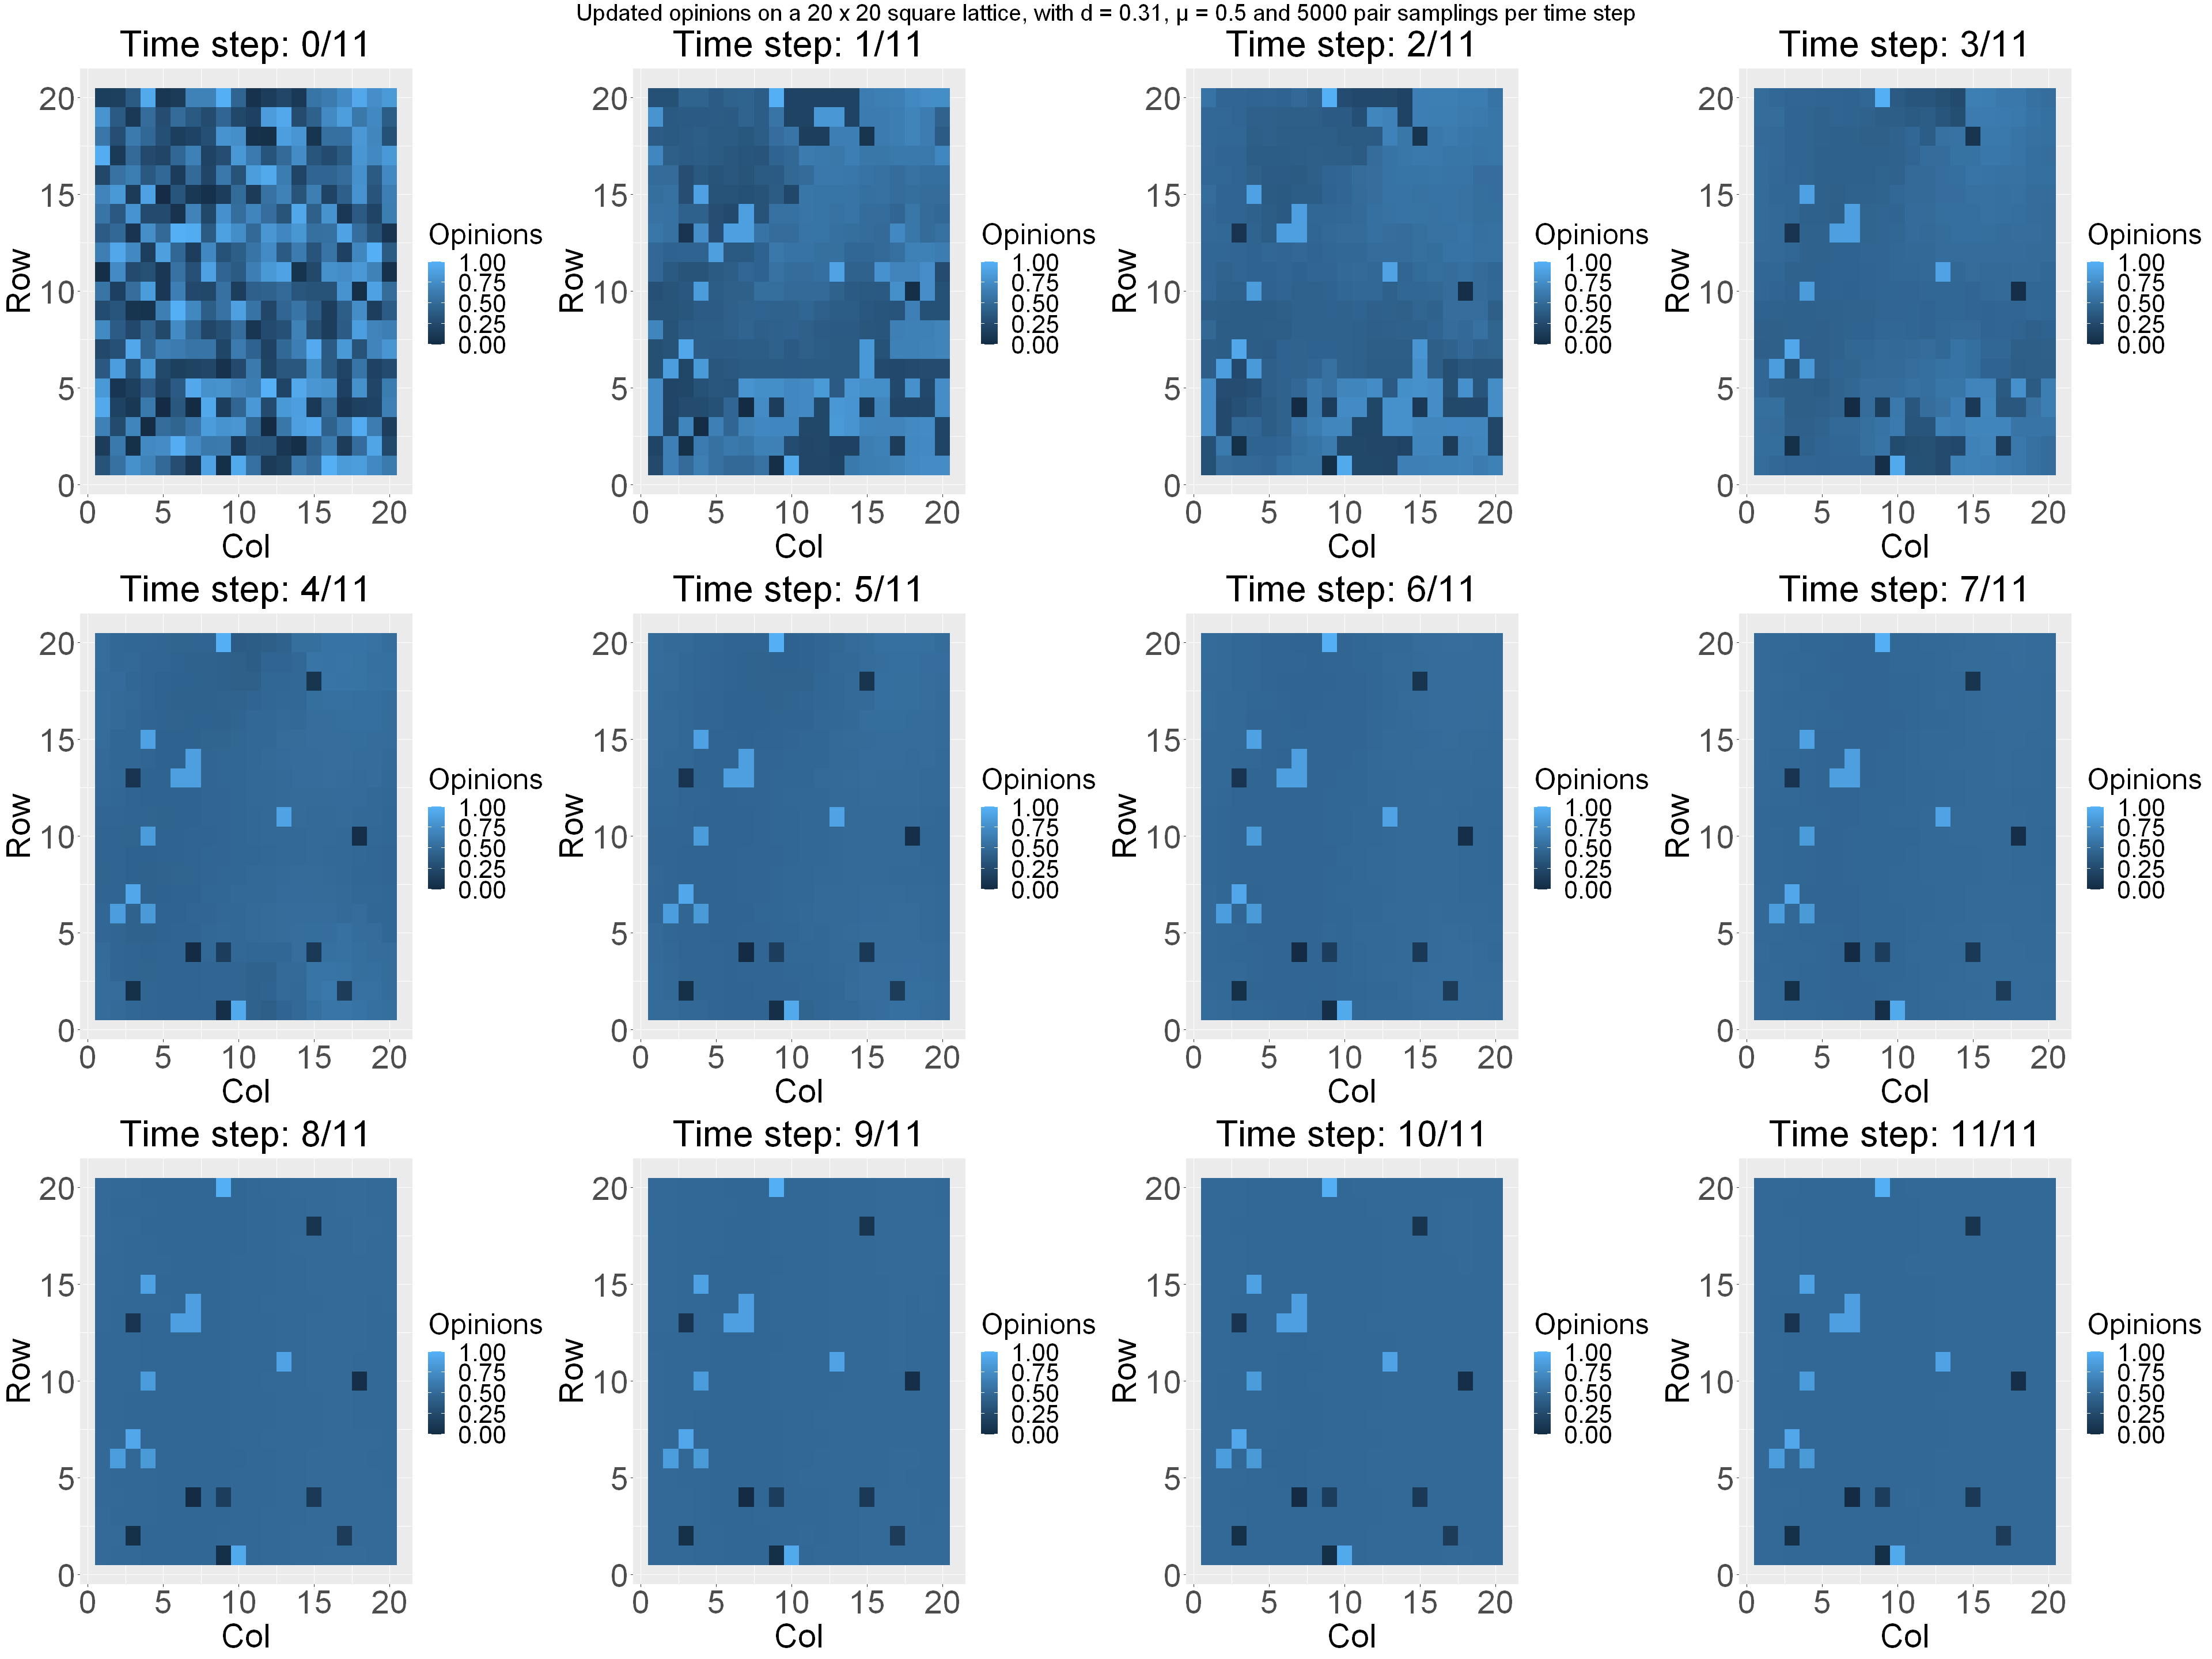

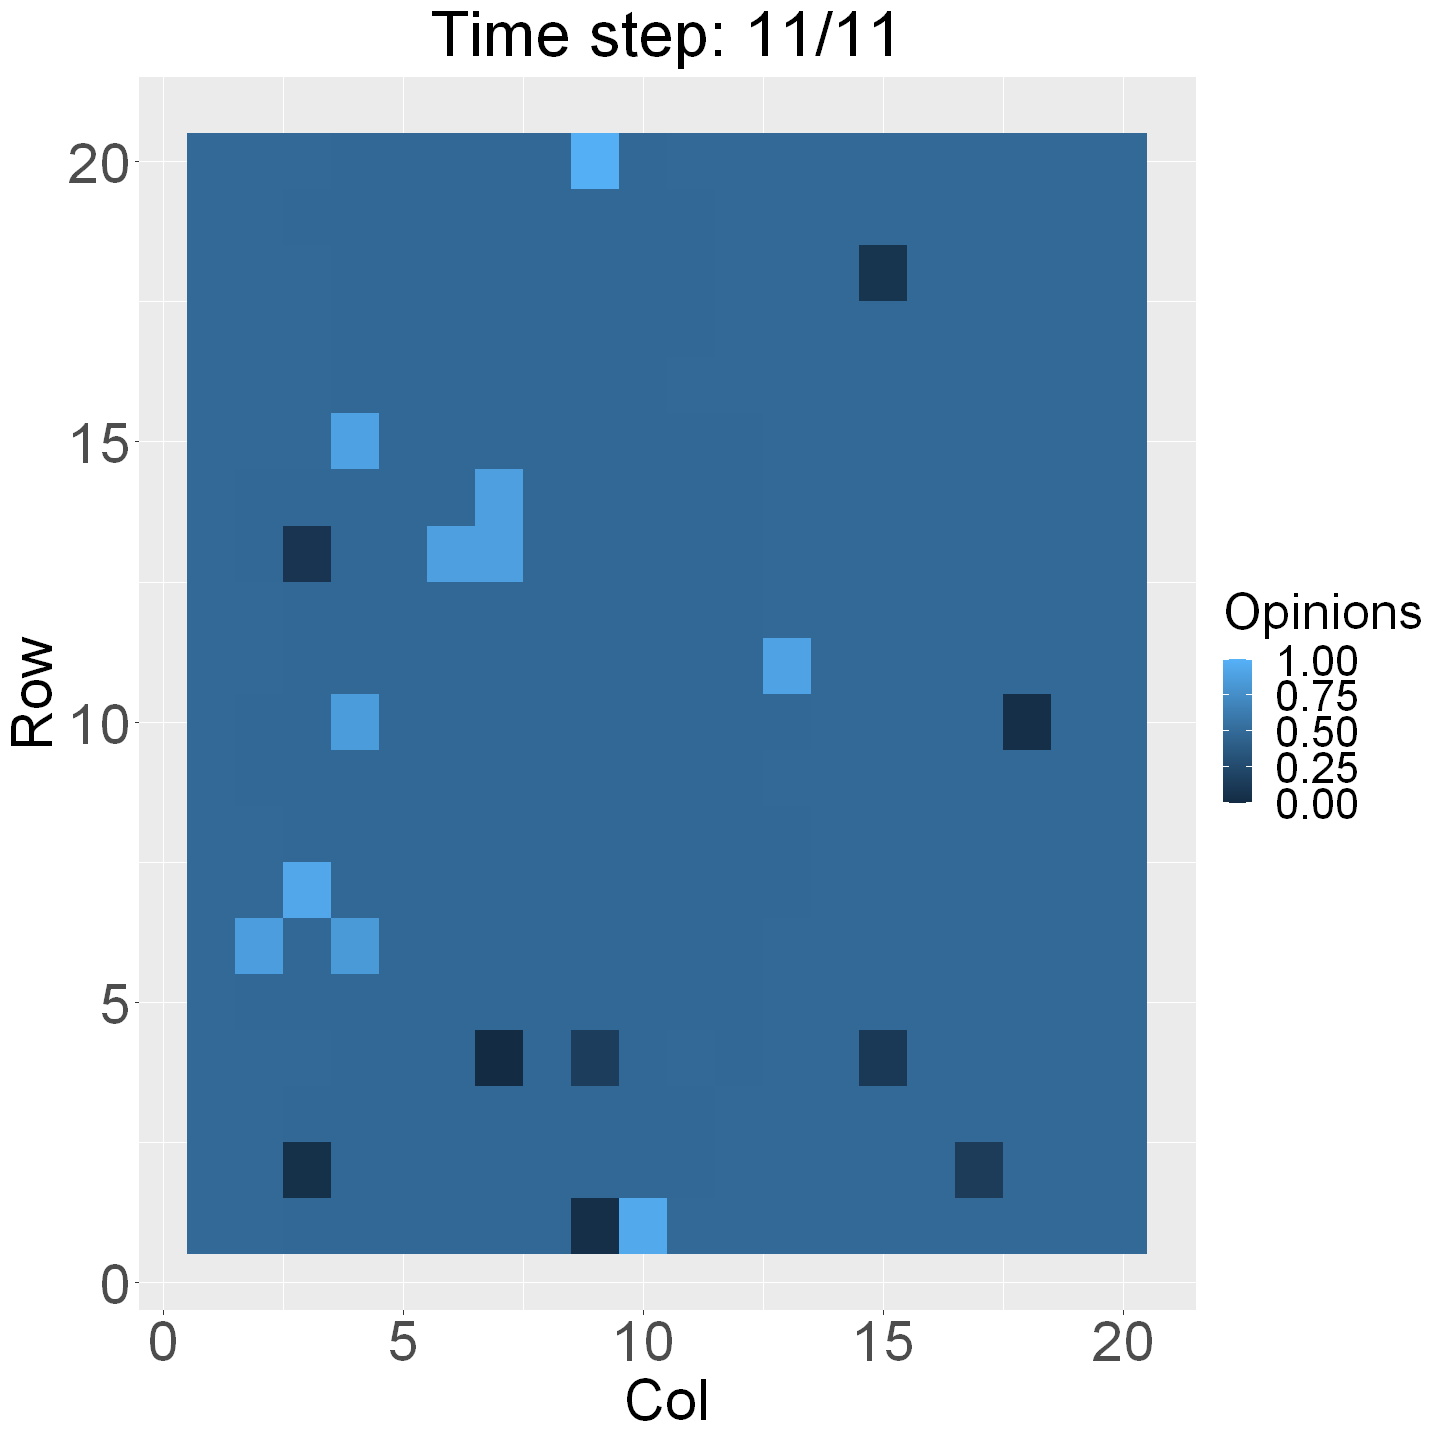

In [27]:
n = 20 # lattice dimensions: n x n
N = n^2
g = make_lattice(dimvector=c(n, n), directed=FALSE, circular=TRUE)

npair = 5000
T = 11
d = 0.31
mu = 0.5

set.seed(58)
df_ops = updating_opinions_lattice(g, T, npair, d, mu)

ncol = 4
side = 8
plot_lattice_grid(df_ops, ncol, side, T)

options(repr.plot.width=12, repr.plot.height=12)
plot_lattice(df_ops[df_ops$TimeStep == T,])

In [14]:
# set.seed(42)
# df_ops = updating_opinions_lattice(g, T, npair, d, mu)
# plot_lattice_grid(df_ops, ncol, side, T)

#### Results for $d < 0.3$

<!-- For $d > 0.3$ we observe so-called "extremists". 

The majority of agents has reached a uniform consensus around $x = 0.5$, while a few isolated agents have extreme opinions, close to 0 or 1.

We can try with different seeds: in some cases, total convergence is obtained, but unless $d$ is very big ($d \gtrsim 0.5$) there usually are extremists. -->

For values of $d < 0.3$, we find noticeable differences from the previous case.

First of all, we see that converging opinions can only be reached on connected clusters of agents. 

Next, we notice that there is only one connected percolating cluster, with the final opinion placed right around the middle ($x \simeq 0.5$).

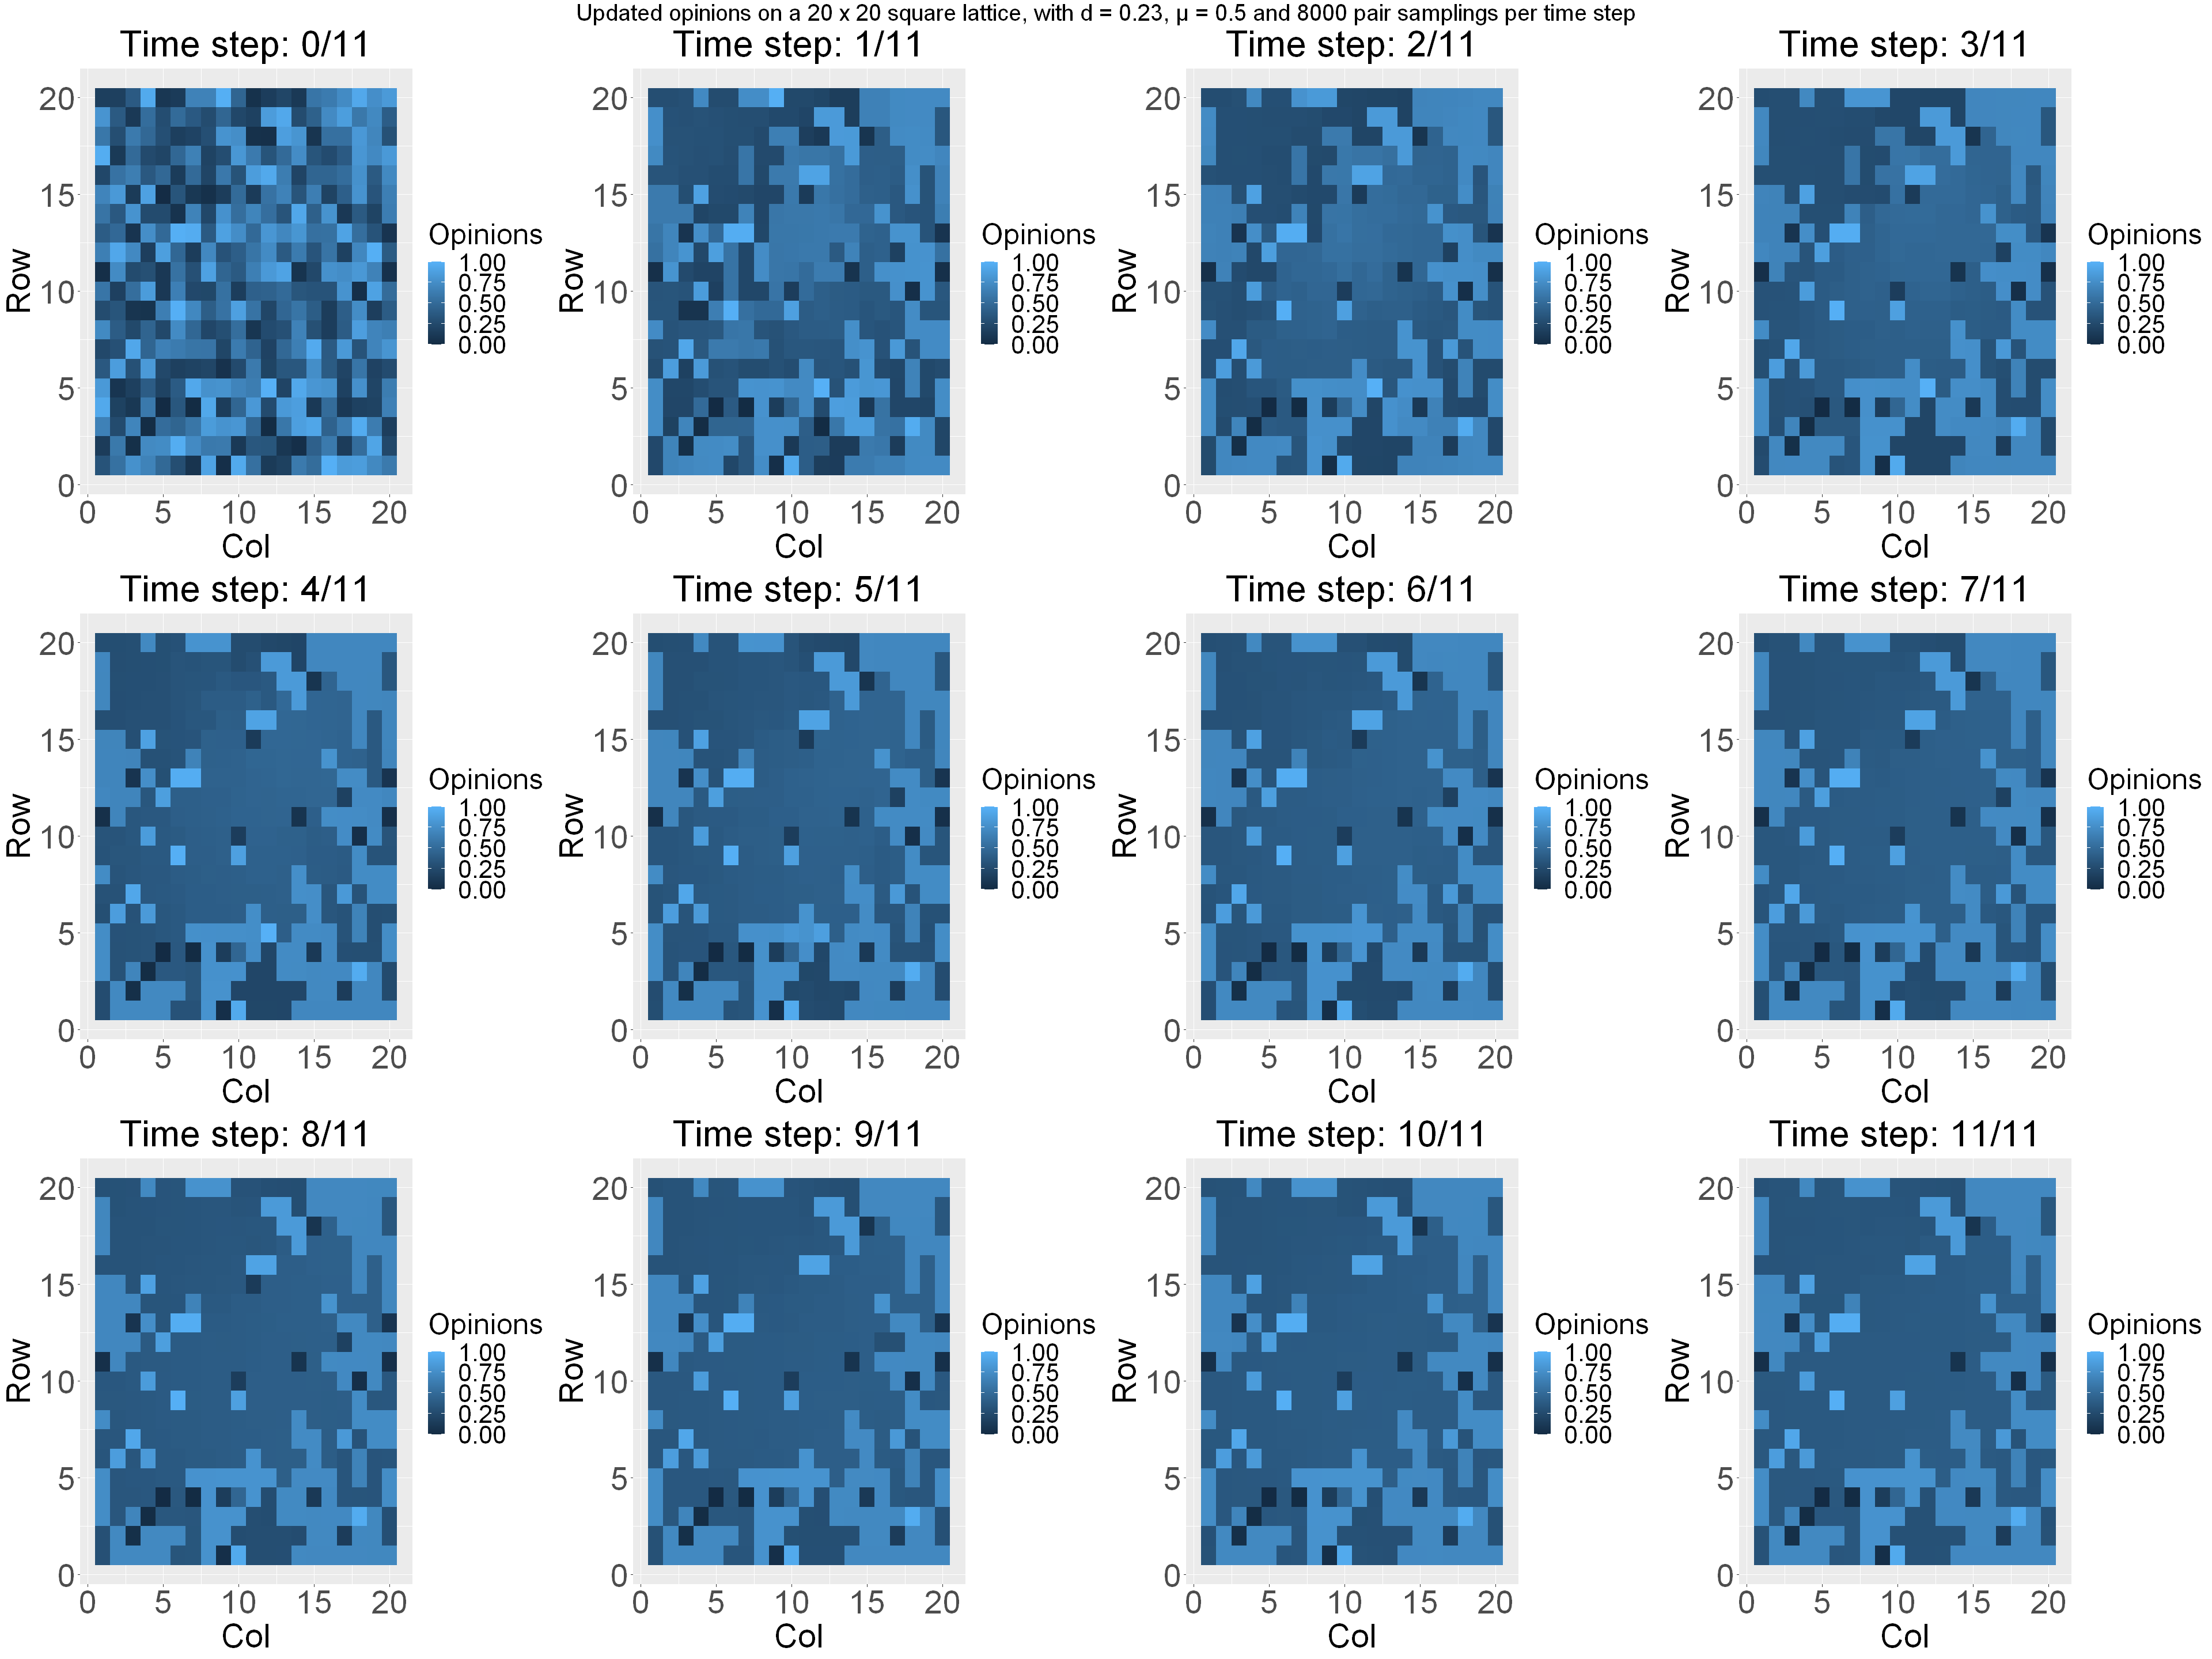

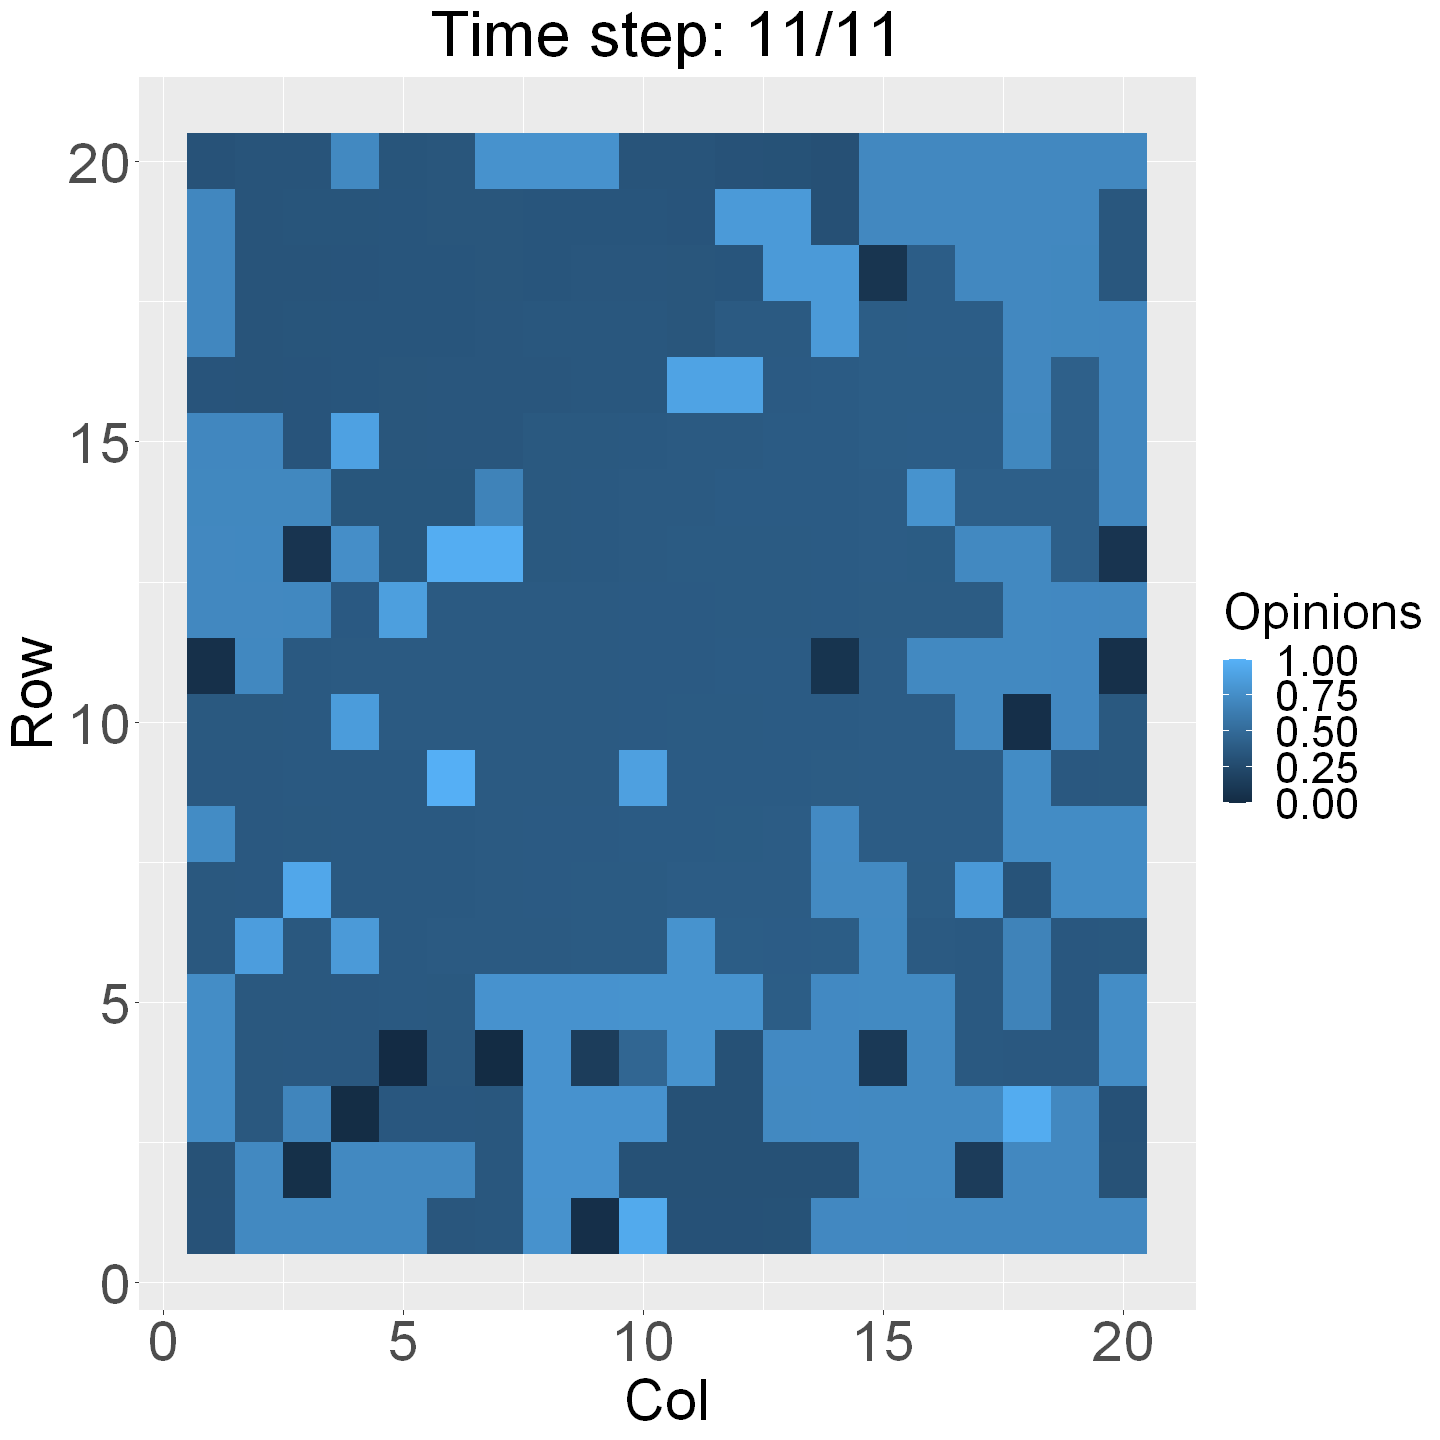

In [28]:
npair = 8000
T = 11
d = 0.23
mu = 0.5

# npair = 100000
# T = 1
# d = 0.2
# mu = 0.5

set.seed(58)
df_ops = updating_opinions_lattice(g, T, npair, d, mu)
plot_lattice_grid(df_ops, ncol, side, T)

options(repr.plot.width=12, repr.plot.height=12)
plot_lattice(df_ops[df_ops$TimeStep == T,])

##### Histogram of final opinions

All other non-percolating clusters are mutually disjoint: we can furthermore see how the opinions in these clusters are distributed by plotting a histogram of the opinions in the lattice.

<!-- The differences of opinions between group of clusters relates to $d$, but the actual values inside a small cluster fluctuates because homogenisation occurred independently among the different clusters: the resulting opinion depends on fluctuations of initial opinions and histories from one cluster to the other. 

The same increase of fluctuations versus the full mixing case is observed from sample to sample with the same parameter values. -->

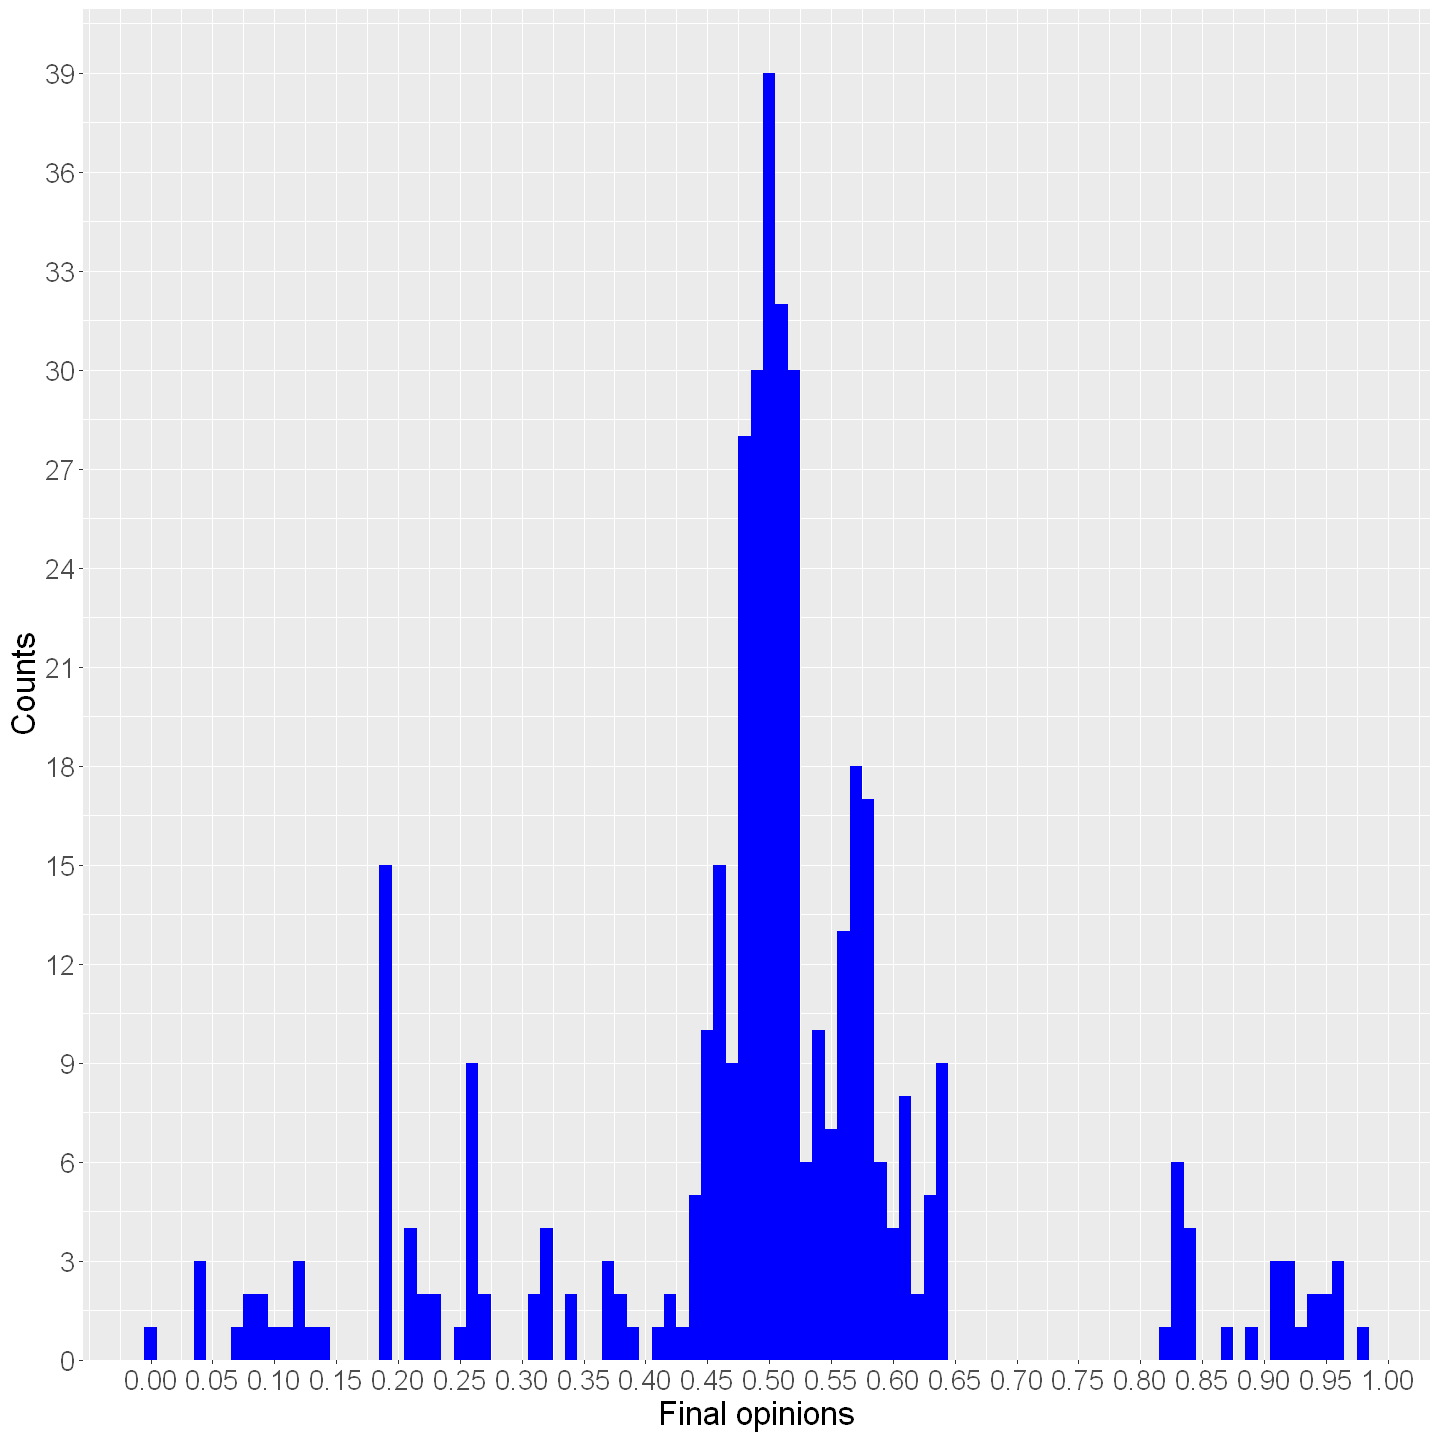

In [16]:
npair = 8000
T = 20
d = 0.23
mu = 0.5

set.seed(42)
df_ops = updating_opinions_lattice(g, T, npair, d, mu)
plot_histogram_final_opinions(df_ops)

### More complex networks

Try different kinds: randomly generated Barabasi-Albert.

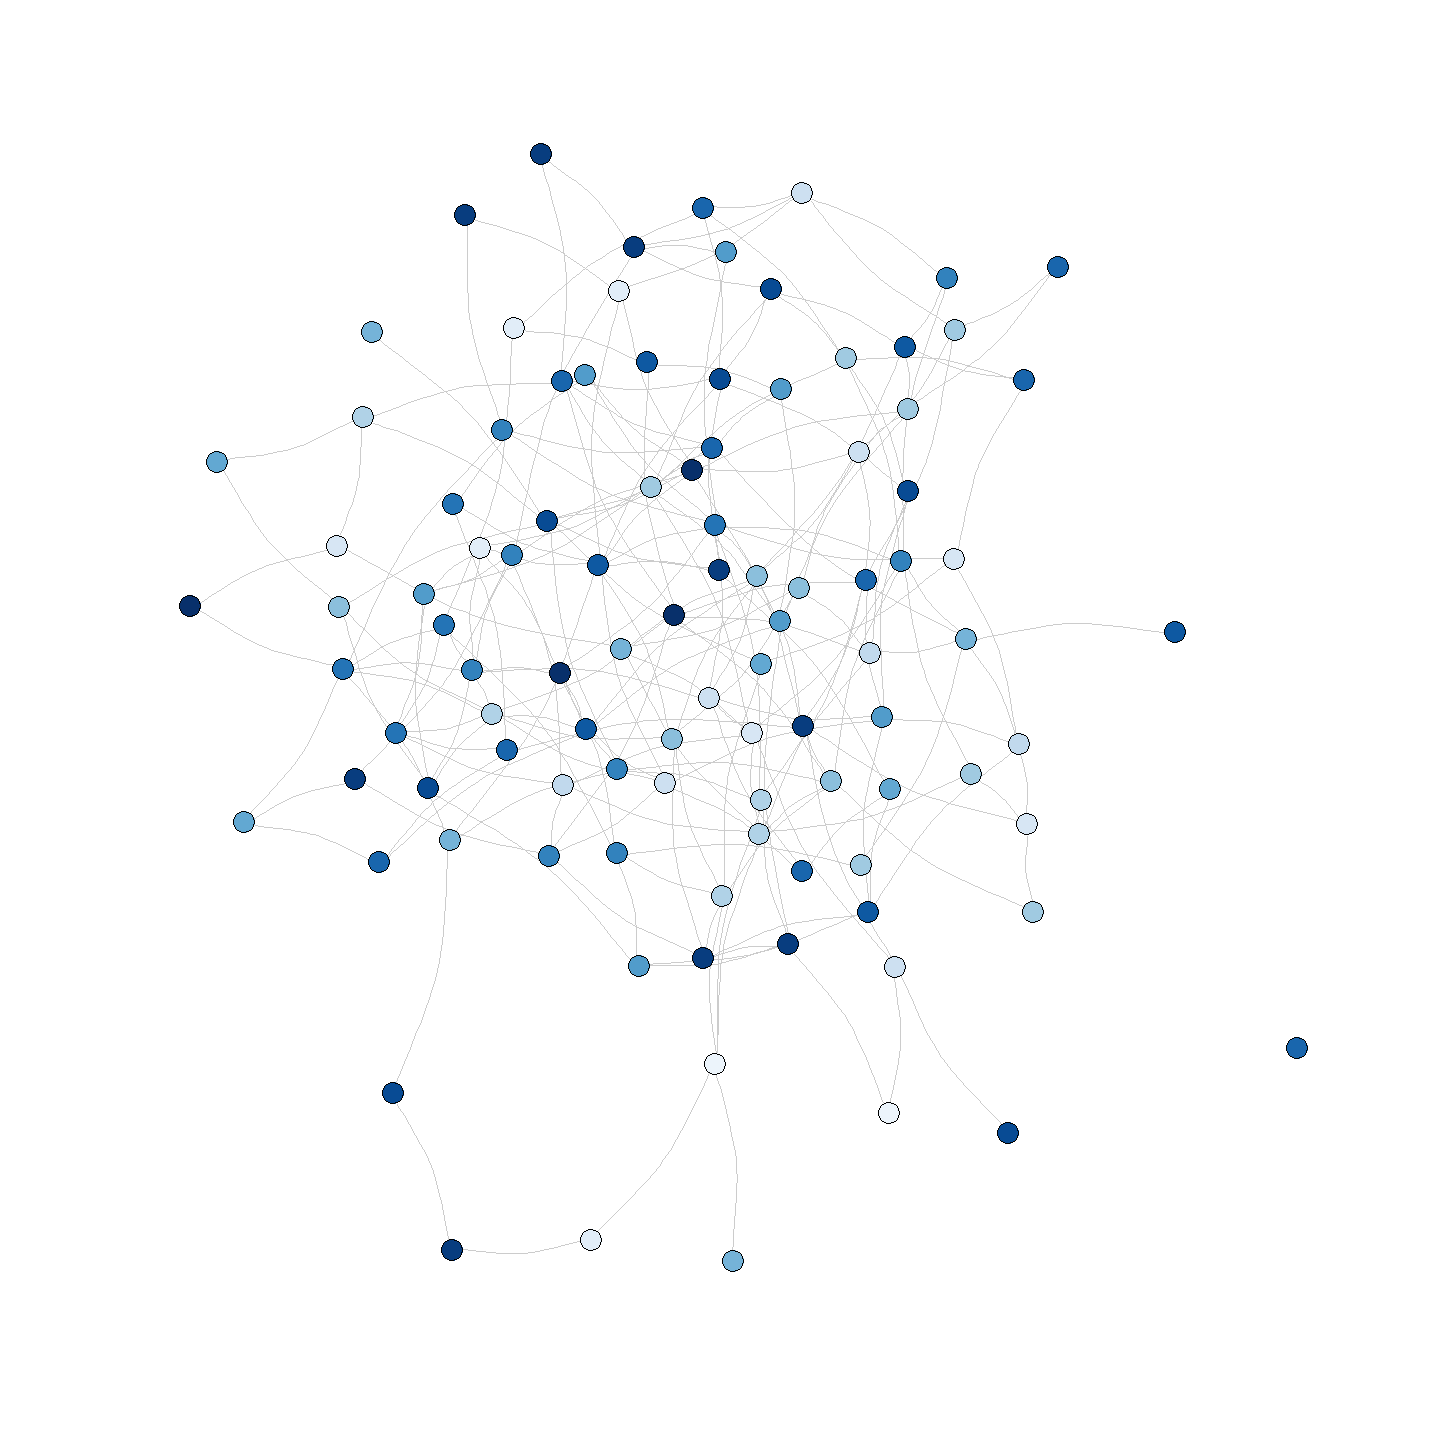

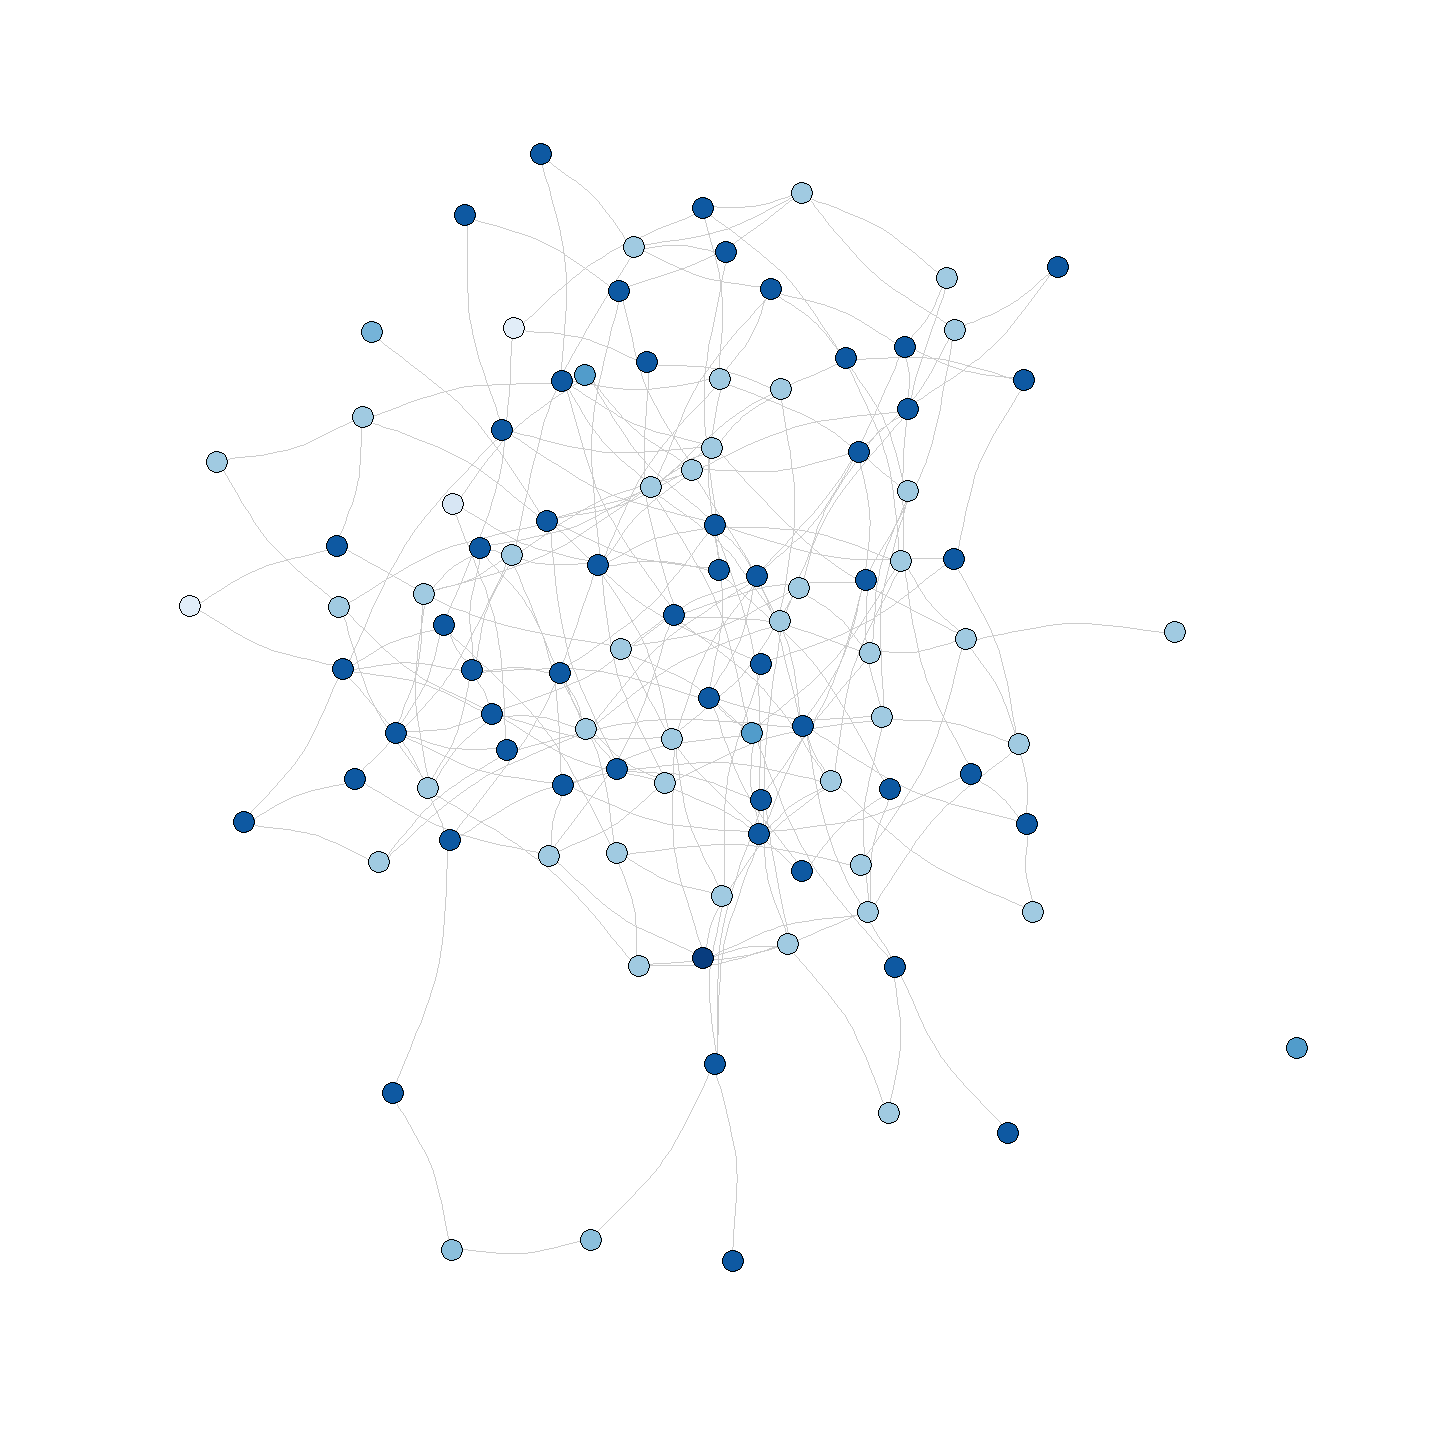

In [9]:
N = 100
g = erdos.renyi.game(N, p=log(N)/N, directed=F)
lay = layout_with_fr(g)

npair = 1000
T = 11
d = 0.2
mu = 0.5

set.seed(58)
df_ops = updating_opinions_lattice(g, T, npair, d, mu)

Ncolors = 20
blues_palette = colorRampPalette(rev(c(brewer.pal(9, "Blues"))))(Ncolors)

options(repr.plot.width=12, repr.plot.height=12)

ops0 = df_ops[df_ops$TimeStep == 0,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[ops0*Ncolors], edge.curved=0.2, vertex.size=4, edge.color="gray80", vertex.label=NA)

opsT = df_ops[df_ops$TimeStep == T,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[opsT*Ncolors], edge.curved=0.2, vertex.size=4, edge.color="gray80", vertex.label=NA)


IGRAPH 53262b7 U--- 100 99 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from 53262b7:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  3-- 7  5-- 8  1-- 9  6--10  3--11
[11]  1--12  1--13  1--14  8--15 10--16  3--17 10--18 10--19  8--20 12--21
[21]  2--22 11--23  1--24 14--25 23--26  1--27  6--28  1--29  1--30 10--31
[31]  1--32  1--33 12--34  1--35 32--36 36--37 14--38  1--39  6--40 13--41
[41]  1--42  6--43  1--44  8--45 26--46 14--47 33--48  1--49  2--50  7--51
[51] 34--52 19--53  1--54 29--55 48--56 14--57 34--58  8--59  2--60 24--61
[61]  1--62  2--63 15--64 44--65  5--66  6--67  1--68 57--69 32--70 32--71
+ ... omitted several edges

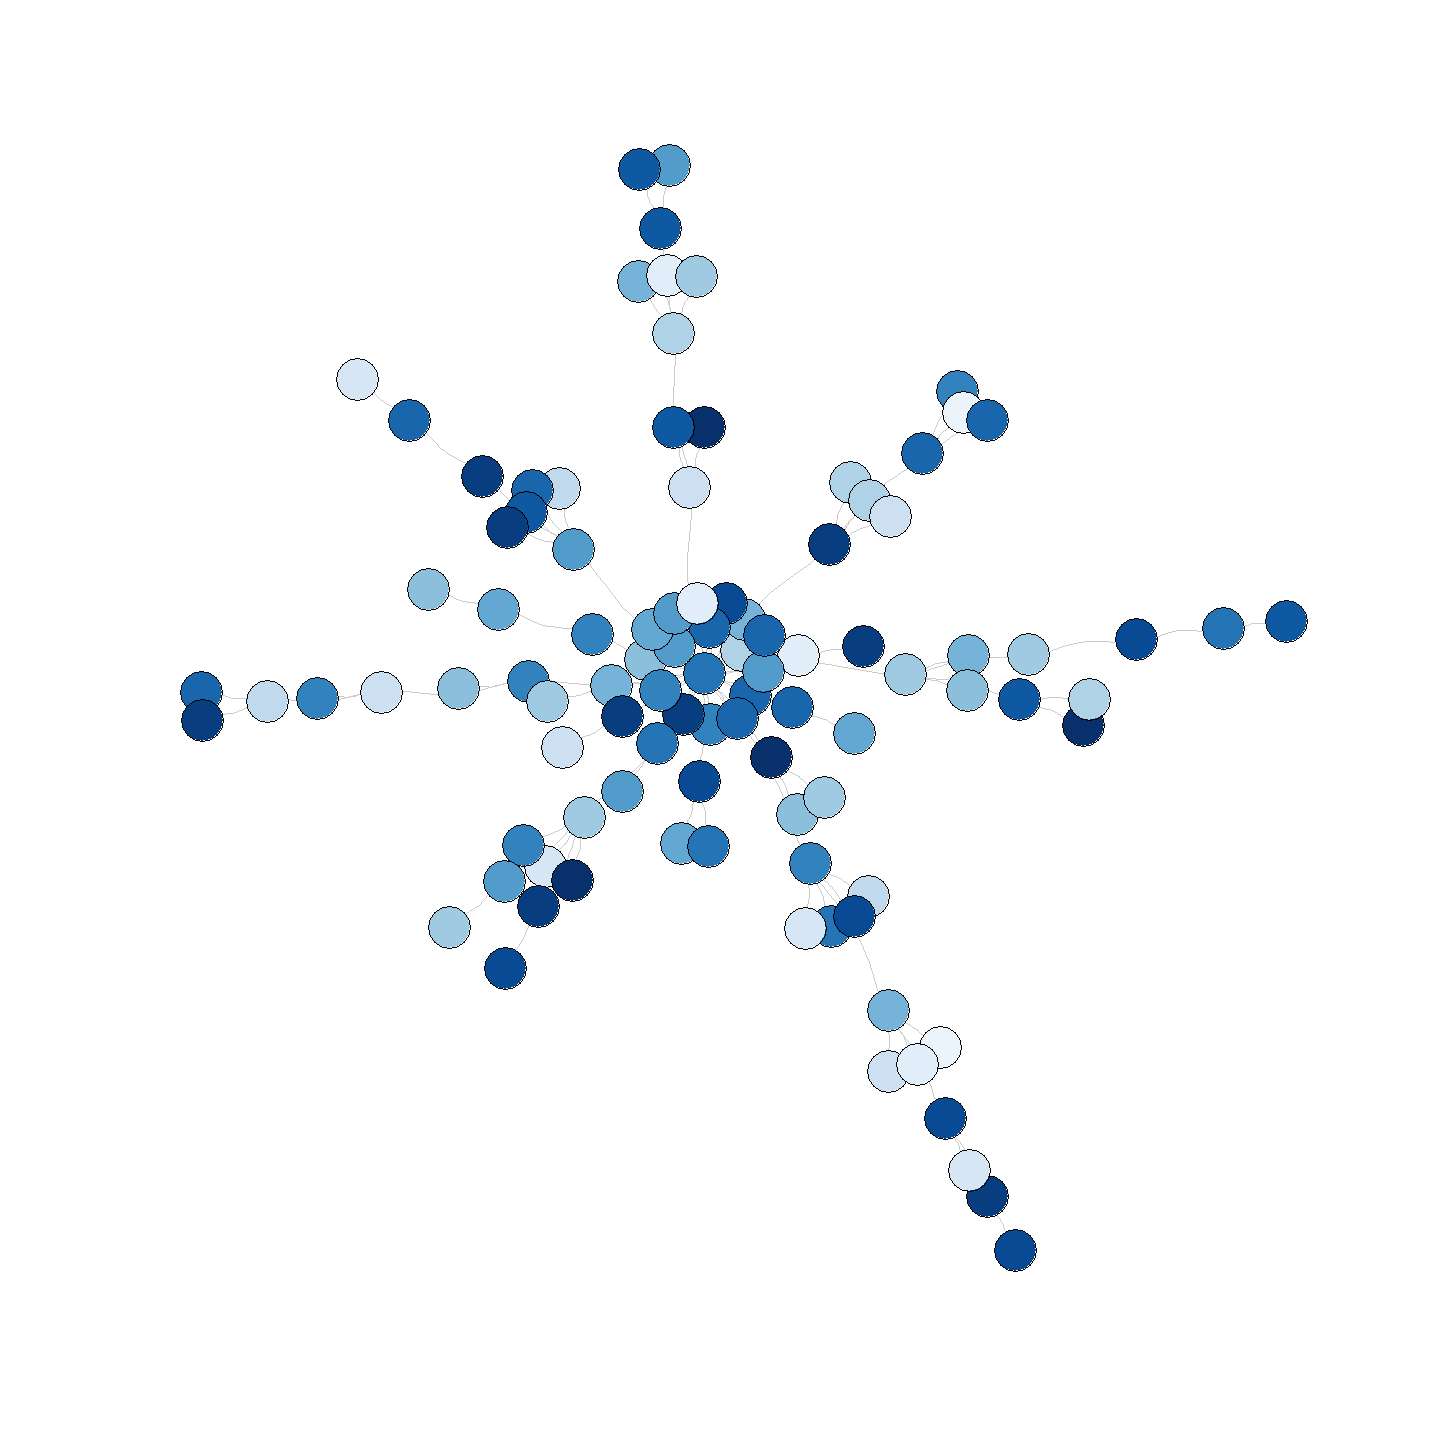

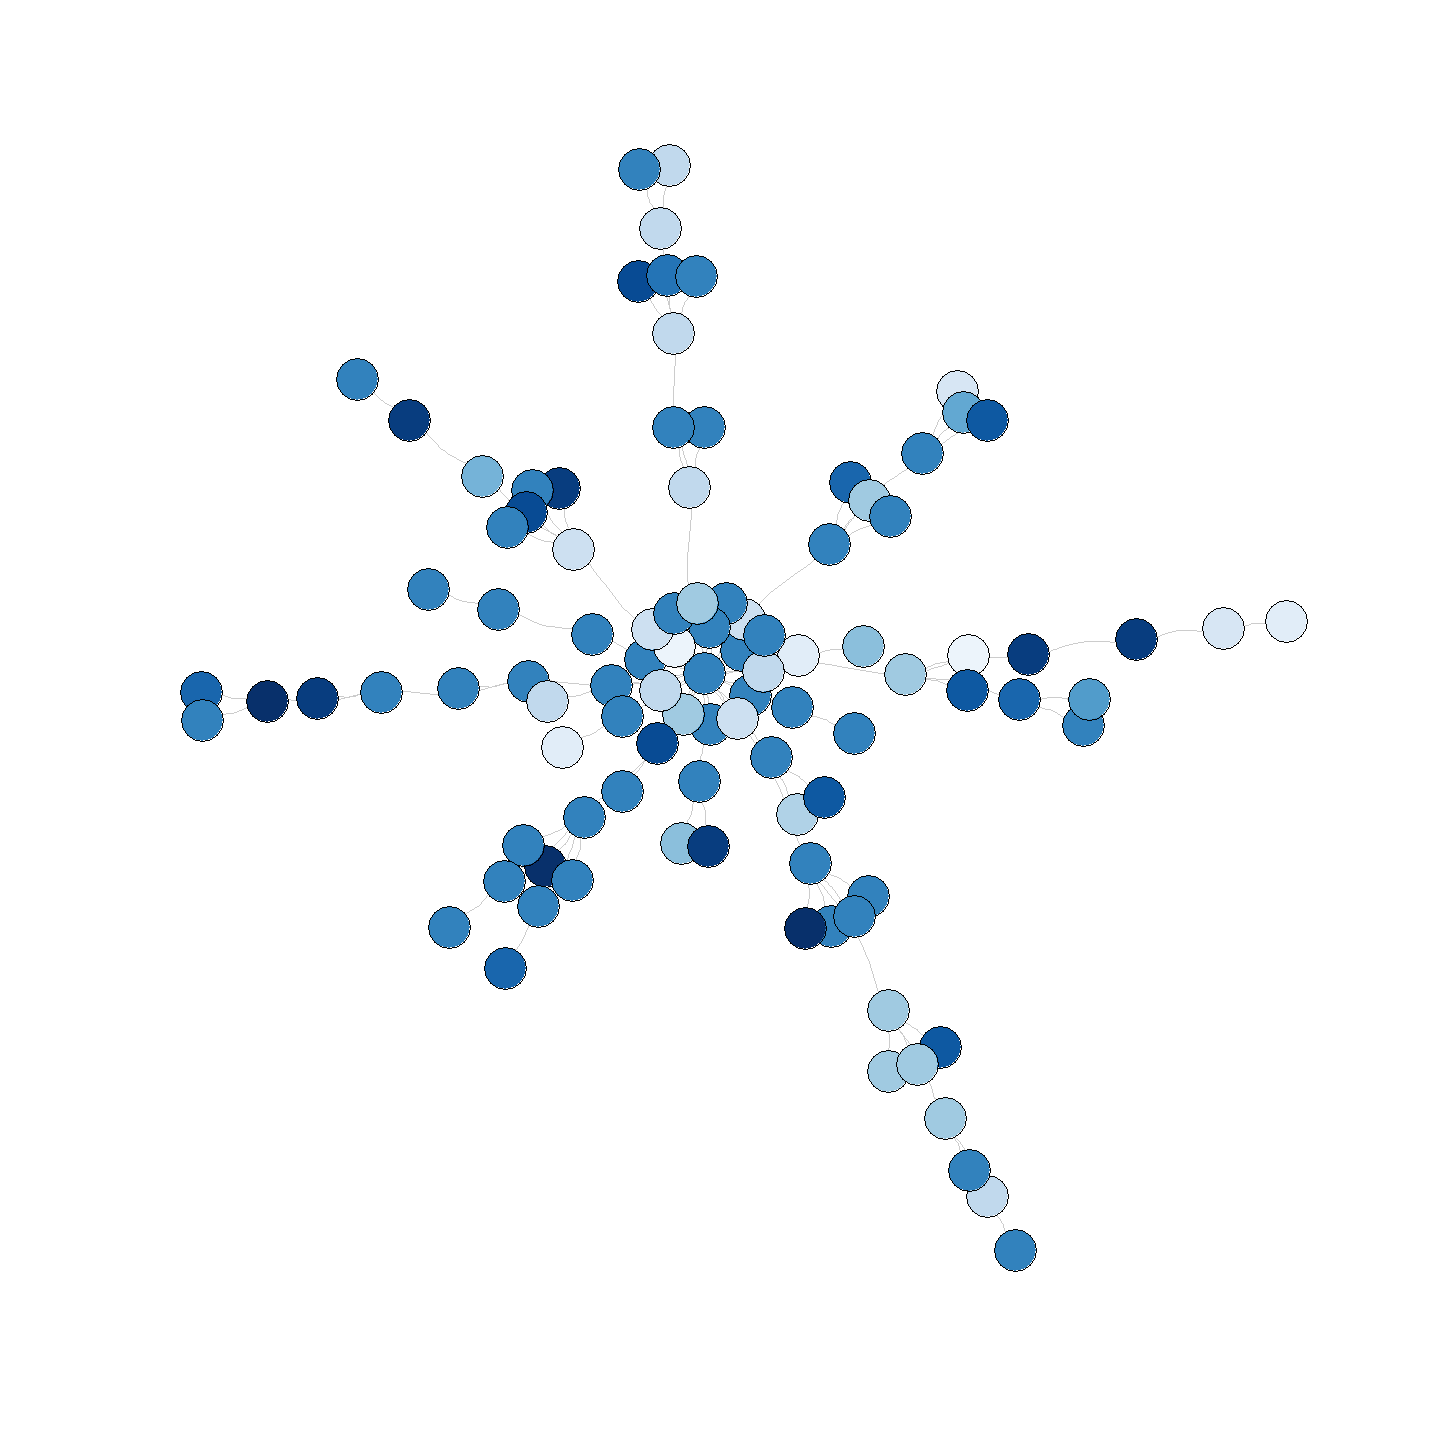

In [10]:
N = 100

g = barabasi.game(N, m=1, directed=F) 
lay = layout_with_fr(g)
g

npair = 1000
T = 100
d = 0.25
mu = 0.5

set.seed(58)

Nv = vcount(g)
V(g)$opinions = runif(Nv)
df_ops = data.frame(Node=1:Nv)
df_ops["TimeStep"] = 0
df_ops["Opinions"] = V(g)$opinions

pair = sample_pair(g)
df_ops_t = df_ops[df_ops$TimeStep == 0,]
updated_opinions = df_ops_t$Opinions

for (t in 1:T){
    for (i in 1:npair){
        pair = sample_pair(g)
        updated_opinions = readjustment(updated_opinions, pair, d, mu)
    }
    df_ops_t$TimeStep = t
    df_ops_t$Opinions = updated_opinions
    df_ops = rbind(df_ops, df_ops_t)
}

# df_ops


ops0 = df_ops[df_ops$TimeStep == 0,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[ops0*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

opsT = df_ops[df_ops$TimeStep == T,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[opsT*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

IGRAPH 617a781 U--- 100 197 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from 617a781:
 [1]  1-- 2  1-- 3  2-- 3  3-- 4  1-- 4  3-- 5  1-- 5  2-- 6  4-- 6  1-- 7
[11]  5-- 7  3-- 8  6-- 8  1-- 9  8-- 9  2--10  3--10  5--11  3--11  9--12
[21]  6--12  8--13  3--13 10--14  5--14  5--15 10--15  9--16  1--16  3--17
[31]  5--17 11--18  8--18  6--19  5--19  3--20 13--20  3--21 14--21 18--22
[41]  9--22  8--23 16--23  1--24 22--24  3--25  1--25  5--26  7--26  5--27
[51] 23--27  7--28  6--28  5--29 10--29  5--30  7--30 23--31  1--31 24--32
[61]  6--32  7--33 12--33  3--34 10--34 16--35  9--35 23--36  7--36 12--37
+ ... omitted several edges

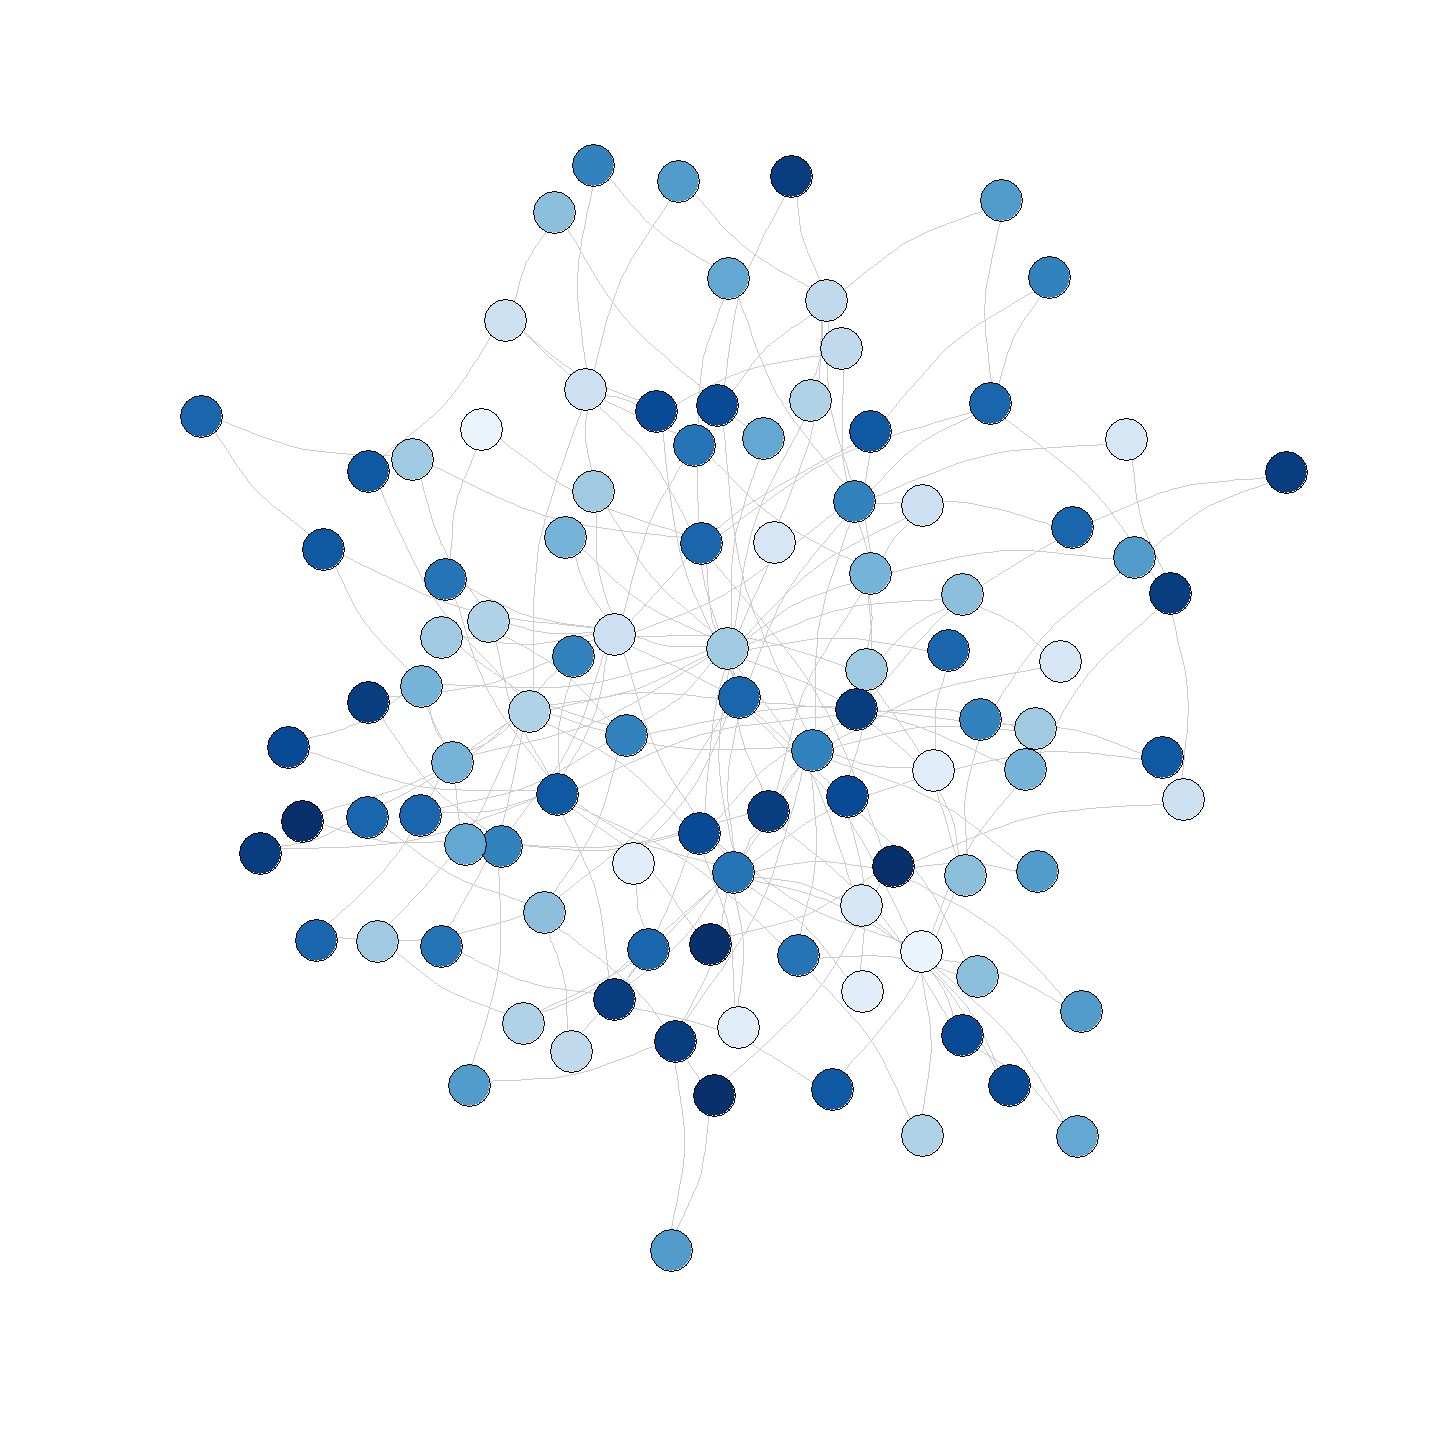

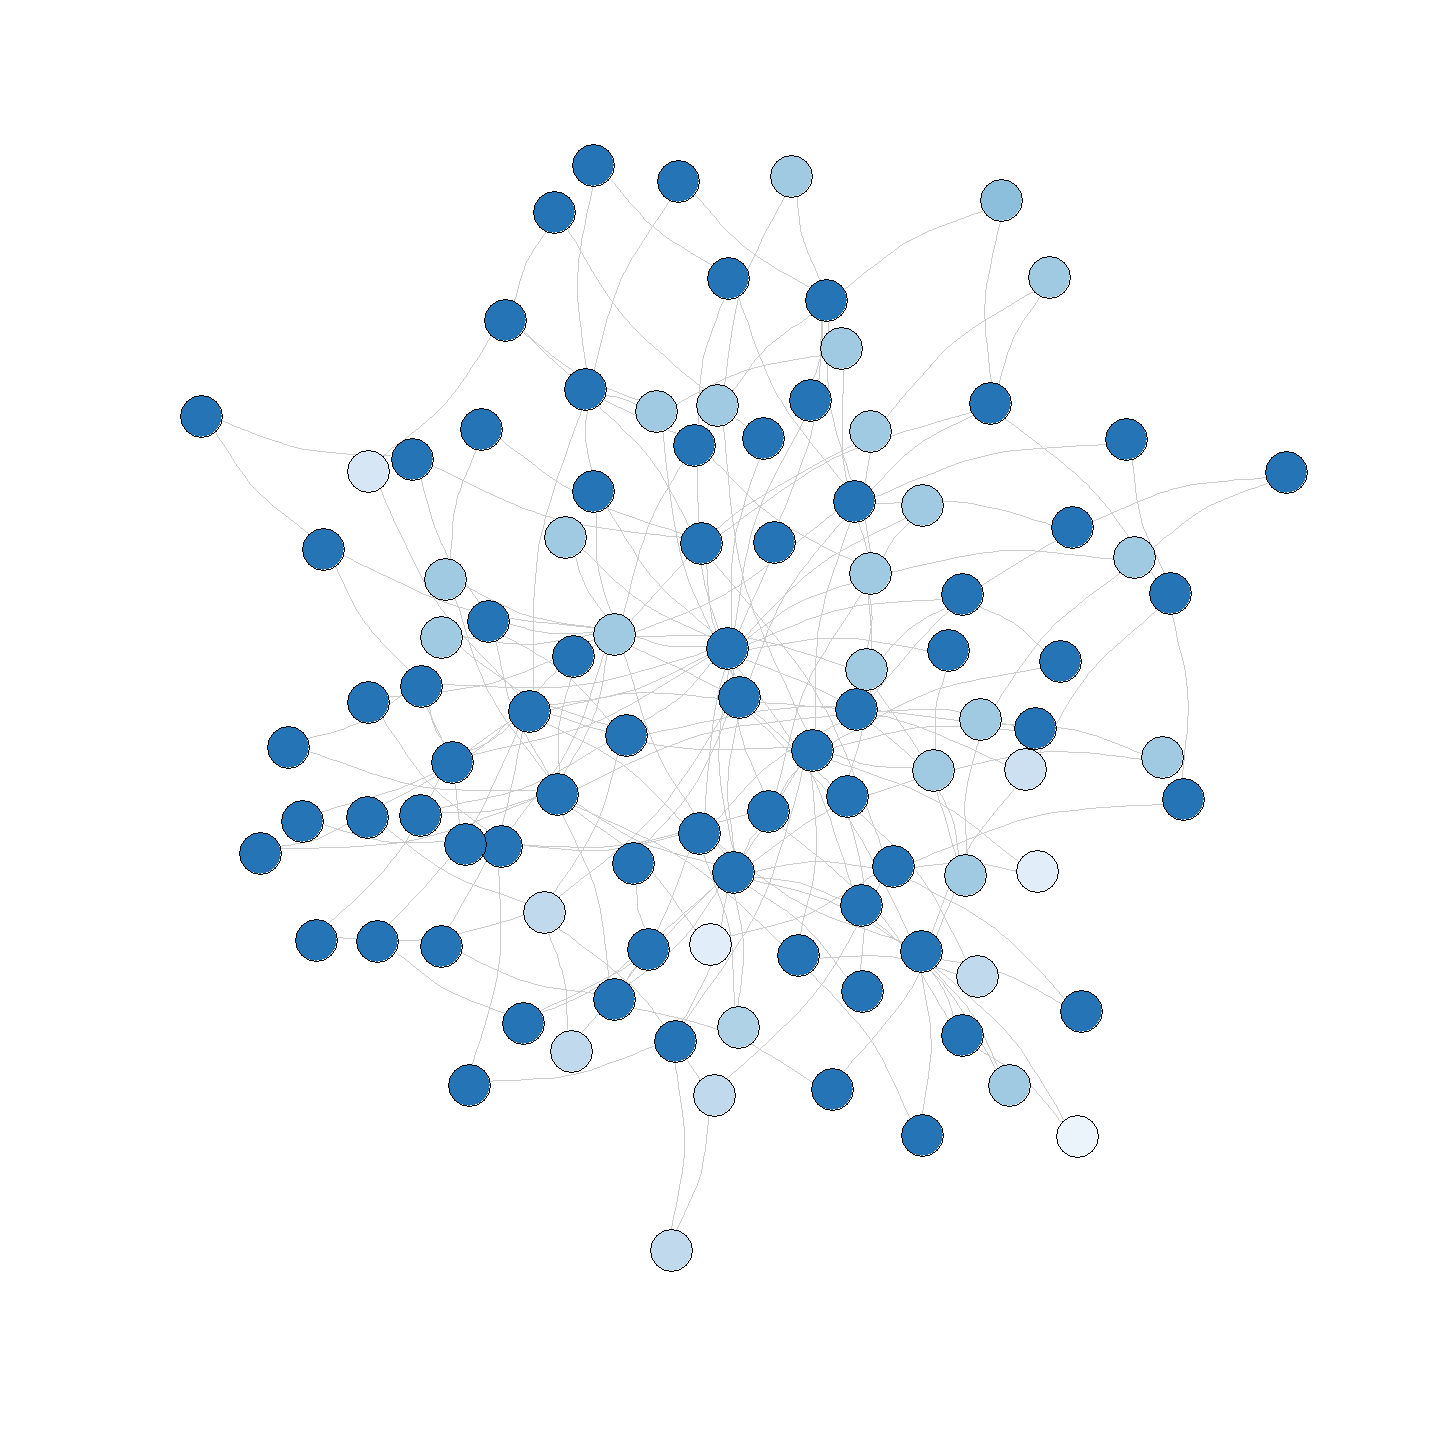

In [11]:
N = 100

g = barabasi.game(N, m=2, directed=F) 
lay = layout_with_fr(g)
g

npair = 1000
T = 50
d = 0.25
mu = 0.5

set.seed(58)

Nv = vcount(g)
V(g)$opinions = runif(Nv)

df_ops = data.frame(Node=1:Nv)
df_ops["TimeStep"] = 0
df_ops["Opinions"] = V(g)$opinions

pair = sample_pair(g)
df_ops_t = df_ops[df_ops$TimeStep == 0,]
updated_opinions = df_ops_t$Opinions

for (t in 1:T){
    for (i in 1:npair){
        pair = sample_pair(g)
        updated_opinions = readjustment(updated_opinions, pair, d, mu)
    }
    df_ops_t$TimeStep = t
    df_ops_t$Opinions = updated_opinions
    df_ops = rbind(df_ops, df_ops_t)
}

ops0 = df_ops[df_ops$TimeStep == 0,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[ops0*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

opsT = df_ops[df_ops$TimeStep == T,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[opsT*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

IGRAPH 6d0a694 U--- 100 294 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from 6d0a694:
 [1]  1-- 2  1-- 3  2-- 3  1-- 4  2-- 4  3-- 4  4-- 5  2-- 5  3-- 5  3-- 6
[11]  2-- 6  4-- 6  4-- 7  2-- 7  1-- 7  4-- 8  7-- 8  3-- 8  2-- 9  4-- 9
[21]  3-- 9  9--10  4--10  3--10  7--11  2--11  3--11  2--12  3--12  5--12
[31]  4--13  5--13  7--13  1--14  2--14 10--14  5--15  2--15 13--15  6--16
[41]  2--16 10--16  4--17 13--17 14--17 13--18 10--18  5--18 10--19  4--19
[51]  7--19  1--20  8--20  9--20 10--21  8--21  4--21  2--22  4--22 21--22
[61]  2--23  4--23 13--23  2--24  5--24 12--24  7--25  2--25 12--25  1--26
+ ... omitted several edges

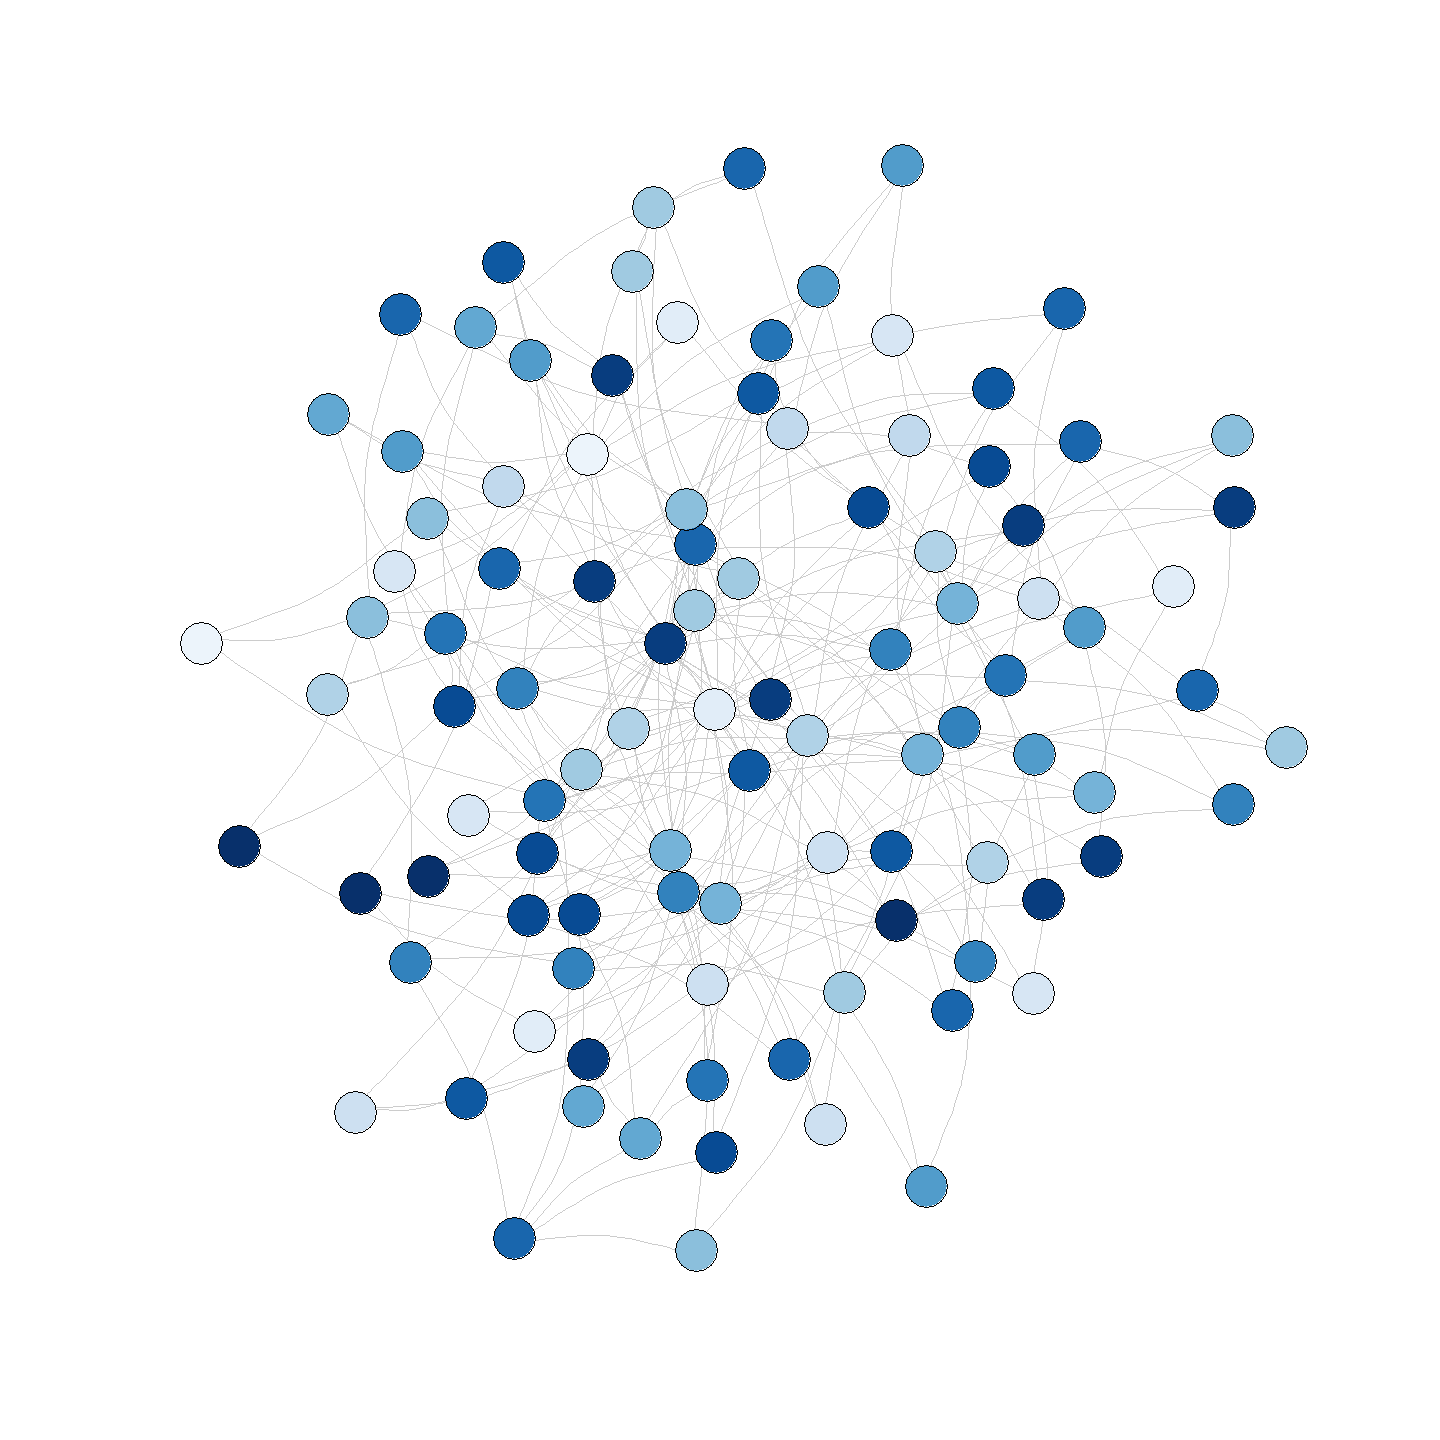

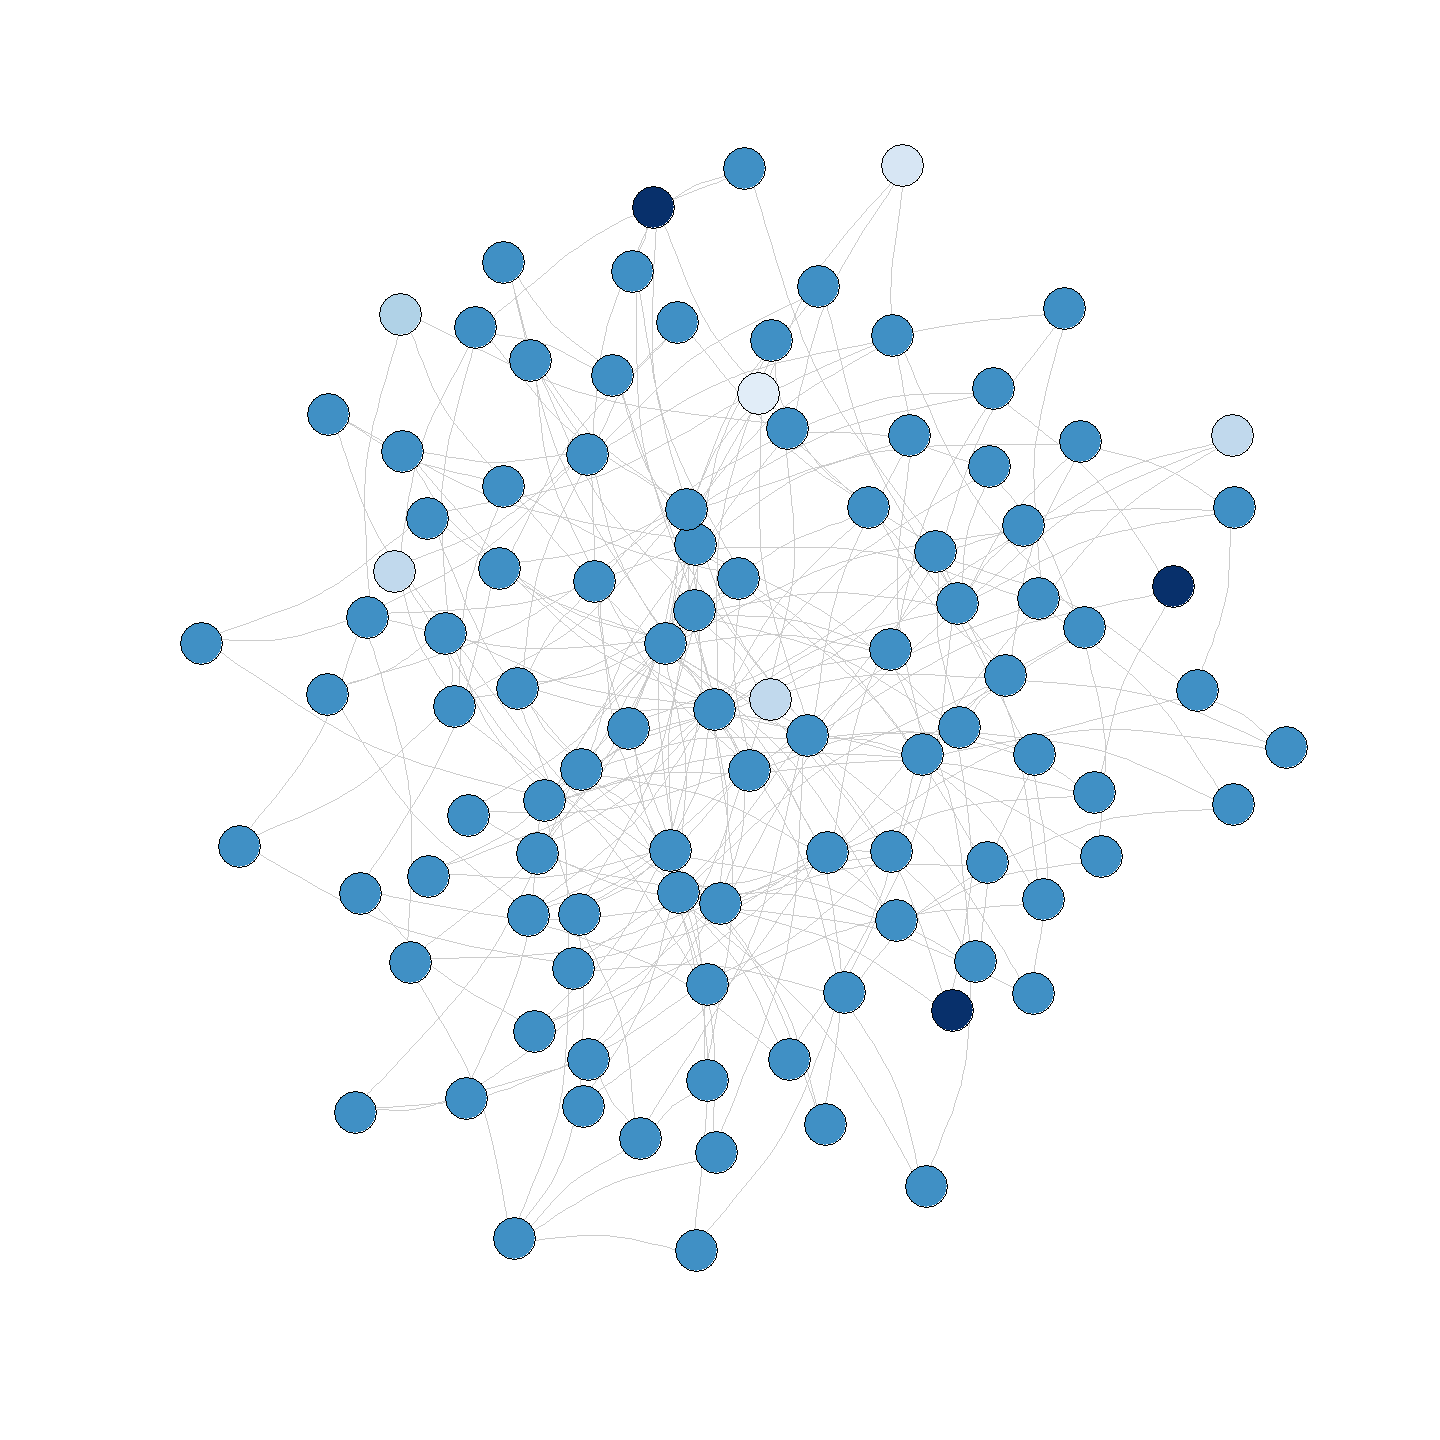

In [12]:
N = 100

g = barabasi.game(N, m=3, directed=F) 
lay = layout_with_fr(g)
g

npair = 1000
T = 50
d = 0.25
mu = 0.5

set.seed(58)

Nv = vcount(g)
V(g)$opinions = runif(Nv)
df_ops = data.frame(Node=1:Nv)
df_ops["TimeStep"] = 0
df_ops["Opinions"] = V(g)$opinions

pair = sample_pair(g)
df_ops_t = df_ops[df_ops$TimeStep == 0,]
updated_opinions = df_ops_t$Opinions

for (t in 1:T){
    for (i in 1:npair){
        pair = sample_pair(g)
        updated_opinions = readjustment(updated_opinions, pair, d, mu)
    }
    df_ops_t$TimeStep = t
    df_ops_t$Opinions = updated_opinions
    df_ops = rbind(df_ops, df_ops_t)
}

# df_ops


ops0 = df_ops[df_ops$TimeStep == 0,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[ops0*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

opsT = df_ops[df_ops$TimeStep == T,]$Opinions
plot(g, layout=lay, vertex.color=blues_palette[opsT*Ncolors], edge.curved=0.2, vertex.size=8, edge.color="gray80", vertex.label=NA)

## 3. Vector opinions: analysis and results

### Model

In this case, we consider vector of opinions, in the case of complete mixing.

We start with $N$ agents, where each agent has a binary opinion (0 or 1) regarding $m$ subjects. 

The opinion adjustment process occurs when two agents agree on at least $m - d$ subjects: 

- equal opinions are conserved;

- if opinions are different, one opinion is randomly changed with a probability $\mu$. 

<!-- Obviously this model has connections with population genetics in the presence of sexual recombination when reproduction only occurs if genome distance is smaller than a given threshold; such a dynamics results in the emergence of species. -->

In [29]:
N = 100 # agents -> EVEN NUMBER
m = 7 # subjects
d = 4 # people have to agree to at least m-d subjects in order for them to try convincing each other
mu = 1

T = 10000

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
final_opinions = final_opinions_table(matrix_final_opinions)
final_opinions

Vector opinions converge at t = 406 


final_opinions
0001001 
    100 

### Parameter variation

Try different values for $\mu$: the only change are the convergence times. All future analyses can be done by setting $\mu = 1$.

In [30]:
N = 100
m = 7
d_list = 2:7 # d = 4
mu_list = seq(0.2, 1, by=0.2)

T = 10000

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
for (mu in mu_list){
    cat("Mu = ", mu, ":\n", sep="")
    matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
}

Mu = 0.2:
Vector opinions converge at t = 3250 
Mu = 0.4:
Vector opinions converge at t = 972 
Mu = 0.6:
Vector opinions converge at t = 462 
Mu = 0.8:
Vector opinions converge at t = 400 
Mu = 1:
Vector opinions converge at t = 719 


Try different values for $N$: the only change are the convergence times.

In [31]:
N_list = c(10, 50, 100, 500, 1000)
m = 7
d = 4
mu = 1

T = 10000

set.seed(42)

for (N in N_list){
    cat("N = ", N, ":\n", sep="")
    matrix_opinions = generate_opinion_matrix(N, m)
    matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
}

N = 10:
Vector opinions converge at t = 49 
N = 50:
Vector opinions converge at t = 203 
N = 100:
Vector opinions converge at t = 527 
N = 500:
Vector opinions converge at t = 2503 
N = 1000:
Vector opinions converge at t = 3937 


Try different values for $d$: the lower $d$ is, the more difficult it is for two agents to be willing to change opinions on some subject. Therefore, only a limited number of agents will change opinions, while the others keep theirs.

Initially, we try with $m = 7$:

- $d = 2$: large number of small clusters is observed; 
- $d = 3, 4, 5, 6, 7$: convergence occurs.

In [32]:
N = 100
m = 7
d = 2
mu = 1

T = 50000

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
final_opinions = final_opinions_table(matrix_final_opinions)
final_opinions

final_opinions
0000010 1111110 
     64      36 

In [33]:
N = 100
m = 7
d_list = 2:7
mu = 1

T = 10000

for (d in d_list){
    set.seed(42)
    cat("d = ", d, ":\n", sep="")
    matrix_opinions = generate_opinion_matrix(N, m)
    matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
}

d = 2:
d = 3:
Vector opinions converge at t = 786 
d = 4:
Vector opinions converge at t = 406 
d = 5:
Vector opinions converge at t = 529 
d = 6:
Vector opinions converge at t = 372 
d = 7:
Vector opinions converge at t = 399 


Try with $m = 13$:

- $d = 2$: almost no clusterization occurs for small times; 
- $d = 3$: large number of small clusters is observed;
- $d = 4$: small number of large clusters, with a few isolated opinions. The distance from the main peak is around 6;
- $d = 5, 6,\ldots, 13$: convergence occurs.

In [34]:
N = 100
m = 13
d_list = 2:13
mu = 1

T = 10000

for (d in d_list){
    set.seed(42)
    cat("d = ", d, ":\n", sep="")
    matrix_opinions = generate_opinion_matrix(N, m)
    matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
    final_opinions = final_opinions_table(matrix_final_opinions)
    cat("Number of final opinions:", length(final_opinions), "\n\n")
}

d = 2:
Number of final opinions: 50 

d = 3:
Number of final opinions: 8 

d = 4:
Vector opinions converge at t = 1182 
Number of final opinions: 1 

d = 5:
Vector opinions converge at t = 1180 
Number of final opinions: 1 

d = 6:
Vector opinions converge at t = 852 
Number of final opinions: 1 

d = 7:
Vector opinions converge at t = 616 
Number of final opinions: 1 

d = 8:
Vector opinions converge at t = 1012 
Number of final opinions: 1 

d = 9:
Vector opinions converge at t = 884 
Number of final opinions: 1 

d = 10:
Vector opinions converge at t = 591 
Number of final opinions: 1 

d = 11:
Vector opinions converge at t = 916 
Number of final opinions: 1 

d = 12:
Vector opinions converge at t = 906 
Number of final opinions: 1 

d = 13:
Vector opinions converge at t = 906 
Number of final opinions: 1 



### Distances between clusters

#### Distances

Now, we can try to see how "far" clusters of final opinions are. 

To calculate a distance, we simply give the number of different opinions between two final peaks.

In [35]:
N = 100
m = 13
d = 4
mu = 1

T = 10000

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
final_opinions = final_opinions_table(matrix_final_opinions)
final_opinions

Vector opinions converge at t = 1182 


final_opinions
1110110000101 
          100 

In [36]:
# final_opinion_distances(final_opinions)
# distances_from_main_peak(final_opinions)

#### Histogram of distances

In [37]:
N = 100
m = 13
d = 4
mu = 1

T = 10000

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
final_opinions = final_opinions_table(matrix_final_opinions)
final_opinions
# cat("\nDistances between peaks:")
# final_opinion_distances(final_opinions)
# cat("\nDistances to main peak:")
# distances_from_main_peak(final_opinions)

Vector opinions converge at t = 1182 


final_opinions
1110110000101 
          100 

In [38]:
N = 100
m = 13
d = 4
mu = 1

T_list = c(100, 1000)

reps = 10

set.seed(42)

matrix_opinions = generate_opinion_matrix(N, m)
for (T in T_list){
    matrix_distances = matrix(NA, nrow=reps, ncol=(m+1))
    for (i in seq_len(reps)){
        matrix_final_opinions = generate_final_opinions(matrix_opinions, N, m, d, mu, T)
        matrix_distances[i,] = as.numeric(all_distances(matrix_final_opinions))
    }
    variable = paste0("matrix_distances", T)
    assign(variable, matrix_distances)
}

In [32]:
# matrix_distances100
# matrix_distances

In [44]:
df = data.frame(distances=0:m, T100=(apply(matrix_distances100, 2, mean)), T1000=(apply(matrix_distances, 2, mean)))
df = melt(df, id.vars="distances")
colnames(df) = c('distances', 'samples', 'counts')
df

distances,samples,counts
<int>,<fct>,<dbl>
0,T100,6.6
1,T100,29.7
2,T100,97.2
3,T100,242.5
4,T100,438.0
5,T100,727.0
6,T100,978.6
7,T100,991.2
8,T100,783.7


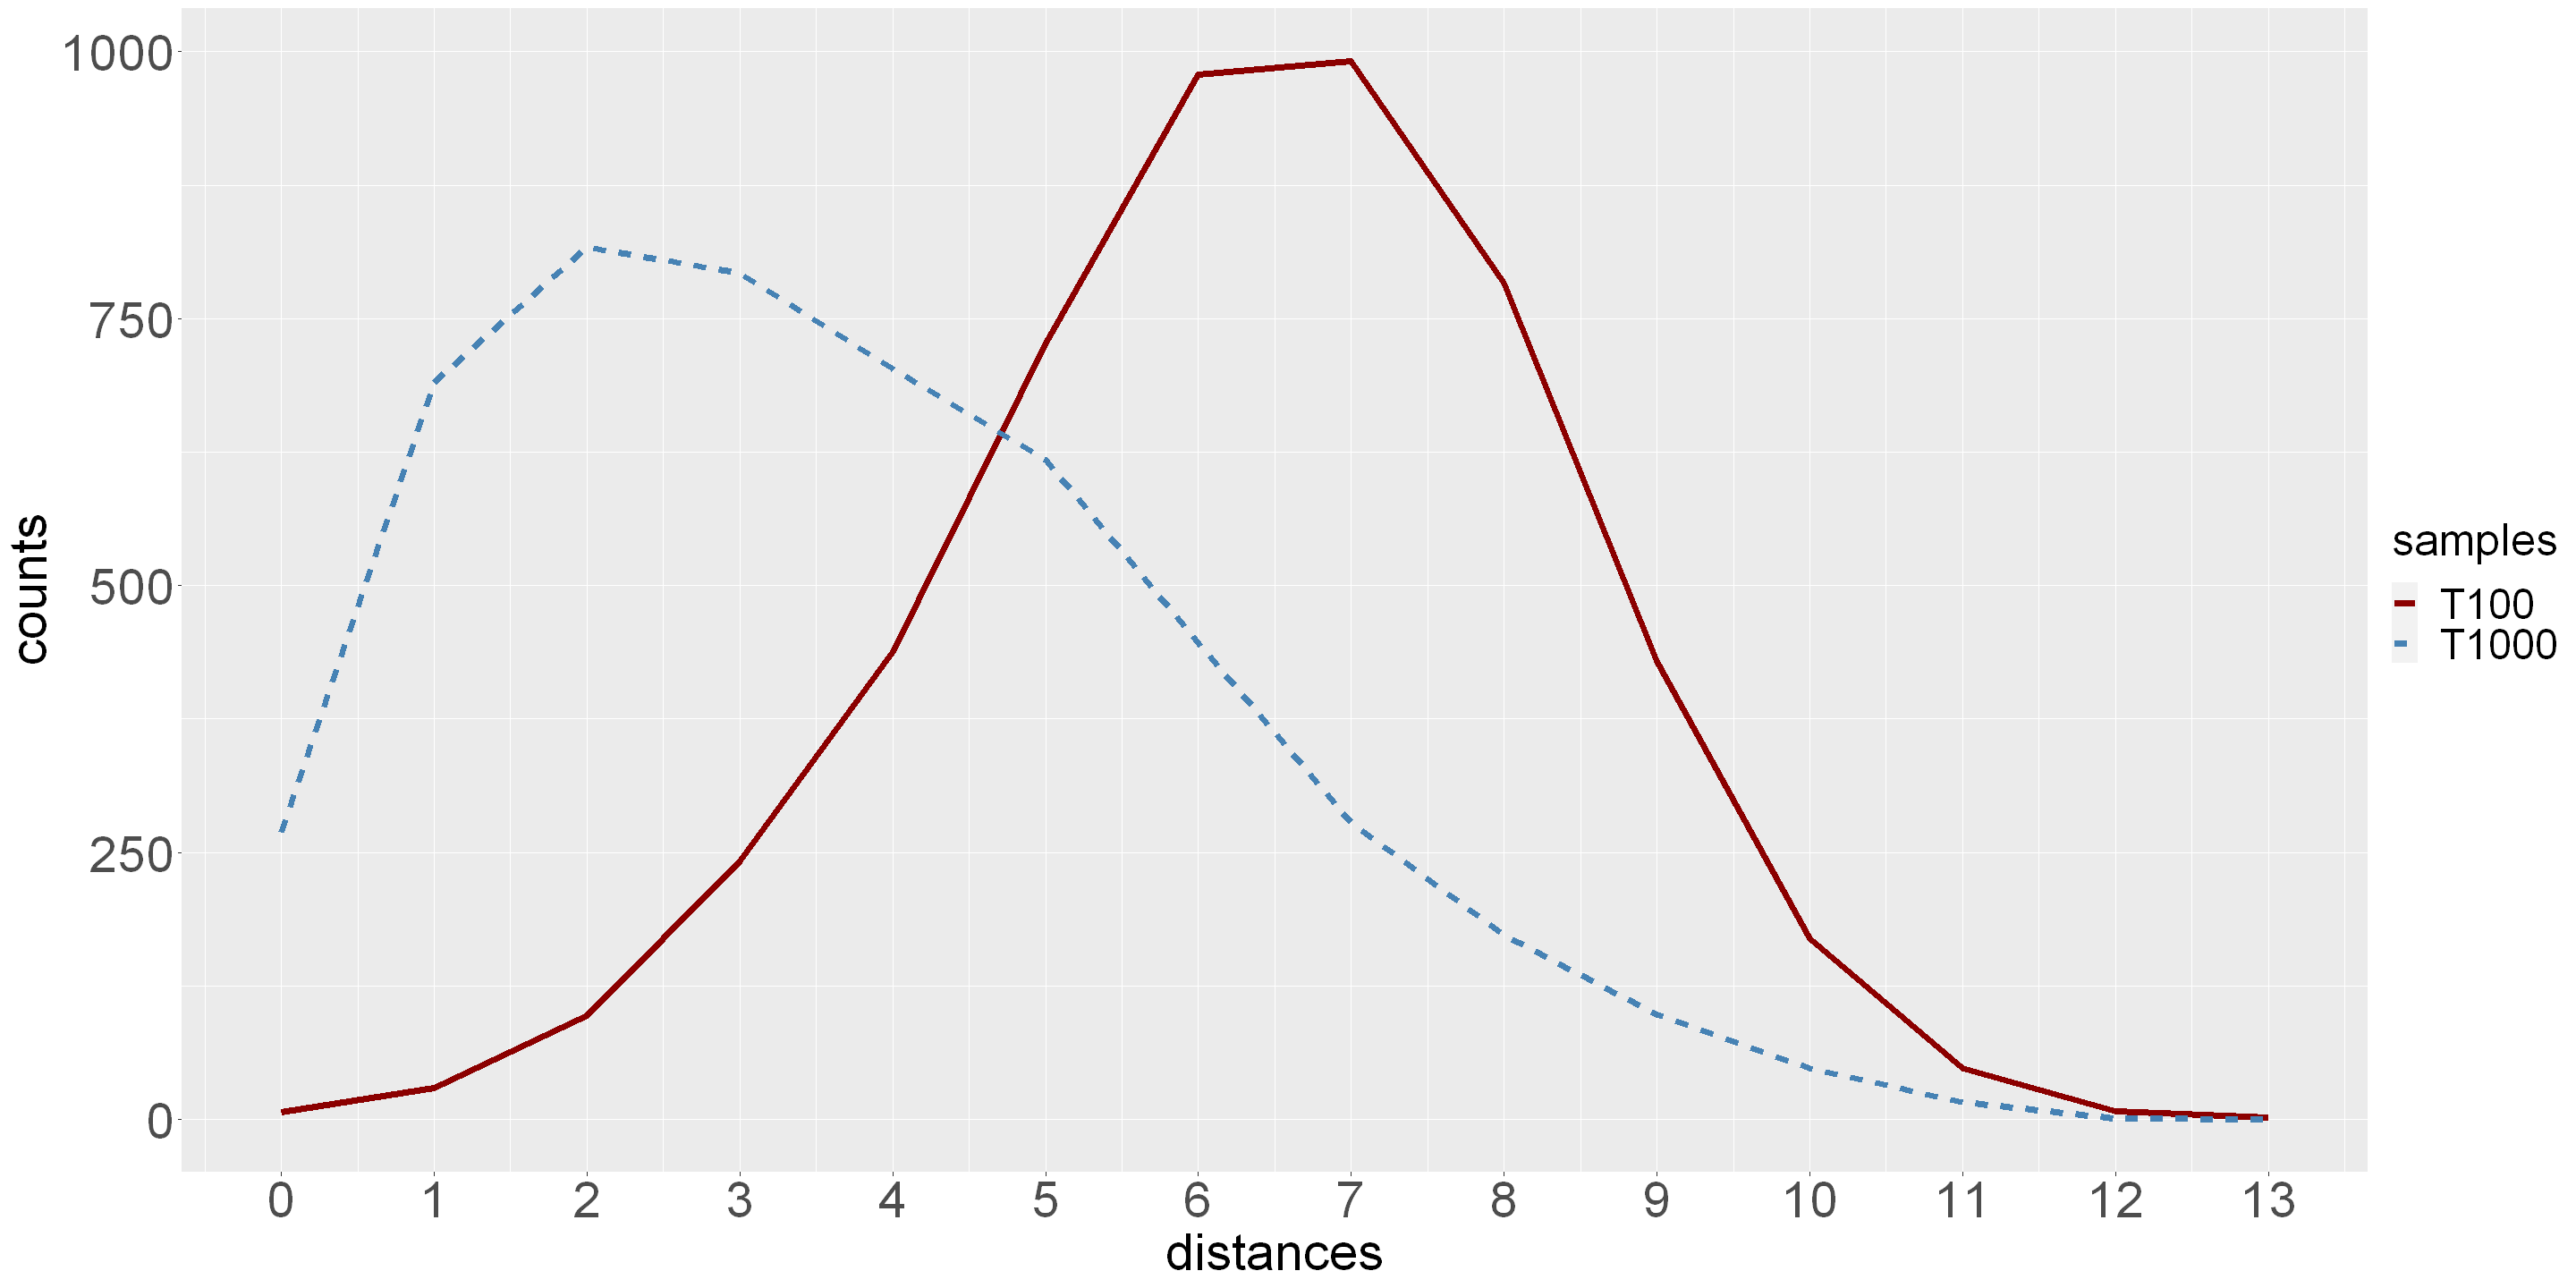

In [48]:
options(repr.plot.width=24, repr.plot.height=12)
ggplot(df, aes(x=distances, y=counts)) + 
    geom_line(aes(color=samples, linetype=samples), linewidth=2) +
    scale_color_manual(values=c("darkred", "steelblue")) +
    scale_x_continuous(expand=c(0.05, 0), breaks=seq(0, m, by=1)) + 
    theme(axis.text.x=element_text(size=34), axis.text.y=element_text(size=34), axis.title=element_text(size=34), 
        legend.title=element_text(size=30), legend.text=element_text(size=28))